In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import folium
import os
import fastparquet
import geopandas as gpd
import calendar
from shapely.geometry import Point
from bokeh.plotting import figure, show
import plotly.express as px
from plotly.offline import iplot
%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
path="F:/1_Bachelorarbeit/1_Daten/1_Yellow_Cab_Trips_2009-June_2016/Dataset_for_Bivariate/Exploration_Data_for_Bivariate.parquet"
# Testing the Parquet Files
df=pd.read_parquet(path=path,engine="fastparquet")
df

Pickup_DateTime    Dropoff_DateTime  Passenger_Count  \
index                                                              
0       2009-05-04 00:45:40 2009-05-04 00:49:59                1   
1       2009-12-18 19:11:35 2009-12-18 20:05:53                1   
2       2009-09-10 23:43:00 2009-09-10 23:55:00                5   
3       2009-06-15 20:59:00 2009-06-15 21:07:00                1   
4       2009-09-16 15:30:20 2009-09-16 15:58:29                1   
5       2009-10-12 12:16:00 2009-10-12 12:27:00                2   
6       2009-04-19 12:33:56 2009-04-19 12:48:56                3   
7       2009-10-19 08:09:02 2009-10-19 08:26:46                1   
8       2009-06-20 17:35:00 2009-06-20 17:44:00                1   
9       2009-10-07 08:13:51 2009-10-07 08:29:59                2   
10      2009-10-09 18:29:00 2009-10-09 18:45:00                1   
11      2009-10-22 19:23:00 2009-10-22 19:27:00                1   
12      2009-03-08 02:13:59 2009-03-08 02:22:45                2   
13      2009-09-02 13:19:00 2009-09-02 13:25:00                3   
14      2009-03-01 01:15:00 2009-03-01 01:26:00                3   
15      2009-09-24 15:10:25 2009-09-24 15:30:47                1   
16      2009-01-07 03:22:41 2009-01-07 03:29:19                2   
17      2009-08-04 12:51:00 2009-08-04 13:03:00                5   
18      2009-03-18 09:53:33 2009-03-18 09:59:26                1   
19      2009-12-21 12:38:22 2009-12-21 12:50:18                1   
20      2009-09-02 11:19:00 2009-09-02 11:28:00                1   
21      2009-04-23 19:07:00 2009-04-23 19:53:00                5   
22      2009-10-25 13:59:51 2009-10-25 14:10:40                1   
23      2009-08-17 07:47:00 2009-08-17 07:53:00                5   
24      2009-02-03 06:33:36 2009-02-03 06:41:32                1   
25      2009-02-16 00:01:00 2009-02-16 00:04:00                1   
26      2009-11-22 15:09:00 2009-11-22 15:16:00                1   
27      2009-04-10 12:22:00 2009-04-10 12:29:00                5   
28      2009-04-16 07:48:41 2009-04-16 07:52:45                2   
29      2009-02-15 13:03:00 2009-02-15 13:10:00                1   
...                     ...                 ...              ...   
1999969 2016-04-19 08:40:22 2016-04-19 08:46:51                1   
1999970 2016-04-26 14:21:08 2016-04-27 14:06:42                6   
1999971 2016-04-14 23:09:16 2016-04-14 23:17:42                1   
1999972 2016-02-27 22:53:30 2016-02-27 23:18:12                1   
1999973 2016-05-12 09:23:16 2016-05-12 09:29:56                1   
1999974 2016-01-06 06:55:55 2016-01-06 07:10:13                1   
1999975 2016-05-13 21:05:11 2016-05-13 21:27:58                1   
1999977 2016-01-14 19:37:12 2016-01-14 19:46:21                5   
1999978 2016-05-05 19:11:20 2016-05-05 19:19:55                1   
1999979 2016-02-10 13:32:30 2016-02-10 13:49:05                6   
1999980 2016-05-30 01:10:43 2016-05-30 01:31:18                5   
1999981 2016-04-19 15:13:43 2016-04-19 15:20:15                1   
1999982 2016-01-13 23:23:57 2016-01-13 23:37:36                1   
1999983 2016-04-17 02:35:35 2016-04-17 02:45:34                5   
1999984 2016-03-24 11:29:21 2016-03-24 11:46:42                1   
1999985 2016-03-17 19:34:24 2016-03-17 19:49:57                1   
1999986 2016-05-24 06:17:52 2016-05-24 06:20:07                1   
1999987 2016-05-19 00:34:37 2016-05-19 00:49:34                2   
1999988 2016-05-28 19:01:41 2016-05-28 19:23:29                1   
1999989 2016-05-07 01:34:31 2016-05-07 01:40:30                2   
1999990 2016-04-09 23:53:40 2016-04-10 00:22:12                1   
1999991 2016-03-03 02:33:16 2016-03-03 02:47:29                1   
1999992 2016-01-21 09:48:45 2016-01-21 10:00:05                5   
1999993 2016-03-14 20:11:10 2016-03-14 20:20:19                2   
1999994 2016-03-07 18:45:25 2016-03-07 18:54:56                1   
1999995 2016-06-08 17:45:20 2016-06-08 17:51:48                1   


In [3]:
gdf=gpd.GeoDataFrame(df)

In [4]:
gdf.head()

Pickup_DateTime    Dropoff_DateTime  Passenger_Count  Trip_Distance  \
index                                                                           
0     2009-05-04 00:45:40 2009-05-04 00:49:59                1       0.700195   
1     2009-12-18 19:11:35 2009-12-18 20:05:53                1      19.296875   
2     2009-09-10 23:43:00 2009-09-10 23:55:00                5       1.570312   
3     2009-06-15 20:59:00 2009-06-15 21:07:00                1       1.500000   
4     2009-09-16 15:30:20 2009-09-16 15:58:29                1       2.400391   

       Pickup_Lon  Pickup_Lat  RateCodeID   Fare_Amt  \
index                                                  
0      -73.987068   40.756031           0   4.500000   
1      -74.014847   40.711170           0  45.000000   
2      -73.991966   40.725288           0   8.101562   
3      -73.955482   40.779682           0   6.898438   
4      -73.980927   40.770405           0   7.300781   

                                    geometry_pickup            zone_pickup  \
index                                                                        
0      POINT (-73.98706817626953 40.75603103637695)       Garment District   
1       POINT (-74.01484680175781 40.7111701965332)      Battery Park City   
2      POINT (-73.99196624755859 40.72528839111328)           East Village   
3      POINT (-73.95548248291016 40.77968215942383)  Upper East Side North   
4      POINT (-73.98092651367188 40.77040481567383)    Lincoln Square East   

      borough_pickup  Dropoff_Lon  Dropoff_Lat  \
index                                            
0          Manhattan   -73.977425    40.749626   
1          Manhattan   -73.776382    40.646065   
2          Manhattan   -74.009697    40.710354   
3          Manhattan   -73.979057    40.789425   
4          Manhattan   -74.006332    40.751778   

                                   geometry_dropoff  \
index                                                 
0      POINT (-73.97742462158203 40.74962615966797)   
1      POINT (-73.77638244628906 40.64606475830078)   
2      POINT (-74.00969696044922 40.71035385131836)   
3      POINT (-73.97905731201172 40.78942489624023)   
4      POINT (-74.00633239746094 40.75177764892578)   

                    zone_dropoff borough_dropoff  
index                                             
0                    Murray Hill       Manhattan  
1                    JFK Airport          Queens  
2             World Trade Center       Manhattan  
3          Upper West Side North       Manhattan  
4      West Chelsea/Hudson Yards       Manhattan

In [5]:
gdf.dtypes

Pickup_DateTime     datetime64[ns]
Dropoff_DateTime    datetime64[ns]
Passenger_Count              uint8
Trip_Distance              float32
Pickup_Lon                 float32
Pickup_Lat                 float32
RateCodeID                   uint8
Fare_Amt                   float32
geometry_pickup             object
zone_pickup                 object
borough_pickup              object
Dropoff_Lon                float32
Dropoff_Lat                float32
geometry_dropoff            object
zone_dropoff                object
borough_dropoff             object
dtype: object

In [6]:
gdf.shape

(1934536, 16)

## Theory and Hypothesis

### 1. The Fare should increase if the travelled Distance is longer

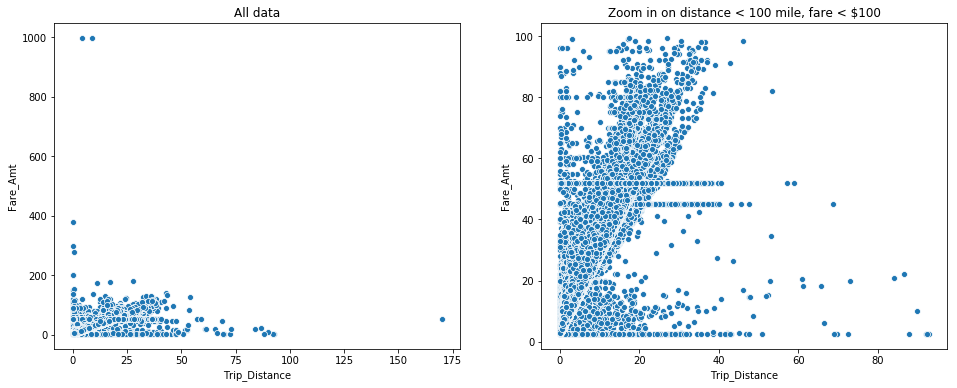

In [7]:
# scatter plot distance - fare
fig, axs = plt.subplots(1, 2, figsize=(16,6))
sns.scatterplot(data=gdf,x="Trip_Distance", y="Fare_Amt",ax=axs[0])
axs[0].set_xlabel('Trip_Distance')
axs[0].set_ylabel('Fare_Amt')
axs[0].set_title('All data')

# zoom in on part of data
idx = (gdf.Trip_Distance < 100) & (gdf.Fare_Amt < 100)
sns.scatterplot(data=gdf,x=gdf[idx].Trip_Distance, y=gdf[idx].Fare_Amt,ax=axs[1])
axs[1].set_xlabel('Trip_Distance')
axs[1].set_ylabel('Fare_Amt')
axs[1].set_title('Zoom in on distance < 100 mile, fare < $100');

#### Observation:
#### 1. There are trips with small distances but with high fares. (Outliers) -> 
#### 2. There are Trips with high distances but with low Fare Amount. (Outliers) or maybe Discount? -> 
#### 3. There are 2 horizontal Lines -> indicator for Manhattan_JFK Airport Trips maybe? , because Manhattan_JFK Airport Trips have Fixed Fees
#### 4. But overall there seems to be a (linear) relation between distance and fare

### How many Trips are Airport Trips?

In [8]:
Newark_Airport_Len=len(gdf[(gdf["zone_pickup"]=="Newark Airport") | (gdf["zone_dropoff"]=="Newark Airport")])
print("Newark_Airport_Trips:"+str(Newark_Airport_Len))
JFK_Airport_Len=len(gdf[(gdf["zone_pickup"]=="JFK Airport") | (gdf["zone_dropoff"]=="JFK Airport")])
print("JFK_Airport_Trips:"+str(JFK_Airport_Len))
LaGuardia_Airport_Len=len(gdf[(gdf["zone_pickup"]=="LaGuardia Airport") | (gdf["zone_dropoff"]=="LaGuardia Airport")])
print("LaGuardia_Airport_Trips:"+str(LaGuardia_Airport_Len))
print("\n")
Airport_Trips=Newark_Airport_Len+JFK_Airport_Len+LaGuardia_Airport_Len
print("Total Airport Trips:"+ str(Airport_Trips))
print("\n")
print(str((Airport_Trips/len(gdf))*100)+" "+"% are Airport Trips")

Newark_Airport_Trips:2492
JFK_Airport_Trips:44356
LaGuardia_Airport_Trips:63707


Total Airport Trips:110555


5.714807064846558 % are Airport Trips


In [9]:
# Create Column Airport Trips with boolean values to show if trip is Airport Trip or not
gdf["Airport_Trip"]=False
gdf.loc[(gdf['zone_pickup'] == "JFK Airport") | (gdf['zone_dropoff'] == "JFK Airport") | (gdf['zone_pickup'] == "LaGuardia Airport") | (gdf['zone_dropoff'] == "LaGuardia Airport") | (gdf['zone_pickup'] == "Newark Airport") | (gdf['zone_dropoff'] == "Newark Airport"),['Airport_Trip']] = True

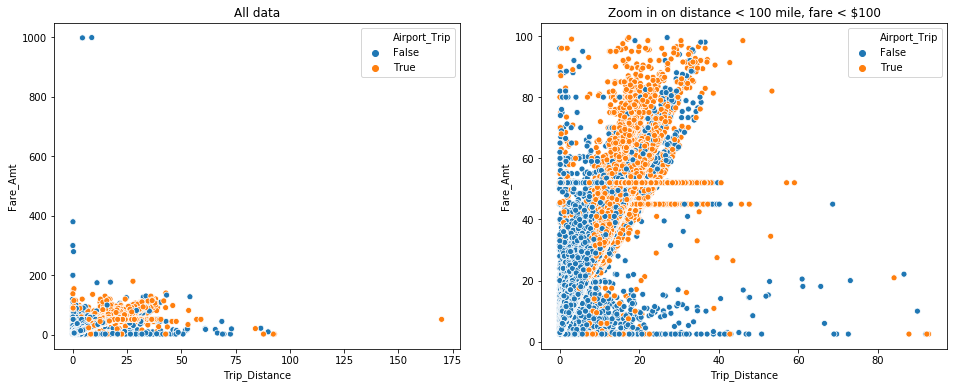

In [10]:
# scatter plot distance - fare
fig, axs = plt.subplots(1, 2, figsize=(16,6))
sns.scatterplot(data=gdf,x="Trip_Distance", y="Fare_Amt",ax=axs[0],hue="Airport_Trip")
axs[0].set_xlabel('Trip_Distance')
axs[0].set_ylabel('Fare_Amt')
axs[0].set_title('All data')

# zoom in on part of data
idx = (gdf.Trip_Distance < 100) & (gdf.Fare_Amt < 100)
sns.scatterplot(data=gdf,x=gdf[idx].Trip_Distance, y=gdf[idx].Fare_Amt,ax=axs[1],hue="Airport_Trip")
axs[1].set_xlabel('Trip_Distance')
axs[1].set_ylabel('Fare_Amt')
axs[1].set_title('Zoom in on distance < 100 mile, fare < $100');

In [11]:
# Trips between JFK and Manhatten
# Create Manhattan_JFK_Airport_Trip with boolean values to show if trip is Manhattan_JFK Airport Trip or not
gdf["Manhattan_JFK_Airport_Trip"]=False
gdf.loc[((gdf['zone_pickup'] == "JFK Airport") | (gdf['zone_dropoff'] == "JFK Airport")) & ((gdf['borough_pickup'] == "Manhattan") | (gdf['borough_dropoff'] == "Manhattan")) ,['Manhattan_JFK_Airport_Trip']] = True

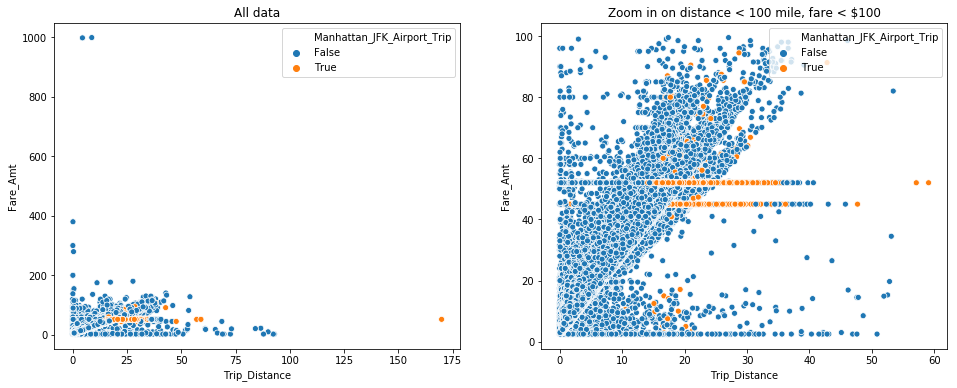

In [12]:
# scatter plot distance - fare
fig, axs = plt.subplots(1, 2, figsize=(16,6))
sns.scatterplot(data=gdf,x="Trip_Distance", y="Fare_Amt",ax=axs[0],hue="Manhattan_JFK_Airport_Trip")
axs[0].set_xlabel('Trip_Distance')
axs[0].set_ylabel('Fare_Amt')
axs[0].set_title('All data')

# zoom in on part of data
idx = (gdf.Trip_Distance < 60) & (gdf.Fare_Amt < 100)
sns.scatterplot(data=gdf,x=gdf[idx].Trip_Distance, y=gdf[idx].Fare_Amt,ax=axs[1],hue="Manhattan_JFK_Airport_Trip")
axs[1].set_xlabel('Trip_Distance')
axs[1].set_ylabel('Fare_Amt')
axs[1].set_title('Zoom in on distance < 100 mile, fare < $100');

#### Observation:
#### 1. There are Airport Trips between Manhattan and JFK, which are not the Flat Fares like 45 Dollar or 52 Dollar

#### Since July 1st 2012 the Flat Fare between JFK and Manhattan changed from 45 Dollars to 52 Dollars
#### For more Information go to: [Flat Fare](https://www.new-york-city-travel-tips.com/how-transfer-between-jfk-airport-manhattan/)

In [13]:
# Show Dataframe with Manhattan_JFK Trips
gdf[((gdf['zone_pickup'] == "JFK Airport") | (gdf['zone_dropoff'] == "JFK Airport")) & ((gdf['borough_pickup'] == "Manhattan") | (gdf['borough_dropoff'] == "Manhattan"))]

Pickup_DateTime    Dropoff_DateTime  Passenger_Count  \
index                                                              
1       2009-12-18 19:11:35 2009-12-18 20:05:53                1   
21      2009-04-23 19:07:00 2009-04-23 19:53:00                5   
148     2009-11-06 16:32:00 2009-11-06 17:19:00                2   
166     2009-05-24 10:11:31 2009-05-24 10:38:13                1   
478     2009-08-20 22:38:33 2009-08-20 23:15:05                1   
511     2009-03-25 06:46:00 2009-03-25 07:15:00                5   
567     2009-10-18 17:41:00 2009-10-18 18:16:00                1   
595     2009-04-17 19:43:51 2009-04-17 20:23:19                1   
707     2009-07-05 14:11:21 2009-07-05 14:54:01                2   
813     2009-05-05 20:32:10 2009-05-05 20:57:29                1   
838     2009-09-18 15:40:46 2009-09-18 16:42:29                1   
923     2009-08-12 15:30:00 2009-08-12 16:24:00                2   
1053    2009-07-19 16:46:00 2009-07-19 17:54:00                2   
1057    2009-10-26 21:33:29 2009-10-26 22:01:11                2   
1108    2009-10-25 16:00:00 2009-10-25 16:54:00                2   
1157    2009-03-15 06:33:27 2009-03-15 07:00:33                3   
1180    2009-01-26 15:26:00 2009-01-26 16:07:00                1   
1181    2009-02-16 16:39:00 2009-02-16 17:22:00                1   
1201    2009-10-07 15:27:35 2009-10-07 16:26:41                1   
1222    2009-11-01 15:17:16 2009-11-01 15:58:17                2   
1244    2009-02-02 18:27:00 2009-02-02 19:03:00                1   
1299    2009-01-15 15:17:17 2009-01-15 15:45:53                1   
1406    2009-10-01 06:17:07 2009-10-01 06:41:42                1   
1704    2009-12-17 04:24:00 2009-12-17 04:41:00                2   
1760    2009-01-09 15:17:00 2009-01-09 16:12:00                3   
1773    2009-08-23 20:35:00 2009-08-23 22:25:00                5   
1821    2009-05-10 15:30:00 2009-05-10 16:30:00                5   
1912    2009-09-09 15:47:00 2009-09-09 16:36:00                2   
2046    2009-10-09 16:30:56 2009-10-09 17:14:30                1   
2160    2009-07-02 13:24:00 2009-07-02 14:29:00                5   
...                     ...                 ...              ...   
1998660 2016-06-10 22:36:20 2016-06-10 23:16:59                1   
1998664 2016-04-01 18:40:14 2016-04-01 19:28:30                1   
1998817 2016-03-25 20:43:14 2016-03-25 21:12:18                1   
1998845 2016-04-07 11:16:29 2016-04-07 12:35:24                5   
1998981 2016-04-30 17:58:33 2016-04-30 18:50:48                2   
1999057 2016-04-25 13:12:06 2016-04-25 13:39:57                2   
1999072 2016-06-12 17:19:29 2016-06-12 18:15:52                1   
1999101 2016-01-28 09:43:18 2016-01-28 10:21:42                6   
1999139 2016-03-03 13:40:25 2016-03-03 14:22:38                3   
1999210 2016-05-26 07:40:07 2016-05-26 08:25:24                2   
1999240 2016-04-01 17:55:33 2016-04-01 18:50:31                2   
1999305 2016-01-21 03:06:53 2016-01-21 03:28:53                2   
1999319 2016-05-28 14:58:19 2016-05-28 15:44:34                1   
1999387 2016-05-01 08:01:08 2016-05-01 08:35:12                2   
1999421 2016-02-25 21:04:38 2016-02-25 21:35:50                2   
1999443 2016-06-14 12:26:04 2016-06-14 13:30:23                6   
1999461 2016-02-07 05:10:24 2016-02-07 05:35:38                3   
1999478 2016-02-28 17:18:09 2016-02-28 18:34:43                1   
1999503 2016-02-10 08:40:17 2016-02-10 09:23:17                1   
1999532 2016-02-02 07:46:12 2016-02-02 08:56:38                1   
1999540 2016-03-24 18:31:33 2016-03-24 19:33:49                2   
1999545 2016-01-01 04:29:23 2016-01-01 04:50:53                1   
1999622 2016-05-04 22:37:34 2016-05-04 23:07:18                1   
1999638 2016-05-16 17:16:43 2016-05-16 18:04:57                2   
1999698 2016-04-08 13:54:19 2016-04-08 14:47:05                1   
1999759 2016-04-02 22:09:16 2016-04-02 22:41:48                1   


#### Observation:
#### 1. Flat Fare with RateCodeID = 0 -> should be RateCodeID=2 
#### 2. Negotiated Fares with RateCodeID 5 -> higher Fares than Flat Fare -> to trick unknown Customers for more Fare

In [14]:
# Show me Dataframe with Manhattan_JFK Trips which does not contain Flat Fares(45 Dollars and 52 Dollars)
gdf[((gdf['zone_pickup'] == "JFK Airport") | (gdf['zone_dropoff'] == "JFK Airport")) & ((gdf['borough_pickup'] == "Manhattan") | (gdf['borough_dropoff'] == "Manhattan")) & ((gdf['Fare_Amt'] != 45.0) & (gdf['Fare_Amt'] != 52.0))]

Pickup_DateTime    Dropoff_DateTime  Passenger_Count  \
index                                                              
3704    2009-09-01 11:02:00 2009-09-01 12:27:00                2   
5774    2009-07-29 07:10:33 2009-07-29 07:41:20                2   
6759    2009-08-22 20:45:00 2009-08-22 21:25:00                5   
8259    2009-01-09 22:32:00 2009-01-09 23:00:00                3   
12217   2009-01-14 04:54:51 2009-01-14 05:25:38                1   
12572   2009-01-27 18:04:00 2009-01-27 18:20:00                1   
14490   2009-06-04 17:52:50 2009-06-04 18:40:11                1   
19572   2009-08-19 12:00:21 2009-08-19 12:38:37                1   
22187   2009-05-16 15:26:00 2009-05-16 16:14:00                1   
23737   2009-11-05 14:45:59 2009-11-05 16:26:51                1   
24449   2009-11-29 15:35:31 2009-11-29 16:21:47                1   
26012   2009-01-09 16:35:42 2009-01-09 17:18:57                2   
41160   2009-05-08 19:37:49 2009-05-08 21:01:36                1   
41366   2009-05-15 15:48:09 2009-05-15 16:49:15                1   
45753   2009-08-27 13:14:03 2009-08-27 13:56:33                1   
46939   2009-08-12 23:28:56 2009-08-13 00:07:20                1   
55024   2009-05-03 16:35:00 2009-05-03 17:32:00                1   
55703   2009-09-20 17:57:36 2009-09-20 18:50:33                1   
56275   2009-05-20 23:15:00 2009-05-20 23:25:00                5   
64443   2009-06-14 12:17:00 2009-06-14 13:16:00                1   
65943   2009-06-19 20:17:02 2009-06-19 21:19:01                1   
70822   2009-04-21 18:00:25 2009-04-21 18:36:02                1   
71780   2009-09-16 13:34:42 2009-09-16 14:36:58                1   
72747   2009-06-09 05:33:39 2009-06-09 06:05:35                1   
73848   2009-09-02 17:37:00 2009-09-02 18:15:00                5   
76608   2009-02-26 18:43:00 2009-02-26 19:23:00                1   
76642   2009-01-09 21:24:00 2009-01-09 21:53:00                1   
77378   2009-11-06 12:07:00 2009-11-06 13:09:00                1   
79771   2009-02-13 13:40:06 2009-02-13 14:28:08                1   
82577   2009-08-14 20:01:35 2009-08-14 20:55:00                2   
...                     ...                 ...              ...   
1732838 2015-11-12 15:23:08 2015-11-12 16:44:33                1   
1735774 2015-05-28 14:05:24 2015-05-28 15:03:46                1   
1738060 2015-08-17 16:49:01 2015-08-17 17:07:01                6   
1741119 2015-05-16 07:41:33 2015-05-16 08:42:22                1   
1761791 2016-04-01 17:35:48 2016-04-01 18:38:27                3   
1782764 2016-01-16 14:53:56 2016-01-16 16:00:13                1   
1802132 2016-04-17 15:00:23 2016-04-17 16:20:18                1   
1802196 2016-05-13 05:33:22 2016-05-13 06:05:02                1   
1804324 2016-06-10 04:51:25 2016-06-10 05:21:36                4   
1805157 2016-04-27 12:51:14 2016-04-27 14:09:58                2   
1817002 2016-05-20 13:51:44 2016-05-20 15:02:05                2   
1833870 2016-06-05 15:34:21 2016-06-05 17:25:12                1   
1839202 2016-06-27 21:19:24 2016-06-27 21:21:16                1   
1840058 2016-06-22 22:08:22 2016-06-22 23:06:57                4   
1842129 2016-02-20 09:56:37 2016-02-20 10:30:40                3   
1860763 2016-05-13 20:14:30 2016-05-13 21:07:35                1   
1863694 2016-03-01 12:03:55 2016-03-01 12:46:03                1   
1873256 2016-06-13 07:11:14 2016-06-13 07:57:07                6   
1888508 2016-05-19 19:07:26 2016-05-19 20:11:48                1   
1914547 2016-02-04 05:48:16 2016-02-04 06:26:21                4   
1920197 2016-02-23 19:03:40 2016-02-23 19:59:36                1   
1928065 2016-04-16 02:05:14 2016-04-16 02:32:06                1   
1932631 2016-02-21 15:17:32 2016-02-21 17:02:12                2   
1933042 2016-03-26 01:03:03 2016-03-26 01:13:12                1   
1936057 2016-02-23 16:50:35 2016-02-23 17:34:00                1   
1948981 2016-06-12 19:35:09 2016-06-12 20:07:52                1   


#### Observation:
#### 1. Fares with RateCodeID 0 -> Invalid RateCodeID's
#### 2. Fares with RateCodeID 5 -> Negotiated Fares -> higher Fares -> Taxi Driver has tricked some Customer
#### 3. Fares with RateCodeID 1 -> Standard Metered Fare -> Tricked some Customers for higher Fares

#### Solutions: We must correct these Data with the Flat Fares

In [15]:
# First Step is to sort the Dataframe on Pickup_DateTime to get a ascending Timeline
gdf_sorted=gdf.sort_values(by="Pickup_DateTime")

In [16]:
# Show me Dataframe with Manhattan_JFK Trips which does not contain Flat Fares(45 Dollars and 52 Dollars)
gdf_sorted[((gdf_sorted['zone_pickup'] == "JFK Airport") | (gdf_sorted['zone_dropoff'] == "JFK Airport")) & ((gdf_sorted['borough_pickup'] == "Manhattan") | (gdf_sorted['borough_dropoff'] == "Manhattan")) & ((gdf_sorted['Fare_Amt'] != 45.0) & (gdf_sorted['Fare_Amt'] != 52.0))]

Pickup_DateTime    Dropoff_DateTime  Passenger_Count  \
index                                                              
26012   2009-01-09 16:35:42 2009-01-09 17:18:57                2   
76642   2009-01-09 21:24:00 2009-01-09 21:53:00                1   
8259    2009-01-09 22:32:00 2009-01-09 23:00:00                3   
12217   2009-01-14 04:54:51 2009-01-14 05:25:38                1   
173158  2009-01-19 20:42:06 2009-01-19 21:10:39                1   
101309  2009-01-26 10:57:33 2009-01-26 11:27:06                2   
12572   2009-01-27 18:04:00 2009-01-27 18:20:00                1   
214297  2009-02-04 21:38:37 2009-02-04 22:15:56                1   
79771   2009-02-13 13:40:06 2009-02-13 14:28:08                1   
134961  2009-02-26 00:18:35 2009-02-26 03:57:07                1   
76608   2009-02-26 18:43:00 2009-02-26 19:23:00                1   
172733  2009-02-26 20:50:03 2009-02-26 21:29:52                1   
224488  2009-03-03 11:41:31 2009-03-03 12:27:44                1   
180742  2009-03-08 22:41:00 2009-03-08 23:38:00                3   
212467  2009-03-17 13:37:36 2009-03-17 14:11:32                2   
191761  2009-03-17 20:22:25 2009-03-17 21:04:08                2   
182132  2009-03-17 23:28:25 2009-03-18 00:07:57                1   
177389  2009-03-23 17:50:00 2009-03-23 18:08:00                1   
86086   2009-03-24 11:46:19 2009-03-24 12:06:45                1   
90030   2009-03-26 06:51:19 2009-03-26 07:01:54                1   
129570  2009-04-15 12:35:59 2009-04-15 13:35:16                1   
70822   2009-04-21 18:00:25 2009-04-21 18:36:02                1   
55024   2009-05-03 16:35:00 2009-05-03 17:32:00                1   
41160   2009-05-08 19:37:49 2009-05-08 21:01:36                1   
241158  2009-05-14 18:14:00 2009-05-14 18:23:00                5   
215877  2009-05-14 19:34:00 2009-05-14 20:20:00                1   
41366   2009-05-15 15:48:09 2009-05-15 16:49:15                1   
160038  2009-05-16 07:19:00 2009-05-16 08:04:00                1   
22187   2009-05-16 15:26:00 2009-05-16 16:14:00                1   
56275   2009-05-20 23:15:00 2009-05-20 23:25:00                5   
...                     ...                 ...              ...   
1563240 2015-10-08 08:53:15 2015-10-08 10:50:15                1   
1732838 2015-11-12 15:23:08 2015-11-12 16:44:33                1   
1650970 2015-11-17 15:35:36 2015-11-17 17:12:08                2   
1585629 2015-12-02 16:38:35 2015-12-02 17:04:53                1   
1782764 2016-01-16 14:53:56 2016-01-16 16:00:13                1   
1914547 2016-02-04 05:48:16 2016-02-04 06:26:21                4   
1999461 2016-02-07 05:10:24 2016-02-07 05:35:38                3   
1842129 2016-02-20 09:56:37 2016-02-20 10:30:40                3   
1932631 2016-02-21 15:17:32 2016-02-21 17:02:12                2   
1936057 2016-02-23 16:50:35 2016-02-23 17:34:00                1   
1920197 2016-02-23 19:03:40 2016-02-23 19:59:36                1   
1863694 2016-03-01 12:03:55 2016-03-01 12:46:03                1   
1933042 2016-03-26 01:03:03 2016-03-26 01:13:12                1   
1761791 2016-04-01 17:35:48 2016-04-01 18:38:27                3   
1928065 2016-04-16 02:05:14 2016-04-16 02:32:06                1   
1802132 2016-04-17 15:00:23 2016-04-17 16:20:18                1   
1805157 2016-04-27 12:51:14 2016-04-27 14:09:58                2   
1950992 2016-05-09 17:09:49 2016-05-09 18:45:26                5   
1802196 2016-05-13 05:33:22 2016-05-13 06:05:02                1   
1860763 2016-05-13 20:14:30 2016-05-13 21:07:35                1   
1976896 2016-05-13 22:21:16 2016-05-13 23:28:35                3   
1888508 2016-05-19 19:07:26 2016-05-19 20:11:48                1   
1817002 2016-05-20 13:51:44 2016-05-20 15:02:05                2   
1833870 2016-06-05 15:34:21 2016-06-05 17:25:12                1   
1804324 2016-06-10 04:51:25 2016-06-10 05:21:36                4   
1948981 2016-06-12 19:35:09 2016-06-12 20:07:52                1   


In [17]:
# Show me Dataframe with Manhattan_JFK Trips where Flat Fare is 45 Dollars
gdf_sorted[((gdf_sorted['zone_pickup'] == "JFK Airport") | (gdf_sorted['zone_dropoff'] == "JFK Airport")) & ((gdf_sorted['borough_pickup'] == "Manhattan") | (gdf_sorted['borough_dropoff'] == "Manhattan")) & (gdf_sorted['Fare_Amt'] == 45)]

Pickup_DateTime    Dropoff_DateTime  Passenger_Count  \
index                                                             
27179  2009-01-01 15:07:00 2009-01-01 15:28:00                1   
2809   2009-01-01 15:10:11 2009-01-01 15:42:01                2   
86334  2009-01-01 15:23:00 2009-01-01 15:54:00                1   
62116  2009-01-01 18:06:00 2009-01-01 18:30:00                1   
31837  2009-01-02 06:59:00 2009-01-02 07:18:00                5   
81699  2009-01-02 10:43:23 2009-01-02 11:08:18                3   
171276 2009-01-02 14:04:49 2009-01-02 15:12:22                2   
42919  2009-01-02 14:11:01 2009-01-02 15:06:34                2   
229864 2009-01-02 15:04:54 2009-01-02 15:42:58                4   
231852 2009-01-02 19:04:00 2009-01-02 19:33:00                1   
122493 2009-01-02 23:51:51 2009-01-03 00:24:53                1   
39557  2009-01-03 06:59:00 2009-01-03 07:27:00                1   
160768 2009-01-03 10:04:50 2009-01-03 10:33:48                2   
140114 2009-01-03 15:28:00 2009-01-03 16:10:00                2   
58702  2009-01-04 08:56:41 2009-01-04 09:21:38                1   
189548 2009-01-04 12:23:34 2009-01-04 12:53:10                1   
168971 2009-01-04 13:19:00 2009-01-04 13:47:00                3   
126832 2009-01-04 14:10:35 2009-01-04 14:48:03                2   
28765  2009-01-04 16:19:00 2009-01-04 17:00:00                1   
90485  2009-01-04 16:44:28 2009-01-04 17:27:47                1   
223950 2009-01-04 18:50:00 2009-01-04 19:28:00                1   
36842  2009-01-05 06:01:00 2009-01-05 06:38:00                2   
204072 2009-01-05 09:55:04 2009-01-05 10:35:27                2   
11124  2009-01-05 11:30:42 2009-01-05 11:53:59                1   
107036 2009-01-05 12:24:00 2009-01-05 13:04:00                1   
149348 2009-01-05 12:37:57 2009-01-05 13:06:33                2   
204665 2009-01-05 13:55:00 2009-01-05 14:23:00                1   
187860 2009-01-05 14:18:00 2009-01-05 14:56:00                2   
211631 2009-01-05 14:53:17 2009-01-05 15:33:48                2   
141382 2009-01-05 18:22:11 2009-01-05 19:22:01                2   
...                    ...                 ...              ...   
957802 2012-09-01 10:32:31 2012-09-01 11:10:55                1   
789820 2012-09-01 10:44:00 2012-09-01 11:09:00                1   
843683 2012-09-01 14:53:00 2012-09-01 15:34:00                2   
885744 2012-09-01 15:12:22 2012-09-01 15:53:12                1   
788935 2012-09-01 15:36:53 2012-09-01 16:10:38                3   
993299 2012-09-01 16:20:00 2012-09-01 17:06:00                1   
994707 2012-09-01 17:22:00 2012-09-01 18:04:00                1   
767246 2012-09-01 18:03:00 2012-09-01 18:33:00                2   
863776 2012-09-01 20:37:00 2012-09-01 21:15:00                2   
816986 2012-09-01 21:30:00 2012-09-01 22:07:00                1   
820444 2012-09-01 23:37:00 2012-09-02 00:11:00                1   
973971 2012-09-02 04:52:52 2012-09-02 05:14:13                1   
826709 2012-09-02 08:27:05 2012-09-02 08:58:36                2   
860042 2012-09-02 11:07:00 2012-09-02 11:39:00                1   
836284 2012-09-02 13:25:00 2012-09-02 13:52:00                4   
914057 2012-09-02 14:15:48 2012-09-02 14:57:30                1   
850032 2012-09-02 15:21:33 2012-09-02 16:08:34                1   
843621 2012-09-02 15:27:14 2012-09-02 15:59:54                1   
831748 2012-09-02 16:50:00 2012-09-02 17:28:00                1   
838177 2012-09-02 16:52:14 2012-09-02 17:44:37                1   
819271 2012-09-02 17:06:00 2012-09-02 17:47:00                5   
971892 2012-09-02 20:14:00 2012-09-02 20:41:00                1   
888238 2012-09-02 22:21:00 2012-09-02 23:06:00                1   
896857 2012-09-03 06:29:00 2012-09-03 07:01:00                1   
790029 2012-09-03 15:03:00 2012-09-03 16:01:00                1   
933119 2012-09-03 15:39:58 2012-09-03 16:23:57                1   
851820 2012-09-03 15:53:00 2012-09-03 16:35:00            

#### Observation:
#### 1. There are Entries with Flat Fare 45 Dollars after July 1st 2012-> Some Devices didn't change rapidly after the new Rule
#### 2. Last Entry of Flat Fare 45 Dollars is in 03.09.2012

In [18]:
# Show me Dataframe with Manhattan_JFK Trips where Flat Fare is 52 Dollars
gdf_sorted[((gdf_sorted['zone_pickup'] == "JFK Airport") | (gdf_sorted['zone_dropoff'] == "JFK Airport")) & ((gdf_sorted['borough_pickup'] == "Manhattan") | (gdf_sorted['borough_dropoff'] == "Manhattan")) & (gdf_sorted['Fare_Amt'] == 52)]

Pickup_DateTime    Dropoff_DateTime  Passenger_Count  \
index                                                              
638576  2011-04-10 17:44:16 2011-04-10 18:41:13                2   
930728  2012-06-11 16:37:00 2012-06-11 17:31:00                2   
920546  2012-09-04 07:25:09 2012-09-04 08:32:47                1   
808826  2012-09-04 08:24:35 2012-09-04 09:15:45                1   
950965  2012-09-04 15:00:00 2012-09-04 15:59:00                1   
785633  2012-09-04 16:27:00 2012-09-04 17:22:00                2   
799720  2012-09-05 00:18:00 2012-09-05 00:41:00                2   
758107  2012-09-05 07:00:00 2012-09-05 07:49:00                1   
953716  2012-09-05 07:21:00 2012-09-05 08:19:00                1   
993125  2012-09-05 12:03:00 2012-09-05 12:57:00                1   
815198  2012-09-05 16:20:05 2012-09-05 17:06:43                2   
781707  2012-09-05 17:37:00 2012-09-05 18:29:00                2   
892124  2012-09-05 18:20:00 2012-09-05 19:08:00                3   
777545  2012-09-05 18:47:27 2012-09-05 19:24:32                2   
792437  2012-09-05 19:05:42 2012-09-05 19:47:18                1   
788214  2012-09-05 19:09:11 2012-09-05 19:58:41                2   
767994  2012-09-05 20:10:14 2012-09-05 20:54:44                2   
762281  2012-09-05 20:38:50 2012-09-05 21:12:03                1   
917610  2012-09-05 22:23:59 2012-09-05 22:55:31                2   
974900  2012-09-06 05:56:01 2012-09-06 06:21:20                2   
985570  2012-09-06 06:01:00 2012-09-06 06:31:00                1   
876130  2012-09-06 09:55:00 2012-09-06 10:56:00                5   
865203  2012-09-06 14:51:00 2012-09-06 15:42:00                1   
948483  2012-09-06 15:48:39 2012-09-06 16:47:32                2   
799309  2012-09-06 18:14:00 2012-09-06 19:10:00                1   
889854  2012-09-06 19:38:28 2012-09-06 20:25:32                1   
793051  2012-09-07 00:43:30 2012-09-07 01:17:47                2   
836355  2012-09-07 07:23:40 2012-09-07 08:25:02                1   
775576  2012-09-07 07:28:00 2012-09-07 08:25:00                1   
894219  2012-09-07 08:00:20 2012-09-07 08:48:14                1   
...                     ...                 ...              ...   
1868648 2016-06-29 17:46:34 2016-06-29 18:44:12                1   
1902102 2016-06-29 19:07:30 2016-06-29 20:03:50                5   
1753211 2016-06-29 19:08:52 2016-06-29 20:06:31                2   
1938961 2016-06-29 20:26:06 2016-06-29 21:07:37                2   
1758025 2016-06-29 21:55:09 2016-06-29 22:52:46                2   
1970175 2016-06-29 22:44:54 2016-06-29 23:12:46                1   
1906142 2016-06-29 22:46:20 2016-06-29 23:28:54                4   
1824334 2016-06-30 05:03:43 2016-06-30 05:31:12                2   
1824800 2016-06-30 07:27:33 2016-06-30 08:22:13                5   
1924782 2016-06-30 09:14:53 2016-06-30 10:08:01                2   
1893953 2016-06-30 09:24:16 2016-06-30 10:13:11                1   
1766949 2016-06-30 09:31:07 2016-06-30 10:26:36                1   
1956302 2016-06-30 09:41:31 2016-06-30 10:26:46                1   
1787803 2016-06-30 12:15:10 2016-06-30 13:04:41                3   
1768802 2016-06-30 12:32:59 2016-06-30 13:25:17                1   
1831430 2016-06-30 12:38:17 2016-06-30 14:03:20                3   
1762295 2016-06-30 13:35:10 2016-06-30 14:34:53                2   
1805205 2016-06-30 15:55:01 2016-06-30 17:17:15                1   
1868316 2016-06-30 16:10:05 2016-06-30 17:14:01                1   
1751714 2016-06-30 16:24:18 2016-06-30 17:57:21                1   
1783562 2016-06-30 16:59:21 2016-06-30 18:11:10                2   
1994539 2016-06-30 17:15:36 2016-06-30 18:35:53                2   
1954059 2016-06-30 17:55:42 2016-06-30 18:54:21                1   
1919577 2016-06-30 17:58:09 2016-06-30 19:02:50                2   
1786575 2016-06-30 19:31:53 2016-06-30 20:30:08                5   
1818486 2016-06-30 19:43:39 2016-06-30 20:28:19                1   


#### Observation:
#### 1. The real first Entry of the Flat Fare 52 Dollars is in 04.09.2012
#### 2. There are 2 Negotiated Fares with 52 Dollars before 04.09.2012

In [19]:
# Second Step is to replace all Manhattan_JFK Trips until 2012-09-03 with Fare Amount of 45 Dollars and RateCodeID with 2
start_date= '2009-01-01'
end_date = '2012-09-04' # because it's -1
mask = (gdf_sorted['Pickup_DateTime'] >= start_date) & (gdf_sorted['Pickup_DateTime'] <= end_date)
gdf_sorted.loc[(mask) & ((gdf_sorted['zone_pickup'] == "JFK Airport") | (gdf_sorted['zone_dropoff'] == "JFK Airport")) & ((gdf_sorted['borough_pickup'] == "Manhattan") | (gdf_sorted['borough_dropoff'] == "Manhattan")),['Fare_Amt']]=45
gdf_sorted.loc[(mask) & ((gdf_sorted['zone_pickup'] == "JFK Airport") | (gdf_sorted['zone_dropoff'] == "JFK Airport")) & ((gdf_sorted['borough_pickup'] == "Manhattan") | (gdf_sorted['borough_dropoff'] == "Manhattan")),['RateCodeID']]=2

In [20]:
# Third Step is to replace all Manhattan_JFK Trips between 2012-09-04 and 2016-06-30 with Fare Amount of 52 Dollars and RateCodeID with 2
start_date= '2012-09-04'
end_date = '2016-06-30' # because it's -1
mask = (gdf_sorted['Pickup_DateTime'] >= start_date) & (gdf_sorted['Pickup_DateTime'] <= end_date)
gdf_sorted.loc[(mask) & ((gdf_sorted['zone_pickup'] == "JFK Airport") | (gdf_sorted['zone_dropoff'] == "JFK Airport")) & ((gdf_sorted['borough_pickup'] == "Manhattan") | (gdf_sorted['borough_dropoff'] == "Manhattan")),['Fare_Amt']]=52
gdf_sorted.loc[(mask) & ((gdf_sorted['zone_pickup'] == "JFK Airport") | (gdf_sorted['zone_dropoff'] == "JFK Airport")) & ((gdf_sorted['borough_pickup'] == "Manhattan") | (gdf_sorted['borough_dropoff'] == "Manhattan")),['RateCodeID']]=2

In [21]:
# Show me Dataframe with Manhattan_JFK Trips which does not contain Flat Fares(45 Dollars and 52 Dollars)
gdf_sorted[((gdf_sorted['zone_pickup'] == "JFK Airport") | (gdf_sorted['zone_dropoff'] == "JFK Airport")) & ((gdf_sorted['borough_pickup'] == "Manhattan") | (gdf_sorted['borough_dropoff'] == "Manhattan")) & ((gdf_sorted['Fare_Amt'] != 45.0) & (gdf_sorted['Fare_Amt'] != 52.0))]

Empty DataFrame
Columns: [Pickup_DateTime, Dropoff_DateTime, Passenger_Count, Trip_Distance, Pickup_Lon, Pickup_Lat, RateCodeID, Fare_Amt, geometry_pickup, zone_pickup, borough_pickup, Dropoff_Lon, Dropoff_Lat, geometry_dropoff, zone_dropoff, borough_dropoff, Airport_Trip, Manhattan_JFK_Airport_Trip]
Index: []

#### Observation:
#### 1. Replaced all Manhattan_JFK Airport Trips with the Flat Rates successfully

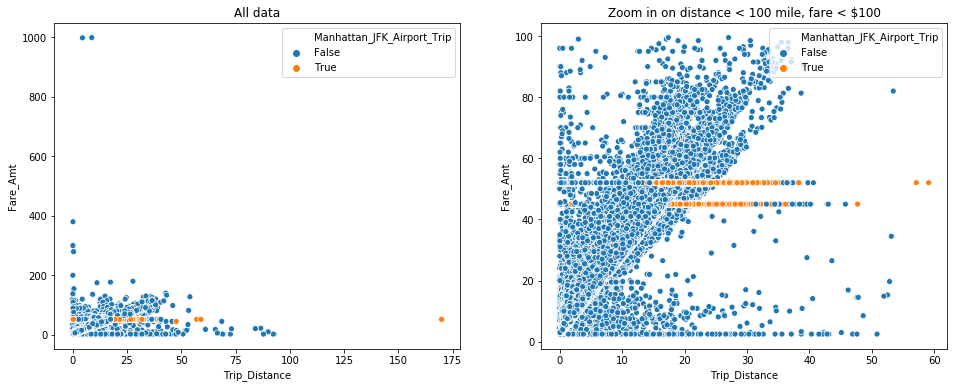

In [22]:
#Evidence that Manhattan_JFK Airport Trips are just Flat Fares
# scatter plot distance - fare
fig, axs = plt.subplots(1, 2, figsize=(16,6))
sns.scatterplot(data=gdf_sorted,x="Trip_Distance", y="Fare_Amt",ax=axs[0],hue="Manhattan_JFK_Airport_Trip")
axs[0].set_xlabel('Trip_Distance')
axs[0].set_ylabel('Fare_Amt')
axs[0].set_title('All data')

# zoom in on part of data
idx = (gdf_sorted.Trip_Distance < 60) & (gdf_sorted.Fare_Amt < 100)
sns.scatterplot(data=gdf_sorted,x=gdf_sorted[idx].Trip_Distance, y=gdf_sorted[idx].Fare_Amt,ax=axs[1],hue="Manhattan_JFK_Airport_Trip")
axs[1].set_xlabel('Trip_Distance')
axs[1].set_ylabel('Fare_Amt')
axs[1].set_title('Zoom in on distance < 100 mile, fare < $100');

#### Proof that Manhattan_JFK Trips has same Amount of RateCodeID 2

In [23]:
len(gdf_sorted.loc[gdf_sorted["Manhattan_JFK_Airport_Trip"]==True])

29924

In [24]:
len(gdf_sorted.loc[((gdf_sorted['zone_pickup'] == "JFK Airport") | (gdf_sorted['zone_dropoff'] == "JFK Airport")) & ((gdf_sorted['borough_pickup'] == "Manhattan") | (gdf_sorted['borough_dropoff'] == "Manhattan")) & (gdf_sorted['RateCodeID'] == 2)])

29924

#### There are Trips which originate in Newark Airport

In [25]:
gdf_sorted.loc[(gdf_sorted['zone_pickup'] == "Newark Airport")]

Pickup_DateTime    Dropoff_DateTime  Passenger_Count  \
index                                                              
134245  2009-08-14 20:55:00 2009-08-14 21:00:00                5   
69398   2009-09-29 18:10:00 2009-09-29 18:10:00                1   
37539   2009-10-02 18:22:00 2009-10-02 18:29:00                1   
42243   2009-10-21 14:27:00 2009-10-21 14:30:00                5   
178763  2009-12-15 16:18:14 2009-12-15 16:18:58                1   
181857  2009-12-23 15:19:00 2009-12-23 17:19:17                1   
357713  2010-03-13 19:12:00 2010-03-13 19:25:00                5   
313291  2010-05-24 11:03:00 2010-05-24 11:12:00                2   
406316  2010-08-17 20:20:38 2010-08-17 20:52:50                1   
262845  2010-09-05 07:31:00 2010-09-05 07:31:00                1   
413442  2010-11-18 16:16:00 2010-11-18 16:17:00                1   
343428  2010-12-30 17:25:44 2010-12-30 17:25:44                2   
662878  2011-02-04 10:03:00 2011-02-04 10:07:00                5   
714409  2011-04-04 14:52:00 2011-04-04 14:53:00                1   
736395  2011-05-24 19:04:00 2011-05-24 19:20:00                5   
668009  2011-12-11 11:32:31 2011-12-11 12:04:19                3   
936852  2012-05-03 06:55:50 2012-05-03 07:01:29                1   
795301  2012-10-28 14:33:17 2012-10-28 14:33:39                2   
1018820 2013-04-09 15:02:00 2013-04-09 15:06:00                1   
1205269 2013-07-29 09:57:12 2013-07-29 09:58:28                2   
1484097 2014-01-23 16:12:38 2014-01-23 16:13:00                1   
1383734 2014-04-05 09:31:46 2014-04-05 09:43:31                1   
1387491 2014-05-12 05:43:00 2014-05-12 06:11:00                1   
1274133 2014-07-06 17:03:00 2014-07-06 17:34:00                1   
1445061 2014-11-19 05:00:00 2014-11-19 05:01:00                1   
1409333 2014-12-03 13:16:39 2014-12-03 13:53:42                1   
1545362 2015-03-04 17:01:35 2015-03-04 17:02:01                1   
1665163 2015-03-13 18:03:57 2015-03-13 18:05:29                1   
1698730 2015-06-10 23:22:00 2015-06-10 23:22:30                1   
1522593 2015-06-13 16:12:06 2015-06-13 16:13:11                4   
1599706 2015-08-27 09:29:26 2015-08-27 09:29:48                1   
1599596 2015-12-11 13:46:46 2015-12-11 13:46:59                1   
1760299 2016-02-04 15:14:41 2016-02-04 15:16:53                1   
1793911 2016-02-21 20:14:06 2016-02-21 20:15:17                1   
1986745 2016-03-03 20:11:43 2016-03-03 20:12:05                3   
1982105 2016-05-25 15:32:33 2016-05-25 15:33:27                2   
1753501 2016-06-06 17:13:44 2016-06-06 17:14:18                1   
1770945 2016-06-26 13:08:32 2016-06-26 13:08:56                2   

         Trip_Distance  Pickup_Lon  Pickup_Lat  RateCodeID    Fare_Amt  \
index                                                                    
134245        0.770020  -74.170059   40.697643           0    4.898438   
69398         0.070007  -74.185379   40.690853           0   82.000000   
37539         0.740234  -74.184296   40.691986           0    5.300781   
42243         0.099976  -74.176720   40.693233           0   45.000000   
178763        0.500000  -74.176765   40.693550           0    3.300781   
181857       39.093750  -74.178909   40.689091           0   90.500000   
357713        0.229980  -74.177467   40.690697           2   45.000000   
313291        1.620117  -74.187187   40.683159           1    6.898438   
406316        8.000000  -74.183578   40.680683           1   23.296875   
262845        0.250000  -74.184090   40.691246           1    2.900391   
413442        0.059998  -74.176682   40.693901           5   80.000000   
343428       22.093750  -74.177185   40.695011           3   70.312500   
662878        0.439941  -74.156738   40.704151           1    4.101562   
714409        0.330078  -74.177979   40.690376           5  150.000000   
736395        2.640625  -74.183907   40.693207           1   11.296875   
668009       15.703125  -74.17750

#### Drop those Entries because we want to look at Trips which originates in New York City

In [26]:
print(str(len(gdf_sorted.loc[(gdf_sorted['zone_pickup'] == "Newark Airport")]) /len(gdf_sorted)*100) +" "+ "% are pickups in Newark Airport")

0.00196429531422522 % are pickups in Newark Airport


#### Drop Rows with Entries which Newark Airport Originate at

In [27]:
indexNames = gdf_sorted.loc[gdf_sorted["zone_pickup"]=="Newark Airport"].index
gdf_sorted.drop(indexNames , inplace=True)

### Look in Dataframe which has Destination in Newark Airport

#### With RateCodeID=2

In [28]:
gdf_sorted.loc[(gdf_sorted['zone_dropoff'] == "Newark Airport") & (gdf_sorted['RateCodeID'] == 2)]

Pickup_DateTime    Dropoff_DateTime  Passenger_Count  \
index                                                              
800291  2012-07-25 06:14:08 2012-07-25 06:30:00                1   
1044988 2013-07-16 14:21:32 2013-07-16 15:51:03                3   
1240305 2013-08-01 17:33:28 2013-08-01 18:35:02                1   
1435301 2014-06-05 13:10:40 2014-06-05 14:40:51                2   
1883462 2016-03-23 05:48:22 2016-03-23 08:57:55                1   
1766850 2016-04-07 14:31:43 2016-04-07 15:12:50                2   
1879937 2016-06-16 08:01:08 2016-06-16 08:01:36                1   

         Trip_Distance  Pickup_Lon  Pickup_Lat  RateCodeID  Fare_Amt  \
index                                                                  
800291       12.898438  -74.005302   40.720856           2      45.0   
1044988      33.906250  -73.778725   40.646656           2      52.0   
1240305      13.796875  -73.991112   40.729767           2      52.0   
1435301      24.203125  -73.991318   40.750713           2     120.0   
1883462      36.406250  -73.781410   40.644840           2      52.0   
1766850      17.656250  -73.984116   40.762127           2      52.0   
1879937      15.750000  -73.991982   40.726051           2      52.0   

                                      geometry_pickup  \
index                                                   
800291   POINT (-74.00530242919922 40.72085571289063)   
1044988  POINT (-73.77872467041016 40.64665603637695)   
1240305  POINT (-73.99111175537109 40.72976684570313)   
1435301  POINT (-73.99131774902344 40.75071334838867)   
1883462  POINT (-73.78141021728516 40.64484024047852)   
1766850  POINT (-73.98411560058594 40.76212692260742)   
1879937  POINT (-73.99198150634766 40.72605133056641)   

                          zone_pickup borough_pickup  Dropoff_Lon  \
index                                                               
800291           TriBeCa/Civic Center      Manhattan   -74.177238   
1044988                   JFK Airport         Queens   -74.177856   
1240305       Greenwich Village North      Manhattan   -74.177628   
1435301  Penn Station/Madison Sq West      Manhattan   -74.177193   
1883462                   JFK Airport         Queens   -74.180763   
1766850     Times Sq/Theatre District      Manhattan   -74.178062   
1879937       Greenwich Village South      Manhattan   -74.177452   

         Dropoff_Lat                              geometry_dropoff  \
index                                                                
800291     40.695084  POINT (-74.17723846435547 40.69508361816406)   
1044988    40.690090   POINT (-74.1778564453125 40.69009017944336)   
1240305    40.690254  POINT (-74.17762756347656 40.69025421142578)   
1435301    40.691139  POINT (-74.17719268798828 40.69113922119141)   
1883462    40.695240  POINT (-74.18076324462891 40.69524002075195)   
1766850    40.695583  POINT (-74.17806243896484 40.69558334350586)   
1879937    40.695332  POINT (-74.17745208740234 40.69533157348633)   

           zone_dropoff borough_dropoff  Airport_Trip  \
index                                                   
800291   Newark Airport             EWR          True   
1044988  Newark Airport             EWR          True   
1240305  Newark Airport             EWR          True   
1435301  Newark Airport             EWR          True   
1883462  Newark Airport             EWR          True   
1766850  Newark Airport             EWR          True   
1879937  Newark Airport             EWR          True   

         Manhattan_JFK_Airport_Trip  
index                                
800291                        False  
1044988                       False  
1240305                       False  
1435301                       False  
1883462                       False  
1766850                       False  
1879937                       False

In [29]:
print(str(len(gdf_sorted.loc[(gdf_sorted['zone_dropoff'] == "Newark Airport") & (gdf_sorted['RateCodeID'] == 2)]) /len(gdf_sorted)*100) +" "+ "% are dropoffs in Newark Airport and has RateCodeID 2")

0.0003618509814949408 % are dropoffs in Newark Airport and has RateCodeID 2


#### Drop those Rows,because they are faulty

In [30]:
indexNames = gdf_sorted.loc[(gdf_sorted['zone_dropoff'] == "Newark Airport") & (gdf_sorted['RateCodeID'] == 2)].index
gdf_sorted.drop(indexNames , inplace=True)

#### With RateCodeID 5

In [31]:
gdf_sorted.loc[(gdf_sorted['zone_dropoff'] == "Newark Airport") & (gdf_sorted['RateCodeID'] == 5)]

Pickup_DateTime    Dropoff_DateTime  Passenger_Count  \
index                                                              
354663  2010-04-17 06:06:21 2010-04-17 06:32:00                2   
308729  2010-05-07 05:12:12 2010-05-07 05:28:00                2   
342603  2010-05-13 17:30:50 2010-05-13 18:08:16                1   
374730  2010-06-30 13:22:00 2010-06-30 14:06:00                1   
333411  2010-08-07 14:08:03 2010-08-07 15:00:29                1   
259397  2010-09-25 07:29:38 2010-09-25 07:53:26                2   
630087  2011-04-15 16:17:57 2011-04-15 17:15:24                1   
571386  2011-04-26 14:40:26 2011-04-26 15:07:36                1   
706727  2011-05-08 17:13:00 2011-05-08 17:53:00                1   
537338  2011-05-14 14:02:02 2011-05-14 14:42:58                1   
580356  2011-05-14 19:45:00 2011-05-14 20:17:00                1   
616166  2011-05-31 09:34:00 2011-05-31 10:05:00                1   
729774  2011-06-01 12:42:00 2011-06-01 13:06:00                1   
543160  2011-07-07 15:59:00 2011-07-07 16:23:00                1   
570495  2011-10-16 15:44:25 2011-10-16 16:11:42                1   
728228  2011-11-05 12:15:00 2011-11-05 12:38:00                1   
741852  2011-11-09 13:18:00 2011-11-09 13:38:00                1   
645765  2011-11-27 16:30:01 2011-11-27 16:52:12                1   
883723  2012-01-05 11:43:07 2012-01-05 12:41:01                3   
923935  2012-01-26 14:30:00 2012-01-26 14:55:00                1   
982508  2012-02-02 18:09:36 2012-02-02 18:47:23                1   
983228  2012-04-22 07:12:09 2012-04-22 07:50:09                2   
865969  2012-05-02 15:05:00 2012-05-02 15:33:00                1   
977714  2012-05-03 17:29:28 2012-05-03 18:12:25                1   
854732  2012-05-23 15:20:59 2012-05-23 15:55:03                1   
811125  2012-06-05 05:05:00 2012-06-05 05:25:00                1   
962298  2012-07-03 15:44:45 2012-07-03 16:36:35                1   
943744  2012-07-12 23:26:00 2012-07-12 23:53:00                1   
821376  2012-08-07 12:02:49 2012-08-07 12:31:17                3   
947032  2012-08-19 09:55:00 2012-08-19 10:17:00                3   
...                     ...                 ...              ...   
1724820 2015-01-11 16:59:42 2015-01-11 17:28:52                2   
1695780 2015-02-16 14:51:07 2015-02-16 15:19:42                1   
1723317 2015-02-21 06:03:28 2015-02-21 06:25:30                1   
1707299 2015-04-20 15:26:17 2015-04-20 16:09:48                1   
1674151 2015-05-20 18:59:14 2015-05-20 19:34:00                1   
1738341 2015-05-28 18:39:26 2015-05-28 19:23:44                1   
1708416 2015-06-07 15:43:58 2015-06-07 16:23:49                1   
1506826 2015-06-12 17:24:22 2015-06-12 18:23:17                1   
1645692 2015-07-06 18:14:17 2015-07-06 18:55:15                2   
1527958 2015-09-03 23:03:51 2015-09-04 00:16:28                1   
1651835 2015-09-09 15:38:17 2015-09-09 16:16:18                2   
1581055 2015-10-16 10:15:00 2015-10-16 10:40:55                2   
1563933 2015-10-24 23:13:14 2015-10-24 23:55:37                1   
1675657 2015-11-03 16:54:06 2015-11-03 17:47:58                1   
1661548 2015-11-11 06:22:43 2015-11-11 06:52:24                1   
1553023 2015-11-19 06:47:24 2015-11-19 07:04:14                1   
1793196 2016-02-04 13:46:44 2016-02-04 14:13:45                1   
1879783 2016-02-05 06:29:06 2016-02-05 06:58:58                1   
1871435 2016-02-05 13:49:05 2016-02-05 14:18:57                1   
1969397 2016-02-11 12:20:57 2016-02-11 12:59:27                1   
1899305 2016-03-11 15:57:03 2016-03-11 16:47:19                2   
1953722 2016-03-19 08:12:06 2016-03-19 08:33:08                2   
1850746 2016-03-31 11:42:31 2016-03-31 11:49:36                1   
1914684 2016-04-14 04:16:28 2016-04-14 04:37:19                1   
1820967 2016-04-14 20:54:48 2016-04-14 21:41:17                2   
1893155 2016-04-20 18:44:10 2016-04-20 19:50:24                1   


In [32]:
print(str(len(gdf_sorted.loc[(gdf_sorted['zone_dropoff'] == "Newark Airport") & (gdf_sorted['RateCodeID'] == 5)]) /len(gdf_sorted)*100) +" "+ "% are dropoffs in Newark Airport and has RateCodeID 5")

0.005376091178506387 % are dropoffs in Newark Airport and has RateCodeID 5


#### Drop those Rows, because it's these are Situations where Taxi Driver has tricked Customers

In [33]:
indexNames = gdf_sorted.loc[(gdf_sorted['zone_dropoff'] == "Newark Airport") & (gdf_sorted['RateCodeID'] == 5)].index
gdf_sorted.drop(indexNames , inplace=True)

#### With RateCodeID=3

In [34]:
gdf_sorted.loc[(gdf_sorted['zone_dropoff'] == "Newark Airport") & (gdf_sorted['RateCodeID'] == 3)]

Pickup_DateTime    Dropoff_DateTime  Passenger_Count  \
index                                                              
367887  2010-02-12 13:28:00 2010-02-12 14:17:00                2   
284583  2010-02-14 13:53:00 2010-02-14 14:27:00                1   
384879  2010-02-15 10:47:00 2010-02-15 11:16:00                1   
372189  2010-02-22 14:35:00 2010-02-22 15:31:00                2   
475106  2010-02-27 14:28:00 2010-02-27 15:08:00                1   
449212  2010-02-28 06:51:00 2010-02-28 07:24:00                4   
353099  2010-03-09 13:50:00 2010-03-09 14:25:00                1   
271794  2010-03-12 11:25:00 2010-03-12 12:06:00                1   
280538  2010-03-15 05:28:00 2010-03-15 06:02:00                1   
459504  2010-03-15 13:04:00 2010-03-15 13:39:00                1   
302385  2010-03-21 17:19:00 2010-03-21 18:31:00                1   
425980  2010-03-26 07:05:00 2010-03-26 07:36:00                1   
305770  2010-03-28 14:16:00 2010-03-28 14:58:00                2   
351647  2010-03-29 09:10:00 2010-03-29 09:36:00                1   
325710  2010-04-01 10:54:06 2010-04-01 11:30:54                1   
468886  2010-04-02 08:30:00 2010-04-02 09:17:00                6   
358373  2010-04-04 16:24:34 2010-04-04 16:49:07                4   
400266  2010-04-05 15:08:46 2010-04-05 15:47:08                1   
492712  2010-04-06 18:25:09 2010-04-06 18:55:13                2   
463544  2010-04-07 11:04:09 2010-04-07 11:30:32                1   
465642  2010-04-12 04:55:00 2010-04-12 05:19:00                5   
352119  2010-04-14 10:24:46 2010-04-14 10:45:40                2   
406302  2010-04-14 15:14:00 2010-04-14 15:55:00                5   
410824  2010-04-15 11:13:00 2010-04-15 11:42:00                1   
279587  2010-04-16 09:42:58 2010-04-16 10:25:08                1   
352319  2010-04-17 16:25:00 2010-04-17 17:03:00                1   
341380  2010-04-20 12:08:10 2010-04-20 12:31:03                2   
412533  2010-04-21 12:33:00 2010-04-21 13:02:00                1   
287853  2010-04-23 05:55:27 2010-04-23 06:15:01                1   
365428  2010-04-23 20:09:00 2010-04-23 20:53:00                5   
...                     ...                 ...              ...   
1983202 2016-06-18 16:49:29 2016-06-18 17:27:00                2   
1852687 2016-06-19 12:50:08 2016-06-19 13:42:43                1   
1820465 2016-06-19 13:57:40 2016-06-19 15:02:06                1   
1940760 2016-06-19 19:21:05 2016-06-19 20:03:29                1   
1781985 2016-06-20 05:38:51 2016-06-20 06:07:17                1   
1979214 2016-06-20 12:04:30 2016-06-20 12:47:06                5   
1922120 2016-06-20 13:08:40 2016-06-20 13:54:56                6   
1991753 2016-06-20 13:29:19 2016-06-20 14:29:05                1   
1788896 2016-06-21 13:18:37 2016-06-21 13:46:29                1   
1816587 2016-06-21 15:23:53 2016-06-21 16:24:42                3   
1883239 2016-06-21 18:50:47 2016-06-21 19:34:59                5   
1751037 2016-06-22 12:21:01 2016-06-22 12:49:01                2   
1856094 2016-06-22 14:49:30 2016-06-22 15:49:20                1   
1879651 2016-06-23 07:15:09 2016-06-23 07:53:16                2   
1977377 2016-06-23 17:32:36 2016-06-23 18:57:01                3   
1793507 2016-06-23 21:07:22 2016-06-23 21:56:26                1   
1885856 2016-06-24 10:10:32 2016-06-24 10:47:18                4   
1819645 2016-06-24 10:35:21 2016-06-24 11:30:29                1   
1777727 2016-06-24 15:01:03 2016-06-24 16:28:00                1   
1929597 2016-06-25 09:53:54 2016-06-25 10:18:47                1   
1756696 2016-06-26 15:19:51 2016-06-26 15:59:29                2   
1909769 2016-06-26 16:19:38 2016-06-26 17:05:20                1   
1919520 2016-06-27 16:27:26 2016-06-27 17:23:10                1   
1998206 2016-06-27 19:54:07 2016-06-27 20:21:19                2   
1972188 2016-06-28 10:17:50 2016-06-28 10:47:29                1   
1988263 2016-06-28 15:11:22 2016-06-28 15:55:26                1   


#### With RateCodeID 1

In [35]:
gdf_sorted.loc[(gdf_sorted['zone_dropoff'] == "Newark Airport") & (gdf_sorted['RateCodeID'] == 1)]

Pickup_DateTime    Dropoff_DateTime  Passenger_Count  \
index                                                              
361580  2010-01-02 17:07:47 2010-01-02 17:50:53                2   
392025  2010-01-03 12:25:00 2010-01-03 12:52:00                5   
290387  2010-01-04 14:12:00 2010-01-04 15:00:00                5   
376385  2010-01-06 12:38:00 2010-01-06 13:15:00                1   
349470  2010-01-08 06:49:00 2010-01-08 07:21:00                1   
409327  2010-01-09 07:44:00 2010-01-09 08:17:00                1   
319435  2010-01-09 15:11:15 2010-01-09 15:49:37                1   
409025  2010-01-10 20:12:27 2010-01-10 20:30:04                1   
357206  2010-01-13 06:37:08 2010-01-13 07:06:29                2   
345175  2010-01-14 14:49:16 2010-01-14 15:20:57                1   
442917  2010-01-16 07:04:03 2010-01-16 07:28:59                1   
372237  2010-01-17 14:49:00 2010-01-17 15:20:00                2   
289576  2010-01-19 16:11:00 2010-01-19 16:49:00                1   
331011  2010-01-21 16:58:21 2010-01-21 17:30:32                1   
402218  2010-01-27 12:39:00 2010-01-27 13:08:00                5   
296576  2010-01-28 05:25:57 2010-01-28 05:50:37                2   
260139  2010-01-28 08:04:00 2010-01-28 08:51:00                2   
331280  2010-01-28 17:27:00 2010-01-28 18:06:00                1   
279110  2010-02-09 06:45:34 2010-02-09 07:02:19                1   
314151  2010-02-11 13:44:20 2010-02-11 14:25:12                1   
483929  2010-02-11 13:57:45 2010-02-11 14:28:40                1   
327064  2010-02-17 12:41:21 2010-02-17 13:09:01                1   
301430  2010-02-21 07:01:43 2010-02-21 07:21:38                1   
367278  2010-02-23 18:08:22 2010-02-23 18:44:23                1   
398257  2010-03-05 05:04:04 2010-03-05 05:27:49                1   
338012  2010-03-05 09:55:20 2010-03-05 10:27:18                1   
387327  2010-03-05 11:36:03 2010-03-05 12:02:22                1   
479593  2010-03-09 06:51:09 2010-03-09 07:21:08                2   
328003  2010-03-10 09:01:06 2010-03-10 09:28:35                2   
482423  2010-03-12 06:01:03 2010-03-12 06:29:16                1   
...                     ...                 ...              ...   
403189  2010-09-05 22:47:00 2010-09-05 22:51:00                1   
362005  2010-09-07 18:06:00 2010-09-07 18:10:00                2   
274155  2010-09-07 21:00:50 2010-09-07 21:08:52                1   
430547  2010-09-11 10:18:00 2010-09-11 10:32:00                1   
425587  2010-09-11 14:33:00 2010-09-11 14:44:00                2   
406792  2010-09-12 10:50:31 2010-09-12 10:57:53                1   
427664  2010-09-13 21:09:00 2010-09-13 21:18:00                5   
482756  2010-09-15 03:06:50 2010-09-15 03:17:10                1   
418041  2010-09-17 19:51:46 2010-09-17 20:09:37                1   
267731  2010-09-23 18:36:35 2010-09-23 19:07:32                1   
426173  2010-10-24 12:04:00 2010-10-24 12:47:00                1   
716530  2011-01-31 13:42:00 2011-01-31 14:27:00                1   
590595  2011-08-15 14:39:00 2011-08-15 15:19:00                1   
607072  2011-08-25 20:16:00 2011-08-25 20:57:00                5   
581283  2011-09-08 06:24:00 2011-09-08 07:03:00                5   
712691  2011-10-07 11:21:40 2011-10-07 11:48:02                1   
552200  2011-11-30 04:44:11 2011-11-30 05:01:43                1   
1183919 2013-06-30 14:19:00 2013-06-30 15:28:00                1   
1031736 2013-11-05 14:15:00 2013-11-05 15:03:00                1   
1383659 2014-05-19 05:53:57 2014-05-19 06:20:42                1   
1358096 2014-06-08 15:30:17 2014-06-08 16:03:53                1   
1644255 2015-05-27 14:51:50 2015-05-27 16:50:32                1   
1597265 2015-09-24 02:50:43 2015-09-24 03:19:39                1   
1659119 2015-10-08 08:09:57 2015-10-08 08:39:16                1   
1518061 2015-10-25 17:16:15 2015-10-25 18:57:16                2   
1649235 2015-12-31 14:28:33 2015-12-31 15:16:23                2   


#### Solution: Replace those with RateCodeID 3, because RateCodeID 3= Standard Metered Fare

In [36]:
gdf_sorted.loc[(gdf_sorted['zone_dropoff'] == "Newark Airport") & (gdf_sorted['RateCodeID'] == 1),["RateCodeID"]]=3

#### With RateCodeID 4

In [37]:
gdf_sorted.loc[(gdf_sorted['zone_dropoff'] == "Newark Airport") & (gdf_sorted['RateCodeID'] == 4)]

Pickup_DateTime    Dropoff_DateTime  Passenger_Count  \
index                                                              
328342  2010-03-08 05:26:00 2010-03-08 05:48:00                1   
438900  2010-05-13 18:49:25 2010-05-13 19:34:51                2   
422529  2010-09-29 15:25:52 2010-09-29 17:01:57                2   
691457  2011-11-19 08:28:00 2011-11-19 08:58:00                1   
844839  2012-12-16 15:31:11 2012-12-16 15:57:11                1   
1267770 2014-05-16 07:31:00 2014-05-16 08:15:00                1   

         Trip_Distance  Pickup_Lon  Pickup_Lat  RateCodeID  Fare_Amt  \
index                                                                  
328342       16.203125  -73.980858   40.755878           4    68.125   
438900       19.203125  -73.978157   40.790676           4    76.500   
422529       42.906250  -73.790100   40.646702           4   140.500   
691457       17.703125  -73.983719   40.764851           4    70.125   
844839       16.593750  -73.992386   40.758099           4    84.000   
1267770      17.609375  -74.006660   40.731392           4    86.000   

                                      geometry_pickup            zone_pickup  \
index                                                                          
328342   POINT (-73.98085784912109 40.75587844848633)         Midtown Center   
438900   POINT (-73.97815704345703 40.79067611694336)  Upper West Side North   
422529   POINT (-73.79010009765625 40.64670181274414)            JFK Airport   
691457   POINT (-73.98371887207031 40.76485061645508)          Midtown North   
844839   POINT (-73.99238586425781 40.75809860229492)           Clinton East   
1267770  POINT (-74.00666046142578 40.73139190673828)           West Village   

        borough_pickup  Dropoff_Lon  Dropoff_Lat  \
index                                              
328342       Manhattan   -74.183815    40.688694   
438900       Manhattan   -74.177849    40.695541   
422529          Queens   -74.177422    40.690708   
691457       Manhattan   -74.176880    40.694733   
844839       Manhattan   -74.176712    40.694321   
1267770      Manhattan   -74.183472    40.688141   

                                     geometry_dropoff    zone_dropoff  \
index                                                                   
328342   POINT (-74.18381500244141 40.68869400024414)  Newark Airport   
438900   POINT (-74.17784881591797 40.69554138183594)  Newark Airport   
422529   POINT (-74.17742156982422 40.69070816040039)  Newark Airport   
691457    POINT (-74.1768798828125 40.69473266601563)  Newark Airport   
844839   POINT (-74.17671203613281 40.69432067871094)  Newark Airport   
1267770   POINT (-74.1834716796875 40.68814086914063)  Newark Airport   

        borough_dropoff  Airport_Trip  Manhattan_JFK_Airport_Trip  
index                                                              
328342              EWR          True                       False  
438900              EWR          True                       False  
422529              EWR          True                       False  
691457              EWR          True                       False  
844839              EWR          True                       False  
1267770             EWR          True                       False

In [38]:
print(str(len(gdf_sorted.loc[(gdf_sorted['zone_dropoff'] == "Newark Airport") & (gdf_sorted['RateCodeID'] == 4)]) /len(gdf_sorted)*100) +" "+ "% are dropoffs in Newark Airport and has RateCodeID 4")

0.000310175781785134 % are dropoffs in Newark Airport and has RateCodeID 4


#### Drop those Rows, because it's faulty

In [39]:
indexNames = gdf_sorted.loc[(gdf_sorted['zone_dropoff'] == "Newark Airport") & (gdf_sorted['RateCodeID'] == 4)].index
gdf_sorted.drop(indexNames , inplace=True)

#### With RateCodeID 6

In [40]:
gdf_sorted.loc[(gdf_sorted['zone_dropoff'] == "Newark Airport") & (gdf_sorted['RateCodeID'] == 6)]

Empty GeoDataFrame
Columns: [Pickup_DateTime, Dropoff_DateTime, Passenger_Count, Trip_Distance, Pickup_Lon, Pickup_Lat, RateCodeID, Fare_Amt, geometry_pickup, zone_pickup, borough_pickup, Dropoff_Lon, Dropoff_Lat, geometry_dropoff, zone_dropoff, borough_dropoff, Airport_Trip, Manhattan_JFK_Airport_Trip]
Index: []

#### With RateCodeID 0

In [41]:
gdf_sorted.loc[(gdf_sorted['zone_dropoff'] == "Newark Airport") & (gdf_sorted['RateCodeID'] == 0)]

Pickup_DateTime    Dropoff_DateTime  Passenger_Count  \
index                                                             
28006  2009-01-01 17:51:00 2009-01-01 18:23:00                4   
137199 2009-01-03 17:10:00 2009-01-03 17:54:00                3   
131493 2009-01-04 15:12:00 2009-01-04 15:44:00                1   
139250 2009-01-05 16:59:45 2009-01-05 17:30:35                2   
197839 2009-01-06 16:36:00 2009-01-06 17:11:00                5   
102432 2009-01-08 09:59:00 2009-01-08 10:17:00                1   
7724   2009-01-09 05:46:31 2009-01-09 06:12:41                1   
78398  2009-01-09 13:17:58 2009-01-09 13:41:07                1   
242922 2009-01-10 14:07:03 2009-01-10 15:01:51                1   
215642 2009-01-11 15:34:00 2009-01-11 15:56:39                2   
183913 2009-01-13 15:03:00 2009-01-13 15:39:00                1   
198876 2009-01-14 13:23:00 2009-01-14 14:04:00                1   
196060 2009-01-14 17:49:11 2009-01-14 18:39:16                1   
47127  2009-01-15 06:02:16 2009-01-15 06:21:00                1   
38531  2009-01-16 15:01:27 2009-01-16 15:46:15                1   
194178 2009-01-19 16:35:00 2009-01-19 17:42:00                2   
115776 2009-01-20 09:45:31 2009-01-20 10:29:23                1   
151511 2009-01-21 13:40:13 2009-01-21 14:17:34                2   
119740 2009-01-24 15:32:00 2009-01-24 16:02:04                1   
221508 2009-01-28 10:09:00 2009-01-28 10:54:00                5   
135532 2009-01-28 11:54:56 2009-01-28 12:22:37                1   
38254  2009-01-29 04:37:24 2009-01-29 05:08:13                2   
94445  2009-01-29 08:07:00 2009-01-29 08:39:00                1   
156326 2009-01-30 11:22:00 2009-01-30 11:47:00                1   
74813  2009-01-30 19:25:02 2009-01-30 20:06:43                1   
174903 2009-02-04 06:32:06 2009-02-04 07:04:06                2   
110595 2009-02-05 08:36:18 2009-02-05 09:13:37                1   
46493  2009-02-06 05:30:40 2009-02-06 06:11:00                3   
83233  2009-02-06 15:39:14 2009-02-06 16:30:46                2   
37032  2009-02-08 15:49:00 2009-02-08 16:49:00                1   
...                    ...                 ...              ...   
219664 2009-11-23 12:11:22 2009-11-23 12:44:29                4   
71636  2009-11-23 14:54:00 2009-11-23 15:30:00                1   
53905  2009-11-25 02:40:46 2009-11-25 03:04:46                1   
118110 2009-11-25 15:52:00 2009-11-25 16:58:00                1   
39149  2009-11-26 04:54:15 2009-11-26 05:16:32                2   
236179 2009-11-28 07:48:00 2009-11-28 08:24:00                1   
113477 2009-12-02 14:13:20 2009-12-02 14:49:41                1   
11186  2009-12-05 05:35:00 2009-12-05 06:12:00                1   
13958  2009-12-09 12:29:12 2009-12-09 13:05:24                1   
136659 2009-12-10 06:05:06 2009-12-10 06:32:01                1   
164858 2009-12-10 15:27:52 2009-12-10 16:23:17                1   
52850  2009-12-11 14:55:00 2009-12-11 15:26:00                1   
202623 2009-12-16 04:12:00 2009-12-16 04:42:00                2   
244121 2009-12-17 06:51:00 2009-12-17 07:11:00                1   
165151 2009-12-19 04:54:51 2009-12-19 05:19:39                1   
153327 2009-12-19 05:43:53 2009-12-19 06:08:07                1   
75070  2009-12-19 06:16:00 2009-12-19 06:47:00                1   
7163   2009-12-19 06:58:00 2009-12-19 07:32:00                1   
45064  2009-12-19 18:24:39 2009-12-19 18:54:23                1   
174351 2009-12-20 09:57:53 2009-12-20 10:27:14                1   
101504 2009-12-21 18:06:55 2009-12-21 19:08:50                2   
117318 2009-12-22 05:50:45 2009-12-22 06:22:14                1   
113955 2009-12-23 12:18:07 2009-12-23 12:49:17                2   
65627  2009-12-23 13:54:49 2009-12-23 14:41:27                1   
209483 2009-12-23 22:28:45 2009-12-23 23:09:01                1   
14562  2009-12-26 07:42:42 2009-12-26 08:03:17                1   
37614  2009-12-29 14:48:07 2009-12-29 15:34:54            

#### Solution: Replace those with RateCodeID 3, because RateCodeID 3= Standard Metered Fare

In [42]:
gdf_sorted.loc[(gdf_sorted['zone_dropoff'] == "Newark Airport") & (gdf_sorted['RateCodeID'] == 0),["RateCodeID"]]=3

#### Airport Trips of La Guardia Airport

In [43]:
gdf_sorted.loc[(gdf_sorted['zone_pickup'] == "LaGuardia Airport") | (gdf_sorted['zone_dropoff'] == "LaGuardia Airport")]

Pickup_DateTime    Dropoff_DateTime  Passenger_Count  \
index                                                              
201595  2009-01-01 00:26:13 2009-01-01 00:48:11                1   
133504  2009-01-01 11:00:00 2009-01-01 11:13:00                1   
143532  2009-01-01 13:51:46 2009-01-01 14:08:31                1   
46093   2009-01-01 15:55:00 2009-01-01 16:15:00                3   
86646   2009-01-01 16:33:58 2009-01-01 16:57:29                1   
26052   2009-01-01 18:02:58 2009-01-01 18:20:56                4   
25148   2009-01-01 18:56:40 2009-01-01 19:17:46                1   
25025   2009-01-01 19:55:51 2009-01-01 20:09:14                1   
41557   2009-01-01 20:08:00 2009-01-01 20:24:00                1   
162294  2009-01-01 21:47:00 2009-01-01 22:05:00                1   
218490  2009-01-02 04:36:00 2009-01-02 04:52:00                1   
138388  2009-01-02 05:41:00 2009-01-02 06:04:00                5   
93257   2009-01-02 05:48:29 2009-01-02 06:01:48                1   
151196  2009-01-02 06:09:00 2009-01-02 06:29:00                5   
125803  2009-01-02 06:44:00 2009-01-02 06:45:00                1   
147110  2009-01-02 08:01:49 2009-01-02 08:27:25                1   
187407  2009-01-02 08:56:09 2009-01-02 09:18:34                3   
2892    2009-01-02 09:29:18 2009-01-02 09:47:36                1   
185319  2009-01-02 11:34:00 2009-01-02 11:52:00                5   
9199    2009-01-02 13:02:00 2009-01-02 13:43:00                1   
7683    2009-01-02 15:00:00 2009-01-02 15:16:00                2   
68321   2009-01-02 15:22:13 2009-01-02 15:47:45                1   
187391  2009-01-02 15:41:00 2009-01-02 16:05:00                1   
121862  2009-01-02 16:39:00 2009-01-02 17:04:00                2   
51085   2009-01-02 18:11:00 2009-01-02 18:17:00                3   
153710  2009-01-03 12:00:00 2009-01-03 12:27:00                1   
61781   2009-01-03 13:20:41 2009-01-03 13:46:06                1   
71247   2009-01-03 14:55:50 2009-01-03 15:18:08                1   
15572   2009-01-03 15:17:00 2009-01-03 15:40:00                2   
108737  2009-01-03 16:41:00 2009-01-03 16:41:00                1   
...                     ...                 ...              ...   
1913734 2016-06-30 13:59:16 2016-06-30 15:11:46                1   
1944409 2016-06-30 14:05:36 2016-06-30 14:30:35                1   
1883783 2016-06-30 14:07:50 2016-06-30 14:52:21                1   
1852968 2016-06-30 14:12:42 2016-06-30 15:18:09                1   
1994385 2016-06-30 14:38:10 2016-06-30 15:40:40                5   
1862267 2016-06-30 14:45:59 2016-06-30 15:13:05                1   
1842406 2016-06-30 14:46:09 2016-06-30 15:28:33                1   
1831398 2016-06-30 15:14:28 2016-06-30 16:11:11                1   
1899420 2016-06-30 15:29:12 2016-06-30 16:55:01                1   
1883504 2016-06-30 15:37:00 2016-06-30 16:12:43                1   
1967895 2016-06-30 15:40:14 2016-06-30 16:19:37                1   
1754816 2016-06-30 15:55:25 2016-06-30 17:21:15                1   
1771421 2016-06-30 16:24:01 2016-06-30 17:22:15                1   
1914215 2016-06-30 17:22:45 2016-06-30 18:07:11                1   
1955889 2016-06-30 17:26:43 2016-06-30 18:00:41                1   
1843607 2016-06-30 17:29:55 2016-06-30 18:07:59                6   
1916235 2016-06-30 17:37:16 2016-06-30 18:27:53                1   
1947863 2016-06-30 18:01:13 2016-06-30 18:41:49                1   
1874372 2016-06-30 18:11:44 2016-06-30 19:04:13                1   
1921199 2016-06-30 18:14:29 2016-06-30 18:57:56                1   
1846151 2016-06-30 18:36:44 2016-06-30 19:15:52                1   
1862804 2016-06-30 19:13:25 2016-06-30 19:48:46                2   
1795380 2016-06-30 19:22:56 2016-06-30 19:45:05                1   
1998463 2016-06-30 20:00:16 2016-06-30 20:24:29                1   
1953100 2016-06-30 20:14:36 2016-06-30 20:42:56                1   
1755093 2016-06-30 21:37:12 2016-06-30 22:29:20                1   


#### Observation:
#### Some Entries have RateCodeID 0 -> because some Taxi Drivers don't know Rate yet or faulty Entry

#### With RateCodeID=2

In [44]:
gdf_sorted.loc[((gdf_sorted['zone_pickup'] == "LaGuardia Airport") | (gdf_sorted['zone_dropoff'] == "LaGuardia Airport")) & (gdf_sorted['RateCodeID'] == 2)]

Pickup_DateTime    Dropoff_DateTime  Passenger_Count  \
index                                                              
339819  2010-07-14 05:50:50 2010-07-14 06:07:49                1   
372123  2010-08-13 11:31:00 2010-08-13 12:20:00                1   
260776  2010-08-16 13:57:00 2010-08-16 14:30:00                5   
409928  2010-08-30 22:07:36 2010-08-30 22:33:28                1   
473086  2010-09-03 06:35:39 2010-09-03 07:04:31                1   
486253  2010-09-14 07:48:05 2010-09-14 08:22:25                1   
365829  2010-09-16 04:58:25 2010-09-16 05:25:46                1   
321334  2010-09-18 10:01:00 2010-09-18 10:02:00                2   
250397  2010-10-10 16:00:00 2010-10-10 16:34:00                2   
464178  2010-11-30 09:41:00 2010-11-30 09:41:00                1   
733931  2011-06-15 08:38:00 2011-06-15 09:29:00                4   
733289  2011-06-20 14:23:00 2011-06-20 15:18:00                1   
723425  2011-08-19 00:31:00 2011-08-19 01:10:00                5   
666566  2011-10-12 13:20:00 2011-10-12 13:42:00                5   
839574  2012-04-14 18:00:25 2012-04-14 18:24:47                1   
931585  2012-06-07 03:36:40 2012-06-07 03:49:38                1   
921585  2012-06-12 08:09:00 2012-06-12 08:23:00                1   
901331  2012-06-21 15:15:17 2012-06-21 15:48:58                1   
791741  2012-07-15 18:54:30 2012-07-15 19:16:26                2   
899477  2012-11-01 14:54:00 2012-11-01 15:17:00                1   
979532  2012-11-28 13:55:57 2012-11-28 14:50:11                1   
787230  2012-12-23 10:47:00 2012-12-23 11:13:00                1   
1145026 2013-01-16 14:45:00 2013-01-16 15:08:00                2   
1136969 2013-01-25 15:58:00 2013-01-25 16:24:00                1   
1133445 2013-04-17 14:14:00 2013-04-17 14:42:00                2   
1121441 2013-05-22 21:56:06 2013-05-22 22:20:25                1   
1142439 2013-07-30 19:39:48 2013-07-30 19:41:16                1   
1195396 2013-08-12 16:29:00 2013-08-12 17:40:00                1   
1009010 2013-08-14 14:07:36 2013-08-14 15:39:55                2   
1237429 2013-09-04 08:50:39 2013-09-04 08:52:46                1   
1070094 2013-09-04 14:54:54 2013-09-04 15:21:37                2   
1063381 2013-09-17 20:50:00 2013-09-17 21:07:00                1   
1150399 2013-12-06 18:57:21 2013-12-06 19:29:03                1   
1115559 2013-12-08 05:17:19 2013-12-08 05:40:44                1   
1358347 2014-01-18 21:21:00 2014-01-18 21:38:00                1   
1380888 2014-02-27 23:09:18 2014-02-27 23:34:42                1   
1488338 2014-03-11 19:30:00 2014-03-11 20:05:00                5   
1377679 2014-07-10 21:09:20 2014-07-10 21:26:39                1   
1389119 2014-09-17 18:46:00 2014-09-17 19:48:00                1   
1403598 2014-09-27 16:45:00 2014-09-27 17:39:00                1   
1449760 2014-10-05 14:38:00 2014-10-05 15:04:00                5   
1317693 2014-12-12 17:29:00 2014-12-12 18:01:00                2   
1428353 2014-12-23 13:13:00 2014-12-23 13:48:00                1   
1610904 2015-02-09 08:25:48 2015-02-09 08:57:36                1   
1742431 2015-03-01 23:59:04 2015-03-01 23:59:47                1   
1703260 2015-03-13 17:32:49 2015-03-13 18:09:28                1   
1708590 2015-05-15 15:23:56 2015-05-15 18:09:54                1   
1742141 2015-06-10 10:37:21 2015-06-10 12:15:33                1   
1642883 2015-06-20 21:08:47 2015-06-20 21:36:10                1   
1746869 2015-07-26 23:25:32 2015-07-26 23:27:59                1   
1592710 2015-09-01 22:27:30 2015-09-01 22:45:20                1   
1625134 2015-10-01 13:52:34 2015-10-01 14:12:23                5   
1581998 2015-10-05 05:52:55 2015-10-05 06:12:17                1   
1732791 2015-11-13 19:20:17 2015-11-13 19:45:05                4   
1631781 2015-11-17 20:29:54 2015-11-17 20:38:27                2   
1634734 2015-11-18 15:29:40 2015-11-18 16:26:53                1   
1955568 2016-01-13 17:40:35 2016-01-13 18:20:45                1   


In [45]:
print(str(len(gdf_sorted.loc[((gdf_sorted['zone_pickup'] == "LaGuardia Airport") | (gdf_sorted['zone_dropoff'] == "LaGuardia Airport")) & (gdf_sorted['RateCodeID'] == 2)]) /len(gdf_sorted)*100) +" "+ "% LaGuardia Airport Trips and has RateCodeID 2")

0.003101767438782743 % LaGuardia Airport Trips and has RateCodeID 2


#### Drop those Rows,because they are faulty

In [46]:
indexNames = gdf_sorted.loc[((gdf_sorted['zone_pickup'] == "LaGuardia Airport") | (gdf_sorted['zone_dropoff'] == "LaGuardia Airport")) & (gdf_sorted['RateCodeID'] == 2)].index
gdf_sorted.drop(indexNames , inplace=True)

#### With RateCodeID 5

In [47]:
gdf_sorted.loc[((gdf_sorted['zone_pickup'] == "LaGuardia Airport") | (gdf['zone_dropoff'] == "LaGuardia Airport")) & (gdf_sorted['RateCodeID'] == 5)]

Pickup_DateTime    Dropoff_DateTime  Passenger_Count  \
index                                                              
268711  2010-05-22 12:47:52 2010-05-22 13:13:31                1   
461536  2010-06-08 14:38:00 2010-06-08 14:59:00                1   
374597  2010-06-27 10:15:00 2010-06-27 10:16:00                1   
283885  2010-07-23 22:00:35 2010-07-23 22:36:24                2   
476106  2010-09-18 08:20:43 2010-09-18 08:46:25                1   
660429  2011-01-22 13:05:05 2011-01-22 13:31:24                4   
599431  2011-02-21 07:52:34 2011-02-21 08:19:20                1   
549709  2011-03-23 01:04:23 2011-03-23 01:17:49                1   
628209  2011-04-05 08:08:18 2011-04-05 08:09:00                1   
730739  2011-07-01 13:09:41 2011-07-01 13:26:37                1   
531932  2011-09-29 09:16:31 2011-09-29 09:16:57                1   
580121  2011-10-04 13:54:00 2011-10-04 14:15:00                1   
590587  2011-10-10 20:13:16 2011-10-10 20:35:26                1   
649846  2011-10-28 14:45:43 2011-10-28 14:46:27                1   
620750  2011-11-17 11:37:00 2011-11-17 11:59:00                1   
962989  2012-03-18 17:27:00 2012-03-18 17:50:00                1   
986514  2012-06-15 17:56:31 2012-06-15 17:57:23                1   
907463  2012-11-11 17:41:44 2012-11-11 17:42:21                1   
780871  2012-12-21 05:29:00 2012-12-21 05:31:00                1   
1176620 2013-02-07 13:04:11 2013-02-07 13:05:18                1   
1093951 2013-03-01 07:59:00 2013-03-01 08:19:00                1   
1236330 2013-07-25 20:33:28 2013-07-25 21:01:29                2   
1155160 2013-12-19 15:50:00 2013-12-19 16:41:00                1   
1327283 2014-02-28 10:00:49 2014-02-28 10:01:35                1   
1491846 2014-05-19 21:36:00 2014-05-19 22:01:00                1   
1322009 2014-07-28 10:46:00 2014-07-28 11:05:00                1   
1452134 2014-10-21 17:13:00 2014-10-21 17:23:00                1   
1734748 2015-02-16 09:50:14 2015-02-16 10:20:20                4   
1598365 2015-04-25 06:34:09 2015-04-25 06:35:09                1   
1731027 2015-04-26 14:34:12 2015-04-26 15:03:18                1   
1557508 2015-06-04 04:25:35 2015-06-04 04:26:10                1   
1619426 2015-07-13 12:07:49 2015-07-13 13:19:19                1   
1707173 2015-08-03 19:01:46 2015-08-03 19:20:32                2   
1611290 2015-09-10 11:32:38 2015-09-10 11:32:50                2   
1738110 2015-11-06 16:34:05 2015-11-06 16:40:56                1   
1807688 2016-01-27 16:33:13 2016-01-27 16:55:00                1   
1758723 2016-02-08 04:26:40 2016-02-08 04:27:02                1   
1984482 2016-03-25 00:19:17 2016-03-25 01:29:46                1   
1807870 2016-04-02 03:00:37 2016-04-02 03:30:54                1   
1920512 2016-06-20 06:50:51 2016-06-20 06:51:30                1   

         Trip_Distance  Pickup_Lon  Pickup_Lat  RateCodeID    Fare_Amt  \
index                                                                    
268711       10.898438  -73.989410   40.757877           5   35.000000   
461536        9.437500  -73.974266   40.752182           5   28.000000   
374597        0.320068  -73.869804   40.772858           5   35.000000   
283885       16.500000  -73.869820   40.772156           5   91.000000   
476106       17.703125  -73.870934   40.773659           5   50.000000   
660429       10.500000  -73.993690   40.760529           5   33.000000   
599431       10.101562  -73.978165   40.758938           5   35.000000   
549709        2.300781  -73.873634   40.774117           5   64.000000   
628209       11.398438  -73.861443   40.768528           5   33.406250   
730739        8.398438  -73.864471   40.769634           5   30.000000   
531932        6.000000  -73.864998   40.770500           5   30.000000   
580121       10.843750  -73.970795   40.752388           5   35.000000   
590587       10.101562  -73.872864   40.774387           5   25.000000   
649846        0.199951  -73.870316   40.77356

In [48]:
print(str(len(gdf_sorted.loc[((gdf_sorted['zone_pickup'] == "LaGuardia Airport") | (gdf_sorted['zone_dropoff'] == "LaGuardia Airport")) & (gdf_sorted['RateCodeID'] == 5)]) /len(gdf_sorted)*100) +" "+ "% are LaGuardia Airport Trips and has RateCodeID 5")

0.002067909100919651 % are LaGuardia Airport Trips and has RateCodeID 5


#### Drop those Rows, because it's faulty

In [49]:
indexNames = gdf_sorted.loc[((gdf_sorted['zone_pickup'] == "LaGuardia Airport") | (gdf_sorted['zone_dropoff'] == "LaGuardia Airport")) & (gdf_sorted['RateCodeID'] == 5)].index
gdf_sorted.drop(indexNames , inplace=True)

#### With RateCodeID=3

In [50]:
gdf_sorted.loc[((gdf_sorted['zone_pickup'] == "LaGuardia Airport") | (gdf_sorted['zone_dropoff'] == "LaGuardia Airport")) & (gdf_sorted['RateCodeID'] == 3)]

Pickup_DateTime    Dropoff_DateTime  Passenger_Count  \
index                                                              
239822  2009-04-11 06:43:24 2009-04-11 07:17:44                2   
182160  2009-04-24 09:54:00 2009-04-24 10:38:00                4   
82359   2009-08-19 19:37:00 2009-08-19 20:37:00                2   
117724  2009-08-21 16:11:00 2009-08-21 17:23:00                1   
72677   2009-11-08 06:04:24 2009-11-08 06:39:32                2   
236179  2009-11-28 07:48:00 2009-11-28 08:24:00                1   
310571  2010-02-08 15:41:00 2010-02-08 16:26:00                4   
465517  2010-02-18 15:32:00 2010-02-18 16:05:00                1   
427689  2010-02-18 15:57:00 2010-02-18 16:28:00                1   
443732  2010-02-22 15:38:00 2010-02-22 16:07:00                4   
430264  2010-02-22 15:41:00 2010-02-22 16:12:00                5   
263965  2010-02-25 15:47:00 2010-02-25 16:32:00                1   
496806  2010-02-26 19:55:00 2010-02-26 20:11:00                3   
374494  2010-03-08 15:53:00 2010-03-08 16:18:00                1   
316316  2010-03-08 19:48:00 2010-03-08 20:07:00                2   
363882  2010-03-11 15:56:00 2010-03-11 16:27:00                1   
283725  2010-03-15 15:46:00 2010-03-15 16:14:00                2   
422128  2010-03-16 15:23:19 2010-03-16 16:21:14                1   
304081  2010-03-18 15:36:00 2010-03-18 16:17:00                1   
321220  2010-03-19 15:39:00 2010-03-19 16:12:00                1   
415089  2010-03-25 19:49:00 2010-03-25 20:20:00                1   
377852  2010-03-30 15:50:00 2010-03-30 16:08:00                5   
314511  2010-04-01 15:52:00 2010-04-01 16:34:00                3   
346828  2010-05-27 12:30:00 2010-05-27 13:31:00                1   
484547  2010-06-27 13:01:26 2010-06-27 13:47:59                1   
367981  2010-10-07 13:32:00 2010-10-07 14:24:00                2   
368796  2010-10-21 10:31:33 2010-10-21 11:14:47                1   
734533  2011-02-06 16:49:06 2011-02-06 17:52:38                1   
740407  2011-04-13 04:43:00 2011-04-13 04:43:00                1   
630777  2011-06-15 11:44:00 2011-06-15 12:12:00                1   
636736  2011-07-22 11:40:00 2011-07-22 12:31:00                2   
727614  2011-08-10 21:04:00 2011-08-10 21:23:00                1   
604157  2011-12-12 11:28:00 2011-12-12 12:19:00                5   
993539  2012-03-26 19:05:30 2012-03-26 19:59:58                2   
821015  2012-08-09 18:23:28 2012-08-09 19:37:44                4   
806527  2012-11-13 07:56:00 2012-11-13 07:56:00                5   
1171951 2013-06-14 17:33:17 2013-06-14 17:35:36                1   
1243621 2013-12-13 15:09:00 2013-12-13 15:57:00                6   
1242844 2013-12-17 14:54:00 2013-12-17 15:45:00                5   
1319503 2014-04-30 21:51:04 2014-04-30 23:02:25                1   
1490282 2014-05-13 20:30:00 2014-05-13 21:13:00                6   
1307131 2014-05-15 15:34:33 2014-05-15 16:56:09                1   
1327507 2014-06-26 14:30:00 2014-06-26 15:19:00                6   
1673307 2015-02-14 15:32:22 2015-02-14 16:59:05                1   
1580386 2015-05-03 22:08:29 2015-05-03 22:47:50                1   
1623066 2015-07-03 10:29:27 2015-07-03 10:51:23                5   
1612837 2015-09-04 06:51:14 2015-09-04 07:40:06                1   
1518061 2015-10-25 17:16:15 2015-10-25 18:57:16                2   
1761694 2016-01-22 15:14:27 2016-01-22 16:29:50                1   
1868191 2016-02-11 14:11:53 2016-02-11 15:21:00                1   
1837365 2016-05-11 13:45:11 2016-05-11 14:57:27                1   
1793507 2016-06-23 21:07:22 2016-06-23 21:56:26                1   

         Trip_Distance  Pickup_Lon  Pickup_Lat  RateCodeID    Fare_Amt  \
index                                                                    
239822       27.296875  -73.871040   40.773865           3   73.500000   
182160       32.750000  -73.871346   40.774010           3   83.125000   
82359        23.343750  -73.864159   40.771

#### Drop Rows where RateCodeID is 3 and Destination is not Newark Airport

In [51]:
gdf_sorted.loc[(gdf_sorted['RateCodeID'] == 3) & (gdf_sorted['zone_dropoff'] != "Newark Airport")]

Pickup_DateTime    Dropoff_DateTime  Passenger_Count  \
index                                                              
310571  2010-02-08 15:41:00 2010-02-08 16:26:00                4   
375856  2010-02-08 15:55:00 2010-02-08 16:00:00                1   
313366  2010-02-08 15:57:00 2010-02-08 16:03:00                1   
457889  2010-02-08 15:58:00 2010-02-08 16:07:00                1   
430465  2010-02-08 15:59:00 2010-02-08 16:03:00                4   
296259  2010-02-08 19:51:00 2010-02-08 20:05:00                4   
353375  2010-02-08 19:58:00 2010-02-08 20:07:00                1   
256648  2010-02-09 15:25:00 2010-02-09 16:02:00                1   
381443  2010-02-09 15:46:00 2010-02-09 16:04:00                5   
488038  2010-02-09 19:45:00 2010-02-09 20:02:00                3   
369756  2010-02-09 19:49:00 2010-02-09 20:10:00                1   
346009  2010-02-09 19:52:00 2010-02-09 20:00:00                5   
289934  2010-02-09 19:54:00 2010-02-09 20:11:00                1   
423993  2010-02-09 19:59:00 2010-02-09 20:04:00                1   
314683  2010-02-10 15:54:00 2010-02-10 16:01:00                1   
303160  2010-02-10 19:57:00 2010-02-10 20:02:00                1   
363462  2010-02-11 15:43:00 2010-02-11 16:01:00                1   
432711  2010-02-11 15:57:00 2010-02-11 16:04:00                2   
356600  2010-02-11 15:58:00 2010-02-11 16:18:00                1   
290251  2010-02-11 19:53:00 2010-02-11 20:00:00                1   
296660  2010-02-11 19:57:00 2010-02-11 20:06:00                1   
436919  2010-02-12 15:34:00 2010-02-12 16:01:00                5   
441715  2010-02-12 15:58:00 2010-02-12 16:14:00                1   
456238  2010-02-12 19:42:00 2010-02-12 20:13:00                5   
498473  2010-02-12 19:45:00 2010-02-12 20:06:00                2   
485935  2010-02-12 19:50:00 2010-02-12 20:07:00                2   
435010  2010-02-12 19:57:00 2010-02-12 20:11:00                5   
346395  2010-02-12 19:59:00 2010-02-12 20:05:00                2   
286684  2010-02-16 15:42:00 2010-02-16 16:02:00                1   
272873  2010-02-16 19:55:00 2010-02-16 20:07:00                1   
...                     ...                 ...              ...   
1572780 2015-10-09 16:27:24 2015-10-09 17:41:40                1   
1716651 2015-11-04 21:30:39 2015-11-04 21:33:34                1   
1644693 2015-11-10 22:09:27 2015-11-10 22:09:46                1   
1637104 2015-11-20 18:08:32 2015-11-20 18:08:41                1   
1630128 2015-12-07 15:00:48 2015-12-07 15:00:55                1   
1535905 2015-12-20 13:01:30 2015-12-20 13:10:03                2   
1539406 2015-12-22 15:56:17 2015-12-22 15:56:22                1   
1946827 2016-01-04 15:21:14 2016-01-04 15:21:19                1   
1766719 2016-01-14 13:51:31 2016-01-14 14:01:49                1   
1762179 2016-01-20 05:49:16 2016-01-20 05:49:18                1   
1852764 2016-01-26 15:15:26 2016-01-26 16:01:34                1   
1939192 2016-02-05 19:50:35 2016-02-05 19:50:39                1   
1870644 2016-02-12 14:03:01 2016-02-12 14:20:25                1   
1782007 2016-02-17 14:16:02 2016-02-17 14:16:09                1   
1888905 2016-03-04 15:34:31 2016-03-04 15:37:20                1   
1903985 2016-03-15 21:20:48 2016-03-15 21:21:13                1   
1866186 2016-03-15 22:31:31 2016-03-15 22:31:38                1   
1776464 2016-03-28 17:14:22 2016-03-28 17:14:59                4   
1839519 2016-04-11 08:52:55 2016-04-11 08:55:28                1   
1881184 2016-05-02 07:29:13 2016-05-02 07:29:42                2   
1797110 2016-05-07 12:27:21 2016-05-07 12:29:05                1   
1973031 2016-05-10 10:05:33 2016-05-10 10:37:34                1   
1800833 2016-05-22 06:04:09 2016-05-22 06:06:11                1   
1952512 2016-06-10 14:38:47 2016-06-10 14:54:32                1   
1957562 2016-06-13 06:49:53 2016-06-13 06:57:19                2   
1836485 2016-06-13 11:50:05 2016-06-13 11:52:10                1   


In [52]:
print(str(len(gdf_sorted.loc[(gdf_sorted['RateCodeID'] == 3) & (gdf_sorted['zone_dropoff'] != "Newark Airport")])/len(gdf_sorted)*100) + " "+ "% have RateCodeID 3 and there Destination is not Newark Airport")

0.019283651134452545 % have RateCodeID 3 and there Destination is not Newark Airport


#### Drop those Rows

In [53]:
indexNames = gdf_sorted.loc[(gdf_sorted['RateCodeID'] == 3) & (gdf_sorted['zone_dropoff'] != "Newark Airport")].index
gdf_sorted.drop(indexNames , inplace=True)

#### With RateCodeID 1

In [54]:
gdf_sorted.loc[((gdf_sorted['zone_pickup'] == "LaGuardia Airport") | (gdf_sorted['zone_dropoff'] == "LaGuardia Airport")) & (gdf_sorted['RateCodeID'] == 1)]

Pickup_DateTime    Dropoff_DateTime  Passenger_Count  \
index                                                              
313622  2010-01-01 05:14:52 2010-01-01 05:27:32                2   
256063  2010-01-01 05:57:50 2010-01-01 06:15:29                2   
288304  2010-01-01 10:13:52 2010-01-01 10:30:51                1   
255770  2010-01-01 13:12:45 2010-01-01 13:34:40                3   
309303  2010-01-01 16:50:00 2010-01-01 17:06:00                1   
378576  2010-01-01 16:52:00 2010-01-01 17:17:00                5   
302792  2010-01-01 20:56:00 2010-01-01 21:21:00                2   
387634  2010-01-01 21:14:13 2010-01-02 00:38:56                2   
491678  2010-01-02 00:08:05 2010-01-02 00:33:42                1   
444233  2010-01-02 06:00:53 2010-01-02 06:10:22                1   
483105  2010-01-02 10:52:00 2010-01-02 11:15:00                2   
427408  2010-01-02 12:13:00 2010-01-02 12:33:00                1   
382053  2010-01-02 13:45:00 2010-01-02 14:08:00                3   
397180  2010-01-02 15:25:16 2010-01-02 15:40:42                1   
420821  2010-01-02 15:38:52 2010-01-02 16:04:29                1   
439129  2010-01-02 17:32:56 2010-01-02 17:50:39                3   
458547  2010-01-02 18:23:41 2010-01-02 18:41:16                1   
384920  2010-01-02 20:06:00 2010-01-02 20:32:00                1   
400445  2010-01-02 20:25:56 2010-01-02 20:44:34                1   
458625  2010-01-02 20:48:00 2010-01-02 21:11:00                2   
336628  2010-01-03 01:39:18 2010-01-03 01:59:15                1   
423244  2010-01-03 08:49:25 2010-01-03 09:08:29                2   
380276  2010-01-03 10:01:00 2010-01-03 10:13:00                5   
415521  2010-01-03 12:19:03 2010-01-03 12:28:24                1   
330111  2010-01-03 13:06:00 2010-01-03 13:26:00                2   
286206  2010-01-03 14:59:19 2010-01-03 15:19:21                1   
317244  2010-01-03 15:59:48 2010-01-03 16:15:04                1   
255187  2010-01-03 16:06:58 2010-01-03 16:23:06                2   
250014  2010-01-03 16:46:44 2010-01-03 17:05:58                1   
405566  2010-01-03 19:52:00 2010-01-03 20:10:00                5   
...                     ...                 ...              ...   
1913734 2016-06-30 13:59:16 2016-06-30 15:11:46                1   
1944409 2016-06-30 14:05:36 2016-06-30 14:30:35                1   
1883783 2016-06-30 14:07:50 2016-06-30 14:52:21                1   
1852968 2016-06-30 14:12:42 2016-06-30 15:18:09                1   
1994385 2016-06-30 14:38:10 2016-06-30 15:40:40                5   
1862267 2016-06-30 14:45:59 2016-06-30 15:13:05                1   
1842406 2016-06-30 14:46:09 2016-06-30 15:28:33                1   
1831398 2016-06-30 15:14:28 2016-06-30 16:11:11                1   
1899420 2016-06-30 15:29:12 2016-06-30 16:55:01                1   
1883504 2016-06-30 15:37:00 2016-06-30 16:12:43                1   
1967895 2016-06-30 15:40:14 2016-06-30 16:19:37                1   
1754816 2016-06-30 15:55:25 2016-06-30 17:21:15                1   
1771421 2016-06-30 16:24:01 2016-06-30 17:22:15                1   
1914215 2016-06-30 17:22:45 2016-06-30 18:07:11                1   
1955889 2016-06-30 17:26:43 2016-06-30 18:00:41                1   
1843607 2016-06-30 17:29:55 2016-06-30 18:07:59                6   
1916235 2016-06-30 17:37:16 2016-06-30 18:27:53                1   
1947863 2016-06-30 18:01:13 2016-06-30 18:41:49                1   
1874372 2016-06-30 18:11:44 2016-06-30 19:04:13                1   
1921199 2016-06-30 18:14:29 2016-06-30 18:57:56                1   
1846151 2016-06-30 18:36:44 2016-06-30 19:15:52                1   
1862804 2016-06-30 19:13:25 2016-06-30 19:48:46                2   
1795380 2016-06-30 19:22:56 2016-06-30 19:45:05                1   
1998463 2016-06-30 20:00:16 2016-06-30 20:24:29                1   
1953100 2016-06-30 20:14:36 2016-06-30 20:42:56                1   
1755093 2016-06-30 21:37:12 2016-06-30 22:29:20                1   


#### With RateCodeID 4

In [55]:
gdf_sorted.loc[((gdf_sorted['zone_pickup'] == "LaGuardia Airport") | (gdf_sorted['zone_dropoff'] == "LaGuardia Airport")) & (gdf_sorted['RateCodeID'] == 4)]

Pickup_DateTime    Dropoff_DateTime  Passenger_Count  \
index                                                              
485819  2010-02-08 16:15:00 2010-02-08 16:40:00                2   
281343  2010-02-08 19:06:00 2010-02-08 19:39:00                1   
286862  2010-02-20 11:17:00 2010-02-20 11:50:00                5   
335208  2010-02-23 14:53:00 2010-02-23 15:20:00                1   
405503  2010-03-22 16:06:00 2010-03-22 16:35:00                1   
346162  2010-03-24 09:29:00 2010-03-24 10:02:00                1   
451153  2010-04-06 10:37:00 2010-04-06 11:01:00                1   
378881  2010-04-26 17:38:26 2010-04-26 17:47:34                2   
479827  2010-05-24 14:44:00 2010-05-24 15:19:00                5   
311860  2010-06-04 22:13:00 2010-06-04 22:31:00                1   
420160  2010-06-08 14:11:00 2010-06-08 14:31:00                1   
284317  2010-06-13 12:14:00 2010-06-13 12:39:00                1   
339121  2010-06-16 17:33:09 2010-06-16 17:58:19                1   
401681  2010-06-23 14:53:00 2010-06-23 15:23:00                1   
320950  2010-07-18 22:52:18 2010-07-18 23:14:55                1   
485832  2010-07-26 22:01:05 2010-07-26 22:17:16                1   
313423  2010-09-29 19:58:00 2010-09-29 20:19:00                5   
427413  2010-11-14 11:15:00 2010-11-14 11:40:00                4   
282188  2010-11-14 23:56:00 2010-11-15 00:08:00                1   
302434  2010-12-18 08:02:00 2010-12-18 08:23:00                1   
334855  2010-12-30 20:11:00 2010-12-30 20:33:00                1   
601433  2011-01-09 11:46:00 2011-01-09 12:31:00                1   
725346  2011-01-18 17:21:00 2011-01-18 17:51:00                3   
589188  2011-02-10 15:57:00 2011-02-10 15:58:00                1   
556839  2011-03-08 16:39:30 2011-03-08 17:28:12                1   
553801  2011-04-03 18:13:40 2011-04-03 18:36:59                1   
718073  2011-04-08 15:52:00 2011-04-08 17:04:00                1   
534714  2011-05-12 08:48:31 2011-05-12 09:16:40                1   
599526  2011-05-22 09:59:58 2011-05-22 10:26:14                1   
559775  2011-05-31 14:51:53 2011-05-31 15:37:54                1   
...                     ...                 ...              ...   
674509  2011-09-07 10:22:42 2011-09-07 11:13:55                1   
585017  2011-10-13 16:50:00 2011-10-13 17:10:00                5   
560788  2011-10-26 15:46:00 2011-10-26 15:57:00                5   
504724  2011-11-03 19:08:00 2011-11-03 19:15:00                1   
572151  2011-11-13 15:09:00 2011-11-13 15:52:00                2   
686761  2011-12-01 16:23:00 2011-12-01 16:23:00                1   
651973  2011-12-18 18:39:04 2011-12-18 19:11:54                1   
794060  2012-01-16 18:15:00 2012-01-16 18:40:00                1   
878616  2012-01-16 18:19:00 2012-01-16 18:34:00                5   
982505  2012-01-30 19:31:38 2012-01-30 19:54:50                1   
835941  2012-02-02 11:07:00 2012-02-02 11:37:00                5   
901385  2012-02-08 06:08:19 2012-02-08 06:27:34                1   
943849  2012-03-10 17:49:00 2012-03-10 18:20:00                1   
810044  2012-04-08 18:14:14 2012-04-08 18:28:24                1   
951379  2012-04-08 19:23:00 2012-04-08 19:23:00                5   
993700  2012-05-19 08:16:00 2012-05-19 08:40:00                1   
755075  2012-05-25 17:34:00 2012-05-25 18:01:00                1   
759165  2012-06-17 14:05:00 2012-06-17 14:30:00                1   
829175  2012-07-22 15:52:00 2012-07-22 16:25:00                1   
984115  2012-07-23 15:28:00 2012-07-23 15:44:00                1   
962033  2012-08-24 21:46:00 2012-08-24 22:02:00                6   
847473  2012-09-14 18:51:00 2012-09-14 19:06:00                1   
794020  2012-09-19 18:58:00 2012-09-19 19:21:00                6   
841637  2012-10-16 18:58:59 2012-10-16 19:21:19                1   
827027  2012-10-24 22:47:00 2012-10-24 23:02:00                1   
848032  2012-12-02 09:30:00 2012-12-02 09:49:00                1   


In [56]:
print(str(len(gdf_sorted.loc[((gdf_sorted['zone_pickup'] == "LaGuardia Airport") | (gdf_sorted['zone_dropoff'] == "LaGuardia Airport")) & (gdf_sorted['RateCodeID'] == 4)]) /len(gdf_sorted)*100) +" "+ "% are LaGuardia Airport Trips and has RateCodeID 4")

0.003361069916459314 % are LaGuardia Airport Trips and has RateCodeID 4


#### Drop those Rows, because it's faulty

In [57]:
indexNames = gdf_sorted.loc[((gdf_sorted['zone_pickup'] == "LaGuardia Airport") | (gdf_sorted['zone_dropoff'] == "LaGuardia Airport")) & (gdf_sorted['RateCodeID'] == 4)].index
gdf_sorted.drop(indexNames , inplace=True)

#### With RateCodeID 6

In [58]:
gdf_sorted.loc[((gdf_sorted['zone_pickup'] == "LaGuardia Airport") | (gdf_sorted['zone_dropoff'] == "LaGuardia Airport")) & (gdf_sorted['RateCodeID'] == 6)]

Pickup_DateTime    Dropoff_DateTime  Passenger_Count  \
index                                                             
503606 2011-07-07 09:46:00 2011-07-07 10:07:00                1   

        Trip_Distance  Pickup_Lon  Pickup_Lat  RateCodeID  Fare_Amt  \
index                                                                 
503606       1.139648  -73.973061   40.757305           6       2.5   

                                     geometry_pickup   zone_pickup  \
index                                                                
503606  POINT (-73.97306060791016 40.75730514526367)  Midtown East   

       borough_pickup  Dropoff_Lon  Dropoff_Lat  \
index                                             
503606      Manhattan   -73.865288    40.770657   

                                    geometry_dropoff       zone_dropoff  \
index                                                                     
503606  POINT (-73.86528778076172 40.77065658569336)  LaGuardia Airport   

       borough_dropoff  Airport_Trip  Manhattan_JFK_Airport_Trip  
index                                                             
503606          Queens          True                       False

In [59]:
indexNames = gdf_sorted.loc[((gdf_sorted['zone_pickup'] == "LaGuardia Airport") | (gdf_sorted['zone_dropoff'] == "LaGuardia Airport")) & (gdf_sorted['RateCodeID'] == 6)].index
gdf_sorted.drop(indexNames , inplace=True)

#### With RateCodeID 0

In [60]:
gdf_sorted.loc[((gdf_sorted['zone_pickup'] == "LaGuardia Airport") | (gdf['zone_dropoff'] == "LaGuardia Airport")) & (gdf_sorted['RateCodeID'] == 0)]

Pickup_DateTime    Dropoff_DateTime  Passenger_Count  \
index                                                              
201595  2009-01-01 00:26:13 2009-01-01 00:48:11                1   
133504  2009-01-01 11:00:00 2009-01-01 11:13:00                1   
143532  2009-01-01 13:51:46 2009-01-01 14:08:31                1   
46093   2009-01-01 15:55:00 2009-01-01 16:15:00                3   
86646   2009-01-01 16:33:58 2009-01-01 16:57:29                1   
26052   2009-01-01 18:02:58 2009-01-01 18:20:56                4   
25148   2009-01-01 18:56:40 2009-01-01 19:17:46                1   
25025   2009-01-01 19:55:51 2009-01-01 20:09:14                1   
41557   2009-01-01 20:08:00 2009-01-01 20:24:00                1   
162294  2009-01-01 21:47:00 2009-01-01 22:05:00                1   
218490  2009-01-02 04:36:00 2009-01-02 04:52:00                1   
138388  2009-01-02 05:41:00 2009-01-02 06:04:00                5   
93257   2009-01-02 05:48:29 2009-01-02 06:01:48                1   
151196  2009-01-02 06:09:00 2009-01-02 06:29:00                5   
125803  2009-01-02 06:44:00 2009-01-02 06:45:00                1   
147110  2009-01-02 08:01:49 2009-01-02 08:27:25                1   
187407  2009-01-02 08:56:09 2009-01-02 09:18:34                3   
2892    2009-01-02 09:29:18 2009-01-02 09:47:36                1   
185319  2009-01-02 11:34:00 2009-01-02 11:52:00                5   
9199    2009-01-02 13:02:00 2009-01-02 13:43:00                1   
7683    2009-01-02 15:00:00 2009-01-02 15:16:00                2   
68321   2009-01-02 15:22:13 2009-01-02 15:47:45                1   
187391  2009-01-02 15:41:00 2009-01-02 16:05:00                1   
121862  2009-01-02 16:39:00 2009-01-02 17:04:00                2   
51085   2009-01-02 18:11:00 2009-01-02 18:17:00                3   
153710  2009-01-03 12:00:00 2009-01-03 12:27:00                1   
61781   2009-01-03 13:20:41 2009-01-03 13:46:06                1   
71247   2009-01-03 14:55:50 2009-01-03 15:18:08                1   
15572   2009-01-03 15:17:00 2009-01-03 15:40:00                2   
108737  2009-01-03 16:41:00 2009-01-03 16:41:00                1   
...                     ...                 ...              ...   
169166  2009-12-30 11:20:12 2009-12-30 11:59:23                2   
84622   2009-12-30 11:48:28 2009-12-30 12:04:58                1   
172257  2009-12-30 11:58:00 2009-12-30 12:40:00                1   
156079  2009-12-30 14:31:00 2009-12-30 15:05:00                5   
167808  2009-12-30 21:00:00 2009-12-30 21:14:00                2   
197879  2009-12-30 21:25:22 2009-12-30 21:36:42                1   
213373  2009-12-30 21:40:00 2009-12-30 21:56:00                1   
99868   2009-12-30 22:54:00 2009-12-30 23:14:00                1   
131088  2009-12-31 00:21:00 2009-12-31 00:27:00                2   
155465  2009-12-31 05:47:01 2009-12-31 06:05:18                1   
91953   2009-12-31 06:34:04 2009-12-31 06:57:27                2   
138669  2009-12-31 07:56:00 2009-12-31 08:13:00                1   
218632  2009-12-31 09:04:27 2009-12-31 09:31:59                2   
43383   2009-12-31 10:17:00 2009-12-31 10:47:00                3   
121293  2009-12-31 12:00:13 2009-12-31 12:24:45                1   
31770   2009-12-31 12:58:00 2009-12-31 13:34:00                6   
179452  2009-12-31 13:36:20 2009-12-31 14:06:01                1   
147391  2009-12-31 14:22:00 2009-12-31 14:41:00                1   
8916    2009-12-31 16:15:00 2009-12-31 16:58:00                1   
12220   2009-12-31 16:22:00 2009-12-31 16:46:00                5   
200806  2009-12-31 19:28:13 2009-12-31 19:42:11                2   
86210   2009-12-31 20:59:00 2009-12-31 21:17:00                1   
48719   2009-12-31 23:01:00 2009-12-31 23:07:00                1   
208839  2009-12-31 23:48:14 2010-01-01 00:22:26                1   
456330  2010-05-01 01:12:36 2010-05-01 01:19:43                1   
304022  2010-05-10 15:36:18 2010-05-10 15:59:07                1   


#### Solution: Replace those with RateCodeID 1

In [61]:
gdf_sorted.loc[((gdf_sorted['zone_pickup'] == "LaGuardia Airport") | (gdf_sorted['zone_dropoff'] == "LaGuardia Airport")) & (gdf_sorted['RateCodeID'] == 0),["RateCodeID"]]=1

#### Check Entries with Pickup_DateTime higher than Dropoff_DateTime

In [62]:
gdf_sorted.loc[gdf_sorted["Pickup_DateTime"]>gdf_sorted["Dropoff_DateTime"]]

Pickup_DateTime    Dropoff_DateTime  Passenger_Count  \
index                                                              
130565  2009-01-01 09:58:00 2009-01-01 09:56:00                5   
23524   2009-01-01 12:31:00 2009-01-01 12:20:00                2   
241582  2009-01-01 13:47:00 2009-01-01 13:44:00                1   
237922  2009-01-01 16:59:00 2009-01-01 16:58:00                1   
91432   2009-01-01 17:17:00 2009-01-01 17:16:00                1   
217124  2009-01-01 17:39:00 2009-01-01 17:34:00                1   
216628  2009-01-01 18:50:00 2009-01-01 18:49:00                1   
110058  2009-01-01 22:40:00 2009-01-01 22:35:00                1   
124693  2009-01-02 10:05:00 2009-01-02 10:02:00                1   
243094  2009-01-02 12:31:00 2009-01-02 12:30:00                1   
140185  2009-01-02 12:59:00 2009-01-02 12:58:00                1   
68177   2009-01-02 13:51:00 2009-01-02 13:45:00                1   
98959   2009-01-02 21:22:00 2009-01-02 21:20:00                2   
200490  2009-01-03 02:59:00 2009-01-03 02:58:00                5   
188094  2009-01-03 03:10:00 2009-01-03 03:09:00                1   
37844   2009-01-03 04:02:00 2009-01-03 04:01:00                5   
103047  2009-01-03 09:45:00 2009-01-03 09:39:00                1   
182369  2009-01-03 10:24:00 2009-01-03 10:21:00                2   
170673  2009-01-03 13:21:00 2009-01-03 12:32:00                1   
187499  2009-01-03 15:12:00 2009-01-03 15:11:00                1   
18795   2009-01-03 15:53:00 2009-01-03 15:46:00                1   
245104  2009-01-03 17:21:00 2009-01-03 17:15:00                5   
161284  2009-01-03 23:26:00 2009-01-03 23:17:00                1   
131776  2009-01-04 09:05:00 2009-01-04 09:04:00                1   
65758   2009-01-04 14:47:00 2009-01-04 14:45:00                5   
196576  2009-01-04 17:59:00 2009-01-04 17:52:00                5   
118832  2009-01-04 22:18:00 2009-01-04 22:15:00                1   
119627  2009-01-04 22:27:00 2009-01-04 22:26:00                3   
190877  2009-01-05 05:17:00 2009-01-05 05:11:00                1   
229403  2009-01-05 15:22:00 2009-01-05 15:21:00                1   
...                     ...                 ...              ...   
49765   2009-03-28 15:32:00 2009-03-28 15:31:00                1   
55373   2009-03-30 15:55:00 2009-03-30 15:52:00                1   
201445  2009-03-31 22:14:00 2009-03-31 22:12:00                1   
140019  2009-04-05 04:28:00 2009-04-05 04:27:00                1   
135921  2009-04-07 14:48:00 2009-04-07 14:47:00                1   
5272    2009-04-09 21:34:00 2009-04-09 21:33:00                5   
13251   2009-04-14 23:56:00 2009-04-14 00:10:00                5   
79500   2009-04-17 01:43:00 2009-04-17 01:41:00                5   
108387  2009-04-21 20:01:00 2009-04-21 19:59:00                1   
218220  2009-04-23 23:06:00 2009-04-23 22:55:00                5   
164633  2009-04-26 13:16:00 2009-04-26 13:15:00                1   
233917  2009-04-29 15:34:00 2009-04-29 15:31:00                2   
169970  2009-05-02 13:49:00 2009-05-02 13:47:00                1   
226693  2009-05-03 11:31:00 2009-05-03 11:30:00                1   
17761   2009-05-07 14:38:00 2009-05-07 14:26:00                1   
35122   2009-05-09 18:53:00 2009-05-09 18:44:00                3   
142364  2009-05-13 23:20:00 2009-05-13 23:13:00                1   
221888  2009-05-13 23:55:00 2009-05-13 00:09:00                5   
145472  2009-06-02 19:15:00 2009-06-02 19:14:00                2   
218170  2009-09-13 16:27:00 2009-09-13 16:26:00                1   
92283   2009-09-19 22:49:00 2009-09-19 22:47:00                1   
109754  2009-09-26 04:14:00 2009-09-26 04:13:00                2   
441945  2010-06-21 22:25:00 2010-06-21 21:31:00                1   
657123  2011-03-13 03:48:31 2011-03-13 03:00:11                1   
968356  2012-11-04 01:44:12 2012-11-04 01:02:18                4   
1238457 2013-03-10 03:57:52 2013-03-10 03:10:42                1   


In [63]:
len(gdf_sorted.loc[gdf_sorted["Pickup_DateTime"]>gdf_sorted["Dropoff_DateTime"]])/len(gdf_sorted)*100

0.016754212598547348

#### Decision: Drop those rows because they are just 0.017 Percent of the dataframe

In [64]:
indexNames = gdf_sorted.loc[gdf_sorted["Pickup_DateTime"]>gdf_sorted["Dropoff_DateTime"]].index
gdf_sorted.drop(indexNames , inplace=True)

#### Check Entries with Pickup_DateTime equals Dropoff_DateTime

In [65]:
gdf_sorted.loc[gdf_sorted["Pickup_DateTime"]==gdf_sorted["Dropoff_DateTime"]]

Pickup_DateTime    Dropoff_DateTime  Passenger_Count  \
index                                                              
185372  2009-01-01 14:09:00 2009-01-01 14:09:00                6   
203957  2009-01-02 17:31:00 2009-01-02 17:31:00                1   
160297  2009-01-02 23:43:00 2009-01-02 23:43:00                1   
236394  2009-01-03 00:29:00 2009-01-03 00:29:00                2   
141415  2009-01-03 08:00:00 2009-01-03 08:00:00                1   
108737  2009-01-03 16:41:00 2009-01-03 16:41:00                1   
59368   2009-01-03 20:13:00 2009-01-03 20:13:00                1   
152806  2009-01-04 01:15:00 2009-01-04 01:15:00                1   
200251  2009-01-04 16:00:00 2009-01-04 16:00:00                2   
117762  2009-01-04 16:58:00 2009-01-04 16:58:00                5   
113248  2009-01-04 17:03:00 2009-01-04 17:03:00                2   
157491  2009-01-04 19:27:00 2009-01-04 19:27:00                1   
204491  2009-01-05 11:26:00 2009-01-05 11:26:00                5   
1864    2009-01-05 12:12:00 2009-01-05 12:12:00                2   
63727   2009-01-06 05:57:00 2009-01-06 05:57:00                1   
181293  2009-01-06 11:25:00 2009-01-06 11:25:00                5   
131562  2009-01-06 19:33:00 2009-01-06 19:33:00                6   
195000  2009-01-06 20:02:00 2009-01-06 20:02:00                1   
13147   2009-01-06 20:51:00 2009-01-06 20:51:00                1   
209945  2009-01-07 01:53:41 2009-01-07 01:53:41                1   
84130   2009-01-08 03:09:00 2009-01-08 03:09:00                1   
186957  2009-01-08 13:30:00 2009-01-08 13:30:00                1   
42575   2009-01-08 15:05:00 2009-01-08 15:05:00                2   
121650  2009-01-08 18:23:00 2009-01-08 18:23:00                5   
139731  2009-01-08 20:28:00 2009-01-08 20:28:00                1   
35877   2009-01-08 20:39:00 2009-01-08 20:39:00                1   
53376   2009-01-09 00:51:00 2009-01-09 00:51:00                5   
192956  2009-01-09 10:29:00 2009-01-09 10:29:00                1   
232892  2009-01-09 11:20:00 2009-01-09 11:20:00                1   
194974  2009-01-09 14:38:00 2009-01-09 14:38:00                5   
...                     ...                 ...              ...   
1445711 2014-10-15 18:11:11 2014-10-15 18:11:11                1   
1302428 2014-10-15 19:20:05 2014-10-15 19:20:05                1   
1414204 2014-10-15 19:26:57 2014-10-15 19:26:57                1   
1323164 2014-10-22 20:07:00 2014-10-22 20:07:00                1   
1336516 2014-10-28 05:50:00 2014-10-28 05:50:00                5   
1297757 2014-10-29 06:36:00 2014-10-29 06:36:00                1   
1382763 2014-10-30 15:20:00 2014-10-30 15:20:00                3   
1264170 2014-11-02 01:53:03 2014-11-02 01:53:03                1   
1258638 2014-11-06 14:31:00 2014-11-06 14:31:00                2   
1258296 2014-11-08 14:32:00 2014-11-08 14:32:00                1   
1324408 2014-11-09 21:33:00 2014-11-09 21:33:00                1   
1492503 2014-11-11 22:56:00 2014-11-11 22:56:00                3   
1284057 2014-11-19 17:53:00 2014-11-19 17:53:00                6   
1284102 2014-11-25 13:02:00 2014-11-25 13:02:00                1   
1477343 2014-12-01 09:27:00 2014-12-01 09:27:00                1   
1279280 2014-12-01 19:26:00 2014-12-01 19:26:00                1   
1331594 2014-12-02 08:04:00 2014-12-02 08:04:00                1   
1318759 2014-12-02 16:03:00 2014-12-02 16:03:00                6   
1344785 2014-12-07 19:09:00 2014-12-07 19:09:00                5   
1280969 2014-12-09 21:41:00 2014-12-09 21:41:00                1   
1471591 2014-12-19 17:04:00 2014-12-19 17:04:00                1   
1284286 2014-12-21 21:11:00 2014-12-21 21:11:00                5   
1415347 2014-12-31 23:23:00 2014-12-31 23:23:00                5   
1744432 2015-03-12 12:21:09 2015-03-12 12:21:09                1   
1703683 2015-05-18 17:14:42 2015-05-18 17:14:42                1   
1825891 2016-02-14 00:00:00 2016-02-14 00:00:00                1   


In [66]:
len(gdf_sorted.loc[gdf_sorted["Pickup_DateTime"]==gdf_sorted["Dropoff_DateTime"]])/len(gdf_sorted)*100

0.06035630389786906

#### Decision: Drop those rows because they are just 0.06 Percent of the dataframe

In [67]:
indexNames = gdf_sorted.loc[gdf_sorted["Pickup_DateTime"]==gdf_sorted["Dropoff_DateTime"]].index
gdf_sorted.drop(indexNames , inplace=True)

#### Check Entries with same Geolocation

In [68]:
gdf_sorted.loc[(gdf_sorted["Pickup_Lon"]==gdf_sorted["Dropoff_Lon"]) & (gdf_sorted["Pickup_Lat"]==gdf_sorted["Dropoff_Lat"])]

Pickup_DateTime    Dropoff_DateTime  Passenger_Count  \
index                                                              
58072   2009-01-01 02:50:00 2009-01-01 02:58:36                1   
221747  2009-01-02 16:45:00 2009-01-02 17:07:00                1   
33590   2009-01-02 22:54:37 2009-01-02 23:07:45                2   
133964  2009-01-03 00:25:00 2009-01-03 00:27:00                1   
238090  2009-01-03 04:55:55 2009-01-03 05:04:39                1   
2694    2009-01-03 11:35:00 2009-01-03 11:57:00                5   
142761  2009-01-03 12:16:14 2009-01-03 12:16:17                1   
144020  2009-01-03 16:18:22 2009-01-03 16:28:45                1   
123391  2009-01-03 16:58:25 2009-01-03 17:03:27                3   
199082  2009-01-04 00:38:00 2009-01-04 00:41:00                2   
225637  2009-01-04 13:20:52 2009-01-04 13:28:36                2   
96817   2009-01-04 13:23:58 2009-01-04 13:41:05                1   
118429  2009-01-04 21:14:58 2009-01-04 21:22:43                1   
245601  2009-01-05 00:15:32 2009-01-05 00:19:55                1   
182782  2009-01-05 00:19:15 2009-01-05 00:24:27                1   
78911   2009-01-05 07:13:00 2009-01-05 07:28:00                3   
94824   2009-01-05 11:46:00 2009-01-05 11:56:00                3   
205825  2009-01-05 18:26:00 2009-01-05 18:33:00                1   
79630   2009-01-06 10:52:53 2009-01-06 10:59:08                2   
174954  2009-01-06 11:20:00 2009-01-06 11:24:00                5   
70054   2009-01-06 13:33:30 2009-01-06 13:36:03                1   
68709   2009-01-07 00:17:00 2009-01-07 00:20:19                2   
46578   2009-01-07 06:58:07 2009-01-07 07:08:30                1   
95149   2009-01-07 08:01:00 2009-01-07 08:17:00                1   
188521  2009-01-07 10:41:53 2009-01-07 11:00:34                1   
116389  2009-01-07 15:24:55 2009-01-07 15:40:55                1   
71533   2009-01-07 16:09:13 2009-01-07 16:20:59                1   
238130  2009-01-07 22:51:00 2009-01-07 23:00:00                1   
132040  2009-01-07 23:03:00 2009-01-07 23:11:00                1   
108364  2009-01-08 10:21:51 2009-01-08 10:36:57                1   
...                     ...                 ...              ...   
1806211 2016-06-22 19:47:07 2016-06-22 19:54:28                1   
1805480 2016-06-22 21:27:47 2016-06-22 21:43:50                6   
1844424 2016-06-22 21:33:49 2016-06-22 21:45:09                1   
1868038 2016-06-23 00:39:32 2016-06-23 01:03:28                2   
1806597 2016-06-23 09:31:33 2016-06-23 09:31:36                1   
1958346 2016-06-23 12:23:24 2016-06-23 12:35:22                1   
1820250 2016-06-23 17:42:00 2016-06-23 17:46:13                2   
1922256 2016-06-23 21:56:17 2016-06-23 22:24:31                6   
1874547 2016-06-24 12:07:37 2016-06-24 12:24:30                1   
1850736 2016-06-24 13:28:38 2016-06-24 13:34:56                2   
1761638 2016-06-24 16:53:53 2016-06-24 17:12:38                1   
1897146 2016-06-24 22:53:07 2016-06-24 22:59:44                5   
1900363 2016-06-25 05:20:39 2016-06-25 05:21:22                1   
1874708 2016-06-25 12:38:22 2016-06-25 12:47:41                1   
1870678 2016-06-25 12:38:28 2016-06-25 12:38:37                1   
1752564 2016-06-25 13:47:33 2016-06-25 14:05:17                1   
1955705 2016-06-25 17:13:42 2016-06-25 17:21:33                1   
1925499 2016-06-26 01:24:17 2016-06-26 01:24:27                1   
1944074 2016-06-26 11:29:51 2016-06-26 12:13:39                3   
1846198 2016-06-26 18:26:31 2016-06-26 18:29:28                1   
1811223 2016-06-26 20:11:59 2016-06-26 20:13:05                1   
1926077 2016-06-28 18:07:28 2016-06-28 18:08:34                6   
1904567 2016-06-28 19:54:56 2016-06-28 20:02:42                2   
1844839 2016-06-28 21:54:06 2016-06-28 22:15:15                2   
1864803 2016-06-29 20:57:08 2016-06-29 21:00:41                1   
1918049 2016-06-30 07:34:18 2016-06-30 07:34:21                1   


#### Observation:
#### 1. Those are Entries with Cancellation Charges

In [69]:
len(gdf_sorted.loc[(gdf_sorted["Pickup_Lon"]==gdf_sorted["Dropoff_Lon"]) & (gdf_sorted["Pickup_Lat"]==gdf_sorted["Dropoff_Lat"])])/len(gdf_sorted)*100

0.734390387667665

#### Decision: Drop those rows because they are just 0.73 Percent of the dataframe

In [70]:
indexNames = gdf_sorted.loc[(gdf_sorted["Pickup_Lon"]==gdf_sorted["Dropoff_Lon"]) & (gdf_sorted["Pickup_Lat"]==gdf_sorted["Dropoff_Lat"])].index
gdf_sorted.drop(indexNames , inplace=True)

### Check Entries with RateCodeID 4,5,6

#### RateCodeID 4

In [71]:
gdf_sorted.loc[(gdf_sorted["RateCodeID"]==4)]

Pickup_DateTime    Dropoff_DateTime  Passenger_Count  \
index                                                              
403192  2010-02-08 17:21:00 2010-02-08 17:31:00                5   
425578  2010-02-08 23:32:00 2010-02-08 23:37:00                1   
330505  2010-02-09 15:10:00 2010-02-09 15:21:00                1   
396465  2010-02-09 17:55:00 2010-02-09 18:05:00                5   
284657  2010-02-09 18:35:00 2010-02-09 18:43:00                1   
345137  2010-02-10 07:48:00 2010-02-10 07:51:00                1   
471040  2010-02-11 13:09:00 2010-02-11 13:14:00                5   
384618  2010-02-11 14:28:00 2010-02-11 14:44:00                2   
333085  2010-02-11 20:51:00 2010-02-11 21:04:00                1   
465978  2010-02-12 00:21:00 2010-02-12 00:36:00                5   
455065  2010-02-13 05:02:00 2010-02-13 05:06:00                1   
450071  2010-02-14 16:37:00 2010-02-14 16:57:00                1   
320619  2010-02-14 18:39:00 2010-02-14 18:45:00                1   
384651  2010-02-14 21:17:00 2010-02-14 21:24:00                1   
495490  2010-02-14 21:45:00 2010-02-14 21:51:00                2   
498346  2010-02-15 12:30:00 2010-02-15 12:34:00                1   
354368  2010-02-17 11:18:00 2010-02-17 11:26:00                1   
314248  2010-02-17 15:27:00 2010-02-17 15:33:00                1   
435673  2010-02-17 20:20:00 2010-02-17 20:27:00                5   
357825  2010-02-18 01:43:00 2010-02-18 01:50:00                1   
258694  2010-02-18 09:09:00 2010-02-18 09:16:00                1   
448527  2010-02-18 22:06:00 2010-02-18 22:14:00                1   
418385  2010-02-19 13:24:00 2010-02-19 13:30:00                1   
446091  2010-02-20 01:31:00 2010-02-20 01:48:00                5   
496035  2010-02-20 14:30:00 2010-02-20 14:33:00                1   
495361  2010-02-20 22:37:00 2010-02-20 23:25:00                1   
458062  2010-02-21 01:08:00 2010-02-21 01:19:00                1   
432347  2010-02-21 17:51:00 2010-02-21 18:05:00                1   
337269  2010-02-21 20:51:00 2010-02-21 21:01:00                3   
250334  2010-02-22 09:08:00 2010-02-22 09:09:00                1   
...                     ...                 ...              ...   
1232405 2013-08-09 15:02:00 2013-08-09 15:03:00                1   
1122266 2013-08-20 09:49:03 2013-08-20 09:50:13                1   
1242565 2013-08-25 08:34:00 2013-08-25 08:39:00                1   
1213764 2013-09-10 18:17:00 2013-09-10 18:57:00                1   
1108444 2013-09-12 07:06:53 2013-09-12 07:14:49                1   
1082357 2013-10-05 00:22:00 2013-10-05 00:36:00                3   
1172647 2013-10-10 10:29:00 2013-10-10 10:35:00                1   
1180680 2013-11-08 22:23:00 2013-11-08 23:00:00                2   
1203830 2013-11-17 08:12:00 2013-11-17 08:26:00                1   
1197388 2013-12-18 08:43:00 2013-12-18 08:50:00                1   
1196647 2013-12-21 08:58:00 2013-12-21 09:05:00                1   
1405416 2014-01-23 00:56:00 2014-01-23 01:11:00                1   
1393911 2014-02-18 13:46:15 2014-02-18 14:11:31                1   
1339637 2014-05-15 14:28:00 2014-05-15 15:13:00                1   
1408071 2014-08-17 11:34:46 2014-08-17 11:34:53                1   
1367245 2014-10-10 12:00:03 2014-10-10 12:11:05                1   
1487508 2014-11-03 08:17:31 2014-11-03 08:41:45                1   
1703508 2015-01-15 09:51:13 2015-01-15 10:11:27                1   
1743888 2015-01-21 07:08:01 2015-01-21 07:27:50                2   
1638761 2015-03-03 21:13:25 2015-03-03 21:18:43                1   
1745395 2015-03-16 11:06:09 2015-03-16 11:21:18                2   
1742814 2015-05-30 12:11:10 2015-05-30 12:24:32                1   
1670054 2015-11-06 02:59:31 2015-11-06 04:02:31                2   
1777052 2016-01-06 22:49:13 2016-01-06 22:58:59                2   
1940218 2016-01-19 12:21:53 2016-01-19 12:28:19                1   
1965205 2016-03-11 04:35:43 2016-03-11 04:47:17                1   


#### How many Entries has RateCodeID 4?

In [72]:
len(gdf_sorted.loc[(gdf_sorted["RateCodeID"]==4)])/len(gdf_sorted)*100

0.07976394044292447

#### Decision: Drop those rows because they are just 0.08 Percent of the dataframe

In [73]:
indexNames = gdf_sorted.loc[(gdf_sorted["RateCodeID"]==4)].index
gdf_sorted.drop(indexNames , inplace=True)

#### RateCodeID 5

In [74]:
gdf_sorted.loc[(gdf_sorted["RateCodeID"]==5)]

Pickup_DateTime    Dropoff_DateTime  Passenger_Count  \
index                                                              
485439  2010-02-15 22:40:00 2010-02-15 23:13:00                1   
284944  2010-03-19 16:46:00 2010-03-19 16:51:00                1   
319472  2010-04-01 03:35:29 2010-04-01 03:50:37                2   
274114  2010-04-13 06:26:00 2010-04-13 06:27:00                1   
343484  2010-04-14 23:26:12 2010-04-14 23:27:33                1   
451066  2010-05-08 11:31:42 2010-05-08 12:04:00                2   
493997  2010-05-13 01:21:31 2010-05-13 01:28:15                1   
448495  2010-05-14 16:13:00 2010-05-14 16:28:00                1   
347268  2010-05-23 01:04:09 2010-05-23 02:44:21                1   
436304  2010-06-26 02:23:00 2010-06-26 02:24:00                1   
491780  2010-06-27 02:39:12 2010-06-27 03:01:54                1   
421508  2010-07-05 04:09:00 2010-07-05 04:34:00                1   
283384  2010-07-13 20:29:30 2010-07-13 20:48:58                2   
338558  2010-07-16 10:21:50 2010-07-16 11:39:55                2   
262300  2010-07-17 02:10:44 2010-07-17 02:12:47                1   
420101  2010-07-17 16:35:07 2010-07-17 16:36:21                1   
389161  2010-07-30 19:49:30 2010-07-30 20:06:56                1   
307703  2010-08-08 13:13:36 2010-08-08 13:17:56                3   
412021  2010-08-12 01:42:46 2010-08-12 01:58:04                1   
405609  2010-08-12 03:31:40 2010-08-12 03:41:02                1   
306099  2010-08-17 20:39:54 2010-08-17 20:40:59                1   
383936  2010-08-29 02:51:06 2010-08-29 02:51:57                1   
494841  2010-09-02 23:49:05 2010-09-03 00:04:55                1   
410579  2010-09-03 14:08:23 2010-09-03 15:40:01                3   
317052  2010-09-03 21:55:17 2010-09-03 22:23:52                2   
301206  2010-09-08 00:56:00 2010-09-08 01:10:00                1   
263228  2010-09-08 23:52:13 2010-09-09 00:06:34                1   
257921  2010-09-10 10:07:00 2010-09-10 10:28:00                1   
316762  2010-09-12 08:01:00 2010-09-12 08:33:00                1   
323021  2010-09-15 20:39:00 2010-09-15 21:10:00                1   
...                     ...                 ...              ...   
1933696 2016-03-18 23:58:34 2016-03-19 00:13:48                1   
1892372 2016-03-19 01:55:23 2016-03-19 01:56:12                1   
1753618 2016-03-22 11:36:08 2016-03-22 11:38:59                1   
1773086 2016-03-26 13:34:49 2016-03-26 13:36:22                1   
1781502 2016-04-07 15:53:42 2016-04-07 15:54:10                1   
1849004 2016-04-09 03:08:18 2016-04-09 03:09:51                1   
1900956 2016-04-17 03:39:04 2016-04-17 03:47:19                1   
1845341 2016-04-23 00:47:31 2016-04-23 01:28:08                1   
1897741 2016-04-26 00:43:29 2016-04-26 00:57:11                1   
1939833 2016-04-28 00:25:05 2016-04-28 00:26:57                1   
1812743 2016-05-08 03:11:02 2016-05-08 03:12:00                1   
1981200 2016-05-12 17:44:55 2016-05-12 17:47:05                1   
1806869 2016-05-21 05:11:15 2016-05-21 05:11:56                1   
1762993 2016-05-27 21:15:39 2016-05-27 21:41:06                1   
1989721 2016-05-28 06:55:31 2016-05-28 07:14:58                1   
1755224 2016-05-29 02:42:03 2016-05-29 02:48:41                2   
1967185 2016-05-31 00:10:45 2016-05-31 00:11:14                1   
1962262 2016-05-31 19:47:57 2016-05-31 19:48:02                1   
1886114 2016-06-06 10:40:55 2016-06-06 10:43:01                1   
1827686 2016-06-12 00:06:20 2016-06-12 00:22:20                1   
1933113 2016-06-13 11:38:12 2016-06-13 11:38:48                1   
1879067 2016-06-14 16:06:28 2016-06-14 16:07:00                2   
1838144 2016-06-16 11:07:34 2016-06-16 11:30:05                1   
1766539 2016-06-16 12:40:43 2016-06-16 12:40:48                1   
1849277 2016-06-17 01:29:18 2016-06-17 01:30:25                1   
1835346 2016-06-20 04:49:17 2016-06-20 06:50:58                2   


#### How many Entries has RateCodeID 5?

In [75]:
len(gdf_sorted.loc[(gdf_sorted["RateCodeID"]==5)])/len(gdf_sorted)*100

0.017113370864486104

#### Decision: Drop those rows because they are just 0.02 Percent of the dataframe

In [76]:
indexNames = gdf_sorted.loc[(gdf_sorted["RateCodeID"]==5)].index
gdf_sorted.drop(indexNames , inplace=True)

#### RateCodeID 6

In [77]:
gdf_sorted.loc[(gdf_sorted["RateCodeID"]==6)]

Pickup_DateTime    Dropoff_DateTime  Passenger_Count  \
index                                                              
456628  2010-07-09 07:35:00 2010-07-09 09:36:00                1   
493321  2010-10-12 06:16:51 2010-10-12 06:19:09                1   
512512  2011-03-15 21:41:56 2011-03-15 22:14:49                1   
972507  2012-03-11 04:43:47 2012-03-11 04:44:20                1   
937149  2012-05-14 14:22:00 2012-05-14 15:17:00                1   
771248  2012-05-16 18:41:00 2012-05-16 18:46:00                1   
868089  2012-09-23 05:13:13 2012-09-23 05:22:43                1   
971461  2012-09-26 19:56:53 2012-09-26 20:05:04                1   
896801  2012-12-23 14:39:08 2012-12-23 14:39:26                2   
1048766 2013-01-04 07:41:24 2013-01-04 08:02:33                1   
1064072 2013-05-14 22:29:44 2013-05-14 22:30:00                1   
1517024 2015-05-19 16:02:22 2015-05-19 16:48:04                1   
1604843 2015-07-11 14:21:19 2015-07-11 14:31:32                1   

         Trip_Distance  Pickup_Lon  Pickup_Lat  RateCodeID   Fare_Amt  \
index                                                                   
456628       21.203125  -73.950867   40.770710           6   5.500000   
493321        0.799805  -73.958519   40.760670           6   2.500000   
512512        3.599609  -73.974304   40.762844           6  10.898438   
972507        0.099976  -74.016762   40.707031           6   2.500000   
937149       20.281250  -73.896599   40.748859           6   2.500000   
771248        0.580078  -73.961044   40.759762           6   2.500000   
868089        1.599609  -73.995712   40.728313           6   2.500000   
971461        2.900391  -74.004471   40.733994           6   2.500000   
896801        0.899902  -73.969406   40.769291           6   2.500000   
1048766       2.099609  -73.988663   40.774788           6   2.500000   
1064072       1.099609  -74.005333   40.729237           6   2.500000   
1517024       0.700195  -73.958916   40.775215           6   2.500000   
1604843       0.600098  -73.984459   40.768353           6   2.500000   

                                      geometry_pickup  \
index                                                   
456628   POINT (-73.95086669921875 40.77070999145508)   
493321   POINT (-73.95851898193359 40.76066970825195)   
512512   POINT (-73.97430419921875 40.76284408569336)   
972507         POINT (-74.01676177978516 40.70703125)   
937149   POINT (-73.89659881591797 40.74885940551758)   
771248   POINT (-73.96104431152344 40.75976181030273)   
868089   POINT (-73.99571228027344 40.72831344604492)   
971461   POINT (-74.00447082519531 40.73399353027344)   
896801   POINT (-73.96940612792969 40.76929092407227)   
1048766  POINT (-73.98866271972656 40.77478790283203)   
1064072   POINT (-74.00533294677734 40.7292366027832)   
1517024  POINT (-73.95891571044922 40.77521514892578)   
1604843  POINT (-73.98445892333984 40.76835250854492)   

                     zone_pickup borough_pickup  Dropoff_Lon  Dropoff_Lat  \
index                                                                       
456628           Lenox Hill East      Manhattan   -74.016830    40.710724   
493321           Lenox Hill East      Manhattan   -73.964890    40.752537   
512512             Midtown North      Manhattan   -73.978615    40.752342   
972507         Battery Park City      Manhattan   -74.015526    40.707710   
937149                  Woodside         Queens   -73.893761    40.749779   
771248           Lenox Hill East      Manhattan   -73.962311    40.763062   
868089   Greenwich Village South      Manhattan   -73.984276    40.733265   
971461              West Village      Manhattan   -73.985100    40.697098   
896801              Central Park      Manhattan   -73.969429    40.769230   
1048766      Lincoln Square West      Manhattan   -73.976189    40.754337   
1064072             West Village      Manhattan   -74.005241    40.728577   
1517024    Upper East Side North      

#### How many Entries has RateCodeID 6?

In [78]:
len(gdf_sorted.loc[(gdf_sorted["RateCodeID"]==6)])/len(gdf_sorted)*100

0.0006783899406252251

#### Decision: Drop those rows because they are just 0.0007 Percent of the dataframe

In [79]:
indexNames = gdf_sorted.loc[(gdf_sorted["RateCodeID"]==6)].index
gdf_sorted.drop(indexNames , inplace=True)

#### How many Entries remain?

In [80]:
print(str(len(gdf_sorted)/2000000*100) + " "+ "%")

95.81445 %


In [81]:
gdf_sorted.shape

(1916289, 18)

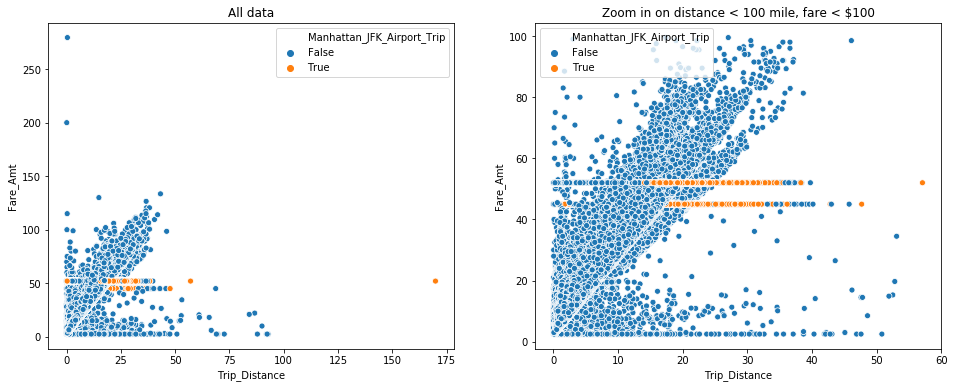

In [82]:
# scatter plot distance - fare
fig, axs = plt.subplots(1, 2, figsize=(16,6))
sns.scatterplot(data=gdf_sorted,x="Trip_Distance", y="Fare_Amt",ax=axs[0],hue="Manhattan_JFK_Airport_Trip")
axs[0].set_xlabel('Trip_Distance')
axs[0].set_ylabel('Fare_Amt')
axs[0].set_title('All data')

# zoom in on part of data
idx = (gdf_sorted.Trip_Distance < 60) & (gdf_sorted.Fare_Amt < 100)
sns.scatterplot(data=gdf_sorted,x=gdf_sorted[idx].Trip_Distance, y=gdf_sorted[idx].Fare_Amt,ax=axs[1],hue="Manhattan_JFK_Airport_Trip")
axs[1].set_xlabel('Trip_Distance')
axs[1].set_ylabel('Fare_Amt')
axs[1].set_title('Zoom in on distance < 100 mile, fare < $100');

#### What about the 2 Outlier Cases?
#### 1. Short Distances and High Fare Amount.
#### 2. Long Distances and Low Fare Amount.
#### Idea: Taxi Mileage= Initial Charge + Distance Charge + Time Charge
#### Initial Charge= 2.5 Dollars, Distance Charge= 50 Cents per 1/5 Miles , Time Charge= 50 Cents per 60 seconds in slow traffic or when the vehicle is stopped
#### ->Fares should be at least Formula: 2.5 Dollars+ 2.5 Dollars per Mile, but different Times means differen Fare Structure
#### -> Fares should be not too much higher or lower than Formula: 2.5 Dollars+ 2.5 Dollars per Mile 
#### For more Information go to [Taxi Fare](https://www1.nyc.gov/site/tlc/passengers/taxi-fare.page)
#### Need to find better Solution.....

#### Check those 2 Outliers in more Detail

In [83]:
# First create a Column with Duration of Ride
gdf_sorted['Ride_Duration'] = (gdf_sorted['Dropoff_DateTime'] - gdf_sorted['Pickup_DateTime'])
gdf_sorted['Ride_Duration_Minutes'] = (gdf_sorted['Dropoff_DateTime'] - gdf_sorted['Pickup_DateTime']).dt.total_seconds()/60

#### Short Distances with High Fare Amount

In [84]:
#2.Short Distances with High Fare Amount ( Fare Amount > 52 & Trip Distance <=9)
gdf_sorted.loc[(gdf_sorted["Fare_Amt"]>52) & (gdf_sorted["Trip_Distance"]<=9)]

Pickup_DateTime    Dropoff_DateTime  Passenger_Count  \
index                                                              
77305   2009-03-01 02:34:40 2009-03-01 02:35:16                4   
203026  2009-03-19 17:35:51 2009-03-19 17:36:30                1   
213969  2009-03-27 04:45:00 2009-03-27 04:46:00                1   
243864  2009-03-27 17:07:00 2009-03-27 17:54:00                1   
9634    2009-04-20 16:05:00 2009-04-20 17:03:00                1   
238860  2009-05-04 18:23:40 2009-05-04 18:25:31                2   
3467    2009-05-18 23:13:33 2009-05-18 23:13:49                1   
61645   2009-08-10 20:30:00 2009-08-10 20:40:00                1   
84937   2009-10-03 15:07:00 2009-10-03 15:09:00                1   
187552  2009-11-05 20:11:31 2009-11-05 20:14:03                1   
99921   2009-12-05 00:49:00 2009-12-05 01:04:00                1   
153102  2009-12-20 05:06:54 2009-12-20 05:08:27                1   
154144  2009-12-23 18:55:00 2009-12-23 18:56:00                1   
490167  2010-07-20 09:30:00 2010-07-20 10:30:00                1   
314584  2010-12-08 05:31:00 2010-12-08 05:56:00                2   
585197  2011-03-06 14:53:00 2011-03-06 15:35:00                2   
614442  2011-05-23 09:53:00 2011-05-23 10:35:00                1   
573151  2011-06-30 13:22:00 2011-06-30 13:56:00                1   
789395  2012-01-28 05:40:00 2012-01-28 06:09:00                1   
839349  2012-06-27 05:06:00 2012-06-27 05:35:00                1   
882212  2012-09-27 14:08:00 2012-09-27 15:03:00                1   
861549  2012-10-31 08:41:34 2012-10-31 10:15:36                1   
869252  2012-10-31 09:45:00 2012-10-31 11:28:00                1   
888835  2012-10-31 10:07:36 2012-10-31 12:03:58                3   
757202  2012-10-31 11:56:00 2012-10-31 13:56:00                5   
936267  2012-10-31 12:00:27 2012-10-31 13:43:35                1   
1137570 2013-02-03 21:11:00 2013-02-03 21:45:00                1   
1115259 2013-05-06 14:00:00 2013-05-06 14:45:00                1   
1060228 2013-05-16 17:56:00 2013-05-16 18:48:00                1   
1140346 2013-05-17 15:40:23 2013-05-17 16:52:30                1   
1051672 2013-06-21 12:32:00 2013-06-21 14:27:00                2   
1048408 2013-07-04 11:13:00 2013-07-04 11:49:00                1   
1103179 2013-08-06 15:20:00 2013-08-06 15:54:00                1   
1026836 2013-10-06 16:31:00 2013-10-06 17:20:00                2   
1083959 2013-10-26 18:52:00 2013-10-26 20:17:00                1   
1483147 2014-01-21 15:10:00 2014-01-21 17:43:00                2   
1481344 2014-01-23 16:20:00 2014-01-23 17:57:00                6   
1480487 2014-02-01 18:58:00 2014-02-01 20:30:00                1   
1453326 2014-02-19 11:19:00 2014-02-19 13:12:00                5   
1358051 2014-10-13 00:38:54 2014-10-13 09:52:55                2   
1409049 2014-11-25 20:13:00 2014-11-25 21:54:00                1   
1742091 2015-06-25 11:54:50 2015-06-25 13:36:10                1   
1631116 2015-09-30 10:58:28 2015-09-30 12:27:58                2   
1618426 2015-12-02 12:09:41 2015-12-02 13:40:56                1   
1866700 2016-03-17 08:07:39 2016-03-17 10:13:03                1   
1838226 2016-04-19 10:07:11 2016-04-19 11:44:04                1   
1857464 2016-04-24 18:16:23 2016-04-24 19:52:33                2   
1768502 2016-05-13 16:36:40 2016-05-13 18:26:35                1   
1877321 2016-05-15 17:17:12 2016-05-15 18:49:17                5   

         Trip_Distance  Pickup_Lon  Pickup_Lat  RateCodeID   Fare_Amt  \
index                                                                   
77305         0.099976  -74.004051   40.753395           0   70.00000   
203026        0.199951  -73.983757   40.769558           0   65.00000   
213969        0.170044  -73.989143   40.745270           0   60.00000   
243864        1.820312  -73.990326   40.744091           3   60.31250   
9634          3.320312  -73.780441   40.645313           0   70.87500   
238860        0.700195  -74.0009

#### Observation:
#### 1. Most of the Rides have the RateCodeID=1

In [85]:
#Check how many Percent has RateCodeID=5 and so on
High_Fare_Amt_Short_Distance=gdf_sorted.loc[(gdf_sorted["Fare_Amt"]>52) & (gdf_sorted["Trip_Distance"]<=9)]
print(str(len(High_Fare_Amt_Short_Distance.loc[High_Fare_Amt_Short_Distance["RateCodeID"]==5])/len(High_Fare_Amt_Short_Distance)*100) + " "+ "Percent"+ " "+ "are RateCodeID 5")
print(str(len(High_Fare_Amt_Short_Distance.loc[High_Fare_Amt_Short_Distance["RateCodeID"]==1])/len(High_Fare_Amt_Short_Distance)*100) + " "+ "Percent"+ " "+ "are RateCodeID 1")
print(str(len(High_Fare_Amt_Short_Distance.loc[High_Fare_Amt_Short_Distance["RateCodeID"]==0])/len(High_Fare_Amt_Short_Distance)*100) + " "+ "Percent"+ " "+ "are RateCodeID 0")
print(str(len(High_Fare_Amt_Short_Distance.loc[High_Fare_Amt_Short_Distance["RateCodeID"]==3])/len(High_Fare_Amt_Short_Distance)*100) + " "+ "Percent"+ " "+ "are RateCodeID 3")

0.0 Percent are RateCodeID 5
53.06122448979592 Percent are RateCodeID 1
24.489795918367346 Percent are RateCodeID 0
22.448979591836736 Percent are RateCodeID 3


In [86]:
# Look into Dataframe with RateCodeID=1
High_Fare_Amt_Short_Distance.loc[High_Fare_Amt_Short_Distance["RateCodeID"]==1]

Pickup_DateTime    Dropoff_DateTime  Passenger_Count  \
index                                                              
882212  2012-09-27 14:08:00 2012-09-27 15:03:00                1   
861549  2012-10-31 08:41:34 2012-10-31 10:15:36                1   
869252  2012-10-31 09:45:00 2012-10-31 11:28:00                1   
888835  2012-10-31 10:07:36 2012-10-31 12:03:58                3   
757202  2012-10-31 11:56:00 2012-10-31 13:56:00                5   
936267  2012-10-31 12:00:27 2012-10-31 13:43:35                1   
1137570 2013-02-03 21:11:00 2013-02-03 21:45:00                1   
1115259 2013-05-06 14:00:00 2013-05-06 14:45:00                1   
1051672 2013-06-21 12:32:00 2013-06-21 14:27:00                2   
1048408 2013-07-04 11:13:00 2013-07-04 11:49:00                1   
1103179 2013-08-06 15:20:00 2013-08-06 15:54:00                1   
1083959 2013-10-26 18:52:00 2013-10-26 20:17:00                1   
1483147 2014-01-21 15:10:00 2014-01-21 17:43:00                2   
1481344 2014-01-23 16:20:00 2014-01-23 17:57:00                6   
1480487 2014-02-01 18:58:00 2014-02-01 20:30:00                1   
1453326 2014-02-19 11:19:00 2014-02-19 13:12:00                5   
1358051 2014-10-13 00:38:54 2014-10-13 09:52:55                2   
1409049 2014-11-25 20:13:00 2014-11-25 21:54:00                1   
1742091 2015-06-25 11:54:50 2015-06-25 13:36:10                1   
1631116 2015-09-30 10:58:28 2015-09-30 12:27:58                2   
1618426 2015-12-02 12:09:41 2015-12-02 13:40:56                1   
1866700 2016-03-17 08:07:39 2016-03-17 10:13:03                1   
1838226 2016-04-19 10:07:11 2016-04-19 11:44:04                1   
1857464 2016-04-24 18:16:23 2016-04-24 19:52:33                2   
1768502 2016-05-13 16:36:40 2016-05-13 18:26:35                1   
1877321 2016-05-15 17:17:12 2016-05-15 18:49:17                5   

         Trip_Distance  Pickup_Lon  Pickup_Lat  RateCodeID  Fare_Amt  \
index                                                                  
882212        1.940430  -73.776855   40.645363           1      60.0   
861549        6.300781  -73.885269   40.744137           1      53.0   
869252        5.628906  -73.918900   40.743374           1      56.5   
888835        2.599609  -73.855171   40.727703           1      60.5   
757202        6.730469  -73.888458   40.755257           1      66.0   
936267        3.000000  -73.990807   40.751022           1      55.0   
1137570       1.950195  -73.781776   40.644798           1      54.0   
1115259       1.870117  -73.982849   40.738667           1      55.0   
1051672       7.468750  -74.010460   40.711449           1      67.0   
1048408       2.419922  -73.789719   40.643826           1      64.5   
1103179       1.919922  -73.776855   40.645931           1      52.5   
1083959       8.250000  -73.874489   40.774048           1      52.5   
1483147       4.109375  -73.988258   40.743225           1      80.0   
1481344       6.949219  -73.994438   40.750988           1      53.5   
1480487       8.796875  -73.980637   40.774925           1      59.0   
1453326       5.960938  -73.979118   40.761745           1      60.5   
1358051       0.399902  -73.815666   40.747158           1     279.5   
1409049       6.488281  -74.009964   40.720825           1      59.0   
1742091       7.800781  -73.978889   40.750313           1      62.0   
1631116       8.937500  -73.874481   40.774101           1      53.5   
1618426       6.949219  -73.898277   40.753441           1      55.5   
1866700       1.500000  -73.850731   40.730324           1      66.5   
1838226       7.480469  -73.981323   40.764839           1      55.0   
1857464       1.700195  -73.822037   40.666092           1      88.5   
1768502       7.898438  -73.982338   40.774536           1      62.5   
1877321       8.718750  -73.863716   40.770012           1      57.5   

                                      geometry_pickup  \
index                            

#### Observation:
#### 1. Most Trips have high Trip_Duration
#### 2. Longer Distances doesn't always mean higher Trip_Duration
#### 3. Sometimes even though the Trip_Distance is shorter, it takes longer than a longer Trip_Distance
#### 4. Sometimes a shorter Trip_Distance has more Fare_Amount, because his Trip_Duration is longer
#### 5. Sometimes a shorter Trip_Distance has more Fare_Amount, because his Trip_Duration is shorter -> More Traffic

In [87]:
#1. Plot on Map to see where does these Trips happen
High_Fare_Amt_Short_Distance=gdf_sorted.loc[(gdf_sorted["Fare_Amt"]>52) & (gdf_sorted["Trip_Distance"]<=10)]

High_Fare_Amt_Short_Distance_Pickup=High_Fare_Amt_Short_Distance[['Pickup_Lat','Pickup_Lon']]
High_Fare_Amt_Short_Distance_Dropoff=High_Fare_Amt_Short_Distance[['Dropoff_Lat','Dropoff_Lon']]

In [88]:
########################Lat,Lon#################################
m_High_Fare_Amt_Short_Distance = folium.Map(location=[40.730610, -73.935242])

for row in High_Fare_Amt_Short_Distance_Pickup.itertuples(index=False):

    folium.CircleMarker(
        location=[row[0],row[1]],
        radius=1,
        color="green",
        fill=True,
        fill_opacity=0.5
    ).add_to(m_High_Fare_Amt_Short_Distance)
    
for row in High_Fare_Amt_Short_Distance_Dropoff.itertuples(index=False):

    folium.CircleMarker(
        location=[row[0],row[1]],
        radius=1,
        color="red",
        fill=True,
        fill_opacity=0.5
    ).add_to(m_High_Fare_Amt_Short_Distance)

In [89]:
m_High_Fare_Amt_Short_Distance

#### Observation:
#### 1.Most of the Short Distances with High Fare Amount are in Area of Lower and Midtown Manhattan
#### 2. But also at the Airports are a high Density of Pickups and Dropoffs
#### 3. There are more Dropoffs than Pickups in Brooklyn
#### 4. There are Dropoffs mostly in Newark Airport

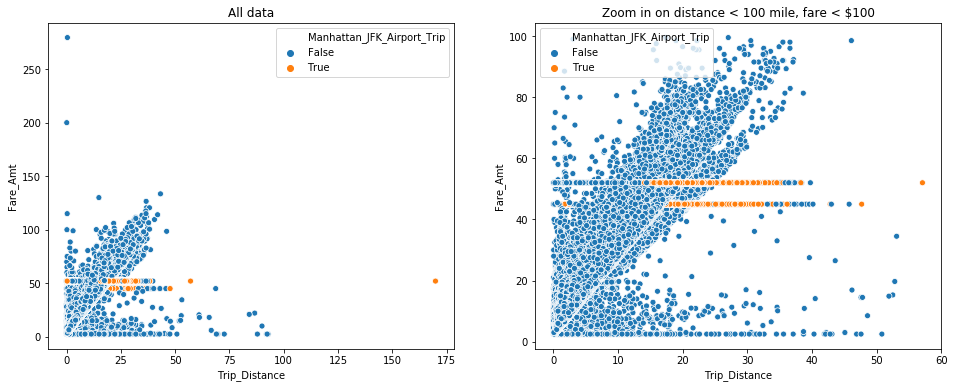

In [90]:
# scgdf_sortedr plot distance - fare
fig, axs = plt.subplots(1, 2, figsize=(16,6))
sns.scatterplot(data=gdf_sorted,x="Trip_Distance", y="Fare_Amt",ax=axs[0],hue="Manhattan_JFK_Airport_Trip")
axs[0].set_xlabel('Trip_Distance')
axs[0].set_ylabel('Fare_Amt')
axs[0].set_title('All data')

# zoom in on part of data
idx = (gdf_sorted.Trip_Distance < 60) & (gdf_sorted.Fare_Amt < 100)
sns.scatterplot(data=gdf_sorted,x=gdf_sorted[idx].Trip_Distance, y=gdf_sorted[idx].Fare_Amt,ax=axs[1],hue="Manhattan_JFK_Airport_Trip")
axs[1].set_xlabel('Trip_Distance')
axs[1].set_ylabel('Fare_Amt')
axs[1].set_title('Zoom in on distance < 100 mile, fare < $100');

#### Long Distances with small Fare Amount

In [91]:
#1.Long Distances with low Fare Amount ( Fare Amount < 40 & Trip Distance >= 20)
gdf_sorted.loc[(gdf_sorted["Fare_Amt"]<45) & (gdf_sorted["Trip_Distance"]>=20)]

Pickup_DateTime    Dropoff_DateTime  Passenger_Count  \
index                                                              
190909  2009-01-06 22:34:17 2009-01-06 22:54:04                1   
153245  2009-01-14 19:45:00 2009-01-14 20:15:00                1   
1977    2009-01-20 18:05:00 2009-01-20 18:37:00                1   
237798  2009-01-30 15:30:50 2009-01-30 15:55:58                1   
207589  2009-02-17 15:25:00 2009-02-17 15:52:00                4   
213999  2009-02-19 23:20:11 2009-02-19 23:49:57                1   
158272  2009-02-27 22:44:00 2009-02-27 23:17:00                2   
125109  2009-03-05 22:11:00 2009-03-05 22:39:00                1   
230233  2009-03-08 12:47:27 2009-03-08 13:08:20                1   
111908  2009-03-13 18:20:38 2009-03-13 20:03:12                2   
43605   2009-03-22 03:24:13 2009-03-22 04:46:59                1   
14779   2009-03-29 21:38:00 2009-03-29 22:14:00                1   
61656   2009-04-01 19:34:00 2009-04-01 20:14:00                1   
103378  2009-04-08 23:35:00 2009-04-09 00:00:00                1   
132459  2009-04-15 23:30:03 2009-04-16 00:03:50                1   
195724  2009-04-18 22:55:21 2009-04-18 23:24:29                1   
197348  2009-04-29 16:33:34 2009-04-29 16:54:18                1   
88130   2009-05-14 20:41:49 2009-05-14 21:10:36                1   
207752  2009-05-24 15:36:20 2009-05-24 15:52:57                1   
81613   2009-05-29 23:34:00 2009-05-30 00:00:00                1   
240571  2009-06-14 05:32:05 2009-06-14 06:22:42                1   
53862   2009-06-26 22:43:00 2009-06-26 23:09:00                1   
237689  2009-07-09 15:39:50 2009-07-09 16:45:10                1   
93171   2009-07-15 21:14:39 2009-07-15 21:46:31                1   
75531   2009-07-26 08:13:00 2009-07-26 08:38:00                1   
82229   2009-07-28 19:58:00 2009-07-28 20:26:00                5   
232594  2009-08-07 10:18:42 2009-08-07 10:52:27                1   
68248   2009-08-16 07:52:16 2009-08-16 09:34:21                1   
95243   2009-08-22 12:52:48 2009-08-22 13:23:27                1   
91445   2009-08-23 15:10:00 2009-08-23 15:48:00                5   
...                     ...                 ...              ...   
1136895 2013-01-04 22:34:28 2013-01-04 22:48:06                1   
1072783 2013-01-08 10:33:18 2013-01-08 10:45:40                1   
1027012 2013-01-22 11:06:25 2013-01-22 11:43:32                1   
1190276 2013-01-25 15:23:48 2013-01-25 15:37:15                1   
1195956 2013-02-18 18:35:12 2013-02-18 19:59:29                1   
1228992 2013-02-18 20:52:08 2013-02-18 21:00:55                1   
1160858 2013-02-20 12:20:03 2013-02-20 12:43:12                1   
1110389 2013-02-23 01:48:15 2013-02-23 01:51:50                1   
1008087 2013-03-15 18:35:40 2013-03-15 18:47:44                1   
1187232 2013-03-16 15:02:56 2013-03-16 15:19:54                1   
1177450 2013-04-13 16:14:54 2013-04-13 17:01:59                1   
1014049 2013-05-02 00:43:29 2013-05-02 01:02:57                1   
1084721 2013-05-02 22:31:42 2013-05-02 22:43:19                1   
1209712 2013-05-10 18:24:37 2013-05-10 18:34:24                2   
1078033 2013-05-13 23:07:47 2013-05-13 23:14:49                1   
1009494 2013-05-15 00:13:47 2013-05-15 00:20:58                1   
1224847 2013-05-19 17:30:19 2013-05-19 18:06:38                3   
1438693 2014-01-25 20:26:05 2014-01-25 20:41:38                4   
1409458 2014-02-09 15:18:16 2014-02-09 15:44:44                1   
1484642 2014-03-23 13:26:43 2014-03-23 13:46:03                1   
1416352 2014-06-10 13:38:09 2014-06-10 14:04:28                1   
1486674 2014-07-14 02:55:20 2014-07-14 02:56:45                1   
1477947 2014-12-17 03:15:27 2014-12-17 03:41:58                1   
1504438 2015-07-21 16:25:04 2015-07-21 18:45:05                1   
1665053 2015-10-18 21:51:06 2015-10-18 22:07:30                1   
1816490 2016-01-05 14:33:16 2016-01-05 14:33:23                1   


#### Observation:
#### 1. Most of the Trips have the RateCodeID=1
#### 2. Some Trips just have the Initial Charge of 2.5 Dollars even though they have a Trip Distance and a Time Duration
#### 3. 

In [92]:
# Look into Dataframe with Fare Amount 2.5 Dollars
Small_Fare_Amt_High_Distance=gdf_sorted.loc[(gdf_sorted["Fare_Amt"]<45) & (gdf_sorted["Trip_Distance"]>=20)]
Small_Fare_Amt_High_Distance.loc[Small_Fare_Amt_High_Distance["Fare_Amt"]==2.5]

Pickup_DateTime    Dropoff_DateTime  Passenger_Count  \
index                                                              
237798  2009-01-30 15:30:50 2009-01-30 15:55:58                1   
230233  2009-03-08 12:47:27 2009-03-08 13:08:20                1   
132459  2009-04-15 23:30:03 2009-04-16 00:03:50                1   
195724  2009-04-18 22:55:21 2009-04-18 23:24:29                1   
197348  2009-04-29 16:33:34 2009-04-29 16:54:18                1   
207752  2009-05-24 15:36:20 2009-05-24 15:52:57                1   
240571  2009-06-14 05:32:05 2009-06-14 06:22:42                1   
237689  2009-07-09 15:39:50 2009-07-09 16:45:10                1   
68248   2009-08-16 07:52:16 2009-08-16 09:34:21                1   
368164  2010-01-02 18:24:11 2010-01-02 18:24:29                1   
440185  2010-04-30 18:16:02 2010-04-30 19:17:21                1   
395105  2010-11-02 10:38:10 2010-11-02 11:02:44                1   
383472  2010-12-06 18:32:03 2010-12-06 19:14:15                1   
578672  2011-01-27 04:05:47 2011-01-27 04:21:29                1   
548826  2011-02-15 17:58:47 2011-02-15 18:51:40                1   
694012  2011-03-10 09:26:58 2011-03-10 09:58:06                1   
731852  2011-04-11 09:53:59 2011-04-11 10:23:28                1   
622936  2011-05-03 22:45:28 2011-05-03 23:07:51                1   
614509  2011-06-22 09:37:50 2011-06-22 10:35:58                1   
609758  2011-09-18 03:13:42 2011-09-18 03:25:26                1   
539445  2011-09-18 21:40:35 2011-09-18 22:12:04                1   
724790  2011-11-02 15:19:41 2011-11-02 16:44:16                1   
864996  2012-04-03 16:55:41 2012-04-03 17:20:37                1   
782576  2012-04-03 19:21:11 2012-04-03 19:55:35                1   
866637  2012-06-09 01:50:42 2012-06-09 03:28:13                1   
817246  2012-06-15 21:12:11 2012-06-15 21:29:29                1   
865585  2012-07-04 22:17:41 2012-07-04 22:34:28                1   
959956  2012-08-13 19:42:33 2012-08-13 20:35:05                1   
929287  2012-08-30 07:59:27 2012-08-30 08:50:22                1   
907881  2012-10-10 14:07:50 2012-10-10 14:34:07                1   
944200  2012-10-15 09:00:48 2012-10-15 09:29:02                1   
863239  2012-10-24 18:29:15 2012-10-24 19:04:50                1   
944708  2012-12-18 22:29:42 2012-12-18 22:52:17                1   
1027289 2013-01-03 15:12:56 2013-01-03 15:44:46                1   
1163874 2013-01-03 16:33:05 2013-01-03 16:54:22                1   
1054525 2013-01-04 09:36:51 2013-01-04 09:54:06                1   
1136895 2013-01-04 22:34:28 2013-01-04 22:48:06                1   
1195956 2013-02-18 18:35:12 2013-02-18 19:59:29                1   
1160858 2013-02-20 12:20:03 2013-02-20 12:43:12                1   
1438693 2014-01-25 20:26:05 2014-01-25 20:41:38                4   
1409458 2014-02-09 15:18:16 2014-02-09 15:44:44                1   
1484642 2014-03-23 13:26:43 2014-03-23 13:46:03                1   
1477947 2014-12-17 03:15:27 2014-12-17 03:41:58                1   
1665053 2015-10-18 21:51:06 2015-10-18 22:07:30                1   
1816490 2016-01-05 14:33:16 2016-01-05 14:33:23                1   
1920337 2016-02-15 13:31:13 2016-02-15 13:52:29                3   
1769023 2016-03-11 09:59:57 2016-03-11 10:00:59                1   

         Trip_Distance  Pickup_Lon  Pickup_Lat  RateCodeID  Fare_Amt  \
index                                                                  
237798       31.093750  -73.870628   40.773792           1       2.5   
230233       29.406250  -74.008606   40.719391           0       2.5   
132459       25.593750  -73.988480   40.721176           0       2.5   
195724       37.093750  -73.995354   40.721336           0       2.5   
197348       43.093750  -73.982719   40.766754           0       2.5   
207752       27.406250  -73.972122   40.765778           0       2.5   
240571       24.906250  -74.006073   40.740105           0       2.5   
237689       22.406250  -73.973

#### Observation:
#### 1. Even though the Trip has a Trip_Distance and a Trip_Duration the Fare Amount is just the 2.5 Dollars=initial Charge

In [93]:
print(str(len(gdf_sorted.loc[gdf_sorted["Fare_Amt"]==2.5])/len(gdf_sorted)*100) + " "+ "Percent"+ " "+ "have 2.5 Dollar as Fare_Amount")

0.12879059473805882 Percent have 2.5 Dollar as Fare_Amount


#### Dropping Rows with Fare_Amt=2.5, because they don't make Sense

In [94]:
indexNames = gdf_sorted.loc[gdf_sorted["Fare_Amt"]==2.5].index
gdf_sorted.drop(indexNames , inplace=True)

In [95]:
#Check how many Percent has RateCodeID=5 and so on
Small_Fare_Amt_High_Distance=gdf_sorted.loc[(gdf_sorted["Fare_Amt"]<45) & (gdf_sorted["Trip_Distance"]>=20)]
print(str(len(Small_Fare_Amt_High_Distance.loc[Small_Fare_Amt_High_Distance["RateCodeID"]==5])/len(Small_Fare_Amt_High_Distance)*100) + " "+ "Percent"+ " "+ "are RateCodeID 5")
print(str(len(Small_Fare_Amt_High_Distance.loc[Small_Fare_Amt_High_Distance["RateCodeID"]==1])/len(Small_Fare_Amt_High_Distance)*100) + " "+ "Percent"+ " "+ "are RateCodeID 1")
print(str(len(Small_Fare_Amt_High_Distance.loc[Small_Fare_Amt_High_Distance["RateCodeID"]==0])/len(Small_Fare_Amt_High_Distance)*100) + " "+ "Percent"+ " "+ "are RateCodeID 0")
print(str(len(Small_Fare_Amt_High_Distance.loc[Small_Fare_Amt_High_Distance["RateCodeID"]==3])/len(Small_Fare_Amt_High_Distance)*100) + " "+ "Percent"+ " "+ "are RateCodeID 3")
print(str(len(Small_Fare_Amt_High_Distance.loc[Small_Fare_Amt_High_Distance["RateCodeID"]==6])/len(Small_Fare_Amt_High_Distance)*100) + " "+ "Percent"+ " "+ "are RateCodeID 6")

0.0 Percent are RateCodeID 5
83.33333333333334 Percent are RateCodeID 1
16.666666666666664 Percent are RateCodeID 0
0.0 Percent are RateCodeID 3
0.0 Percent are RateCodeID 6


#### Looking into Dataframe with RateCodeID 1 and Small Fare with High Distance Trip

In [96]:
Small_Fare_Amt_High_Distance.loc[Small_Fare_Amt_High_Distance["RateCodeID"]==1]

Pickup_DateTime    Dropoff_DateTime  Passenger_Count  \
index                                                              
81613   2009-05-29 23:34:00 2009-05-30 00:00:00                1   
442550  2010-01-09 23:28:00 2010-01-09 23:58:00                1   
323932  2010-01-16 20:43:25 2010-01-16 21:13:22                1   
463782  2010-01-23 01:20:23 2010-01-23 01:51:20                1   
378523  2010-01-23 11:55:29 2010-01-23 12:27:35                1   
452608  2010-02-07 18:34:42 2010-02-07 19:06:41                1   
358217  2010-02-11 02:27:00 2010-02-11 02:55:00                5   
494910  2010-02-14 18:44:00 2010-02-14 19:24:00                1   
327842  2010-02-18 08:06:00 2010-02-18 08:41:00                1   
427874  2010-02-18 17:32:22 2010-02-18 18:07:22                1   
278838  2010-03-29 19:46:16 2010-03-29 20:14:32                1   
321058  2010-04-05 18:44:16 2010-04-05 19:25:19                2   
378930  2010-04-09 13:31:00 2010-04-09 14:06:35                1   
394700  2010-04-09 20:27:00 2010-04-09 20:57:00                2   
253871  2010-04-27 19:49:24 2010-04-27 19:56:31                2   
333478  2010-05-16 13:11:37 2010-05-16 13:45:00                1   
326237  2010-05-21 04:52:00 2010-05-21 05:19:00                2   
459856  2010-05-27 23:19:00 2010-05-27 23:49:00                2   
336506  2010-06-14 00:55:00 2010-06-14 01:21:00                2   
316444  2010-06-24 05:41:00 2010-06-24 06:09:00                1   
345152  2010-07-04 18:02:00 2010-07-04 18:34:00                2   
380828  2010-07-09 21:03:19 2010-07-09 21:34:32                1   
308333  2010-07-12 00:48:00 2010-07-12 01:20:00                2   
397559  2010-07-22 19:39:00 2010-07-22 20:19:00                2   
298451  2010-08-03 21:13:00 2010-08-03 21:40:00                5   
364358  2010-08-13 19:02:24 2010-08-13 19:21:54                1   
390710  2010-08-16 19:16:00 2010-08-16 19:58:00                5   
368452  2010-08-18 02:33:01 2010-08-18 02:41:13                1   
371407  2010-08-23 02:58:10 2010-08-23 03:21:15                1   
400499  2010-09-06 01:35:52 2010-09-06 01:44:55                1   
...                     ...                 ...              ...   
787881  2012-07-16 10:49:29 2012-07-16 10:55:15                1   
754427  2012-07-31 19:36:29 2012-07-31 20:02:08                1   
913136  2012-08-03 04:19:29 2012-08-03 04:46:32                1   
940740  2012-08-17 12:51:15 2012-08-17 13:21:51                1   
816892  2012-08-28 02:26:56 2012-08-28 02:54:18                1   
843828  2012-09-16 19:59:50 2012-09-16 20:17:57                2   
971359  2012-09-21 17:52:58 2012-09-21 18:03:36                1   
848131  2012-10-03 20:06:31 2012-10-03 20:47:41                1   
785362  2012-10-27 06:06:07 2012-10-27 06:35:48                1   
824871  2012-11-07 00:07:43 2012-11-07 00:18:09                1   
878782  2012-11-27 12:36:56 2012-11-27 13:02:38                1   
1072783 2013-01-08 10:33:18 2013-01-08 10:45:40                1   
1027012 2013-01-22 11:06:25 2013-01-22 11:43:32                1   
1190276 2013-01-25 15:23:48 2013-01-25 15:37:15                1   
1228992 2013-02-18 20:52:08 2013-02-18 21:00:55                1   
1110389 2013-02-23 01:48:15 2013-02-23 01:51:50                1   
1008087 2013-03-15 18:35:40 2013-03-15 18:47:44                1   
1187232 2013-03-16 15:02:56 2013-03-16 15:19:54                1   
1177450 2013-04-13 16:14:54 2013-04-13 17:01:59                1   
1014049 2013-05-02 00:43:29 2013-05-02 01:02:57                1   
1084721 2013-05-02 22:31:42 2013-05-02 22:43:19                1   
1209712 2013-05-10 18:24:37 2013-05-10 18:34:24                2   
1078033 2013-05-13 23:07:47 2013-05-13 23:14:49                1   
1009494 2013-05-15 00:13:47 2013-05-15 00:20:58                1   
1224847 2013-05-19 17:30:19 2013-05-19 18:06:38                3   
1416352 2014-06-10 13:38:09 2014-06-10 14:04:28                1   


In [97]:
#1. Plot on Map to see where does these Trips happen
Small_Fare_Amt_High_Distance=gdf_sorted.loc[(gdf_sorted["Fare_Amt"]<45) & (gdf_sorted["Trip_Distance"]>=20)]

Small_Fare_Amt_High_Distance_Pickup=Small_Fare_Amt_High_Distance[['Pickup_Lat','Pickup_Lon']]
Small_Fare_Amt_High_Distance_Dropoff=Small_Fare_Amt_High_Distance[['Dropoff_Lat','Dropoff_Lon']]

In [98]:
########################Lat,Lon#################################
Small_Fare_Amt_High_Distance = folium.Map(location=[40.730610, -73.935242])

for row in Small_Fare_Amt_High_Distance_Pickup.itertuples(index=False):

    folium.CircleMarker(
        location=[row[0],row[1]],
        radius=1,
        color="green",
        fill=True,
        fill_opacity=0.5
    ).add_to(Small_Fare_Amt_High_Distance)
    
for row in Small_Fare_Amt_High_Distance_Dropoff.itertuples(index=False):

    folium.CircleMarker(
        location=[row[0],row[1]],
        radius=1,
        color="red",
        fill=True,
        fill_opacity=0.5
    ).add_to(Small_Fare_Amt_High_Distance)

In [99]:
Small_Fare_Amt_High_Distance

#### Observation:
#### 1.Most of the Long Distances with Small Fare Amount are in Area of Lower and Midtown Manhattan
#### 2. But also at the Airports are a high Density of Pickups and Dropoffs
#### 3. There are more Dropoffs than Pickups in Brooklyn

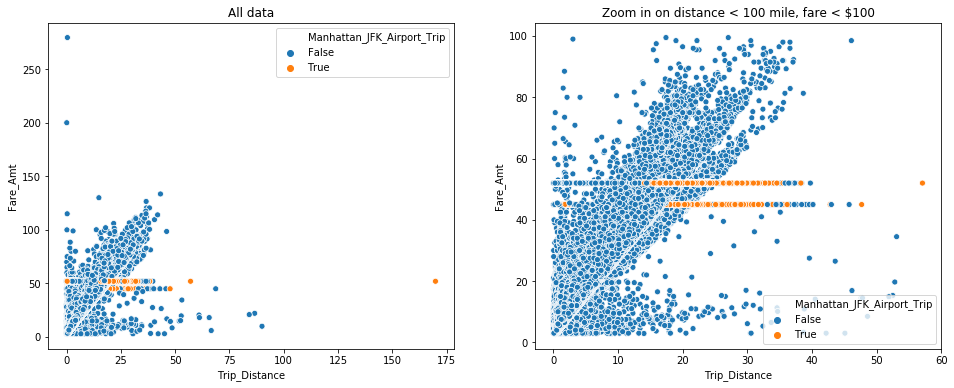

In [100]:
# scatter plot distance - fare
fig, axs = plt.subplots(1, 2, figsize=(16,6))
sns.scatterplot(data=gdf_sorted,x="Trip_Distance", y="Fare_Amt",ax=axs[0],hue="Manhattan_JFK_Airport_Trip")
axs[0].set_xlabel('Trip_Distance')
axs[0].set_ylabel('Fare_Amt')
axs[0].set_title('All data')

# zoom in on part of data
idx = (gdf_sorted.Trip_Distance < 60) & (gdf_sorted.Fare_Amt < 100)
sns.scatterplot(data=gdf_sorted,x=gdf_sorted[idx].Trip_Distance, y=gdf_sorted[idx].Fare_Amt,ax=axs[1],hue="Manhattan_JFK_Airport_Trip")
axs[1].set_xlabel('Trip_Distance')
axs[1].set_ylabel('Fare_Amt')
axs[1].set_title('Zoom in on distance < 100 mile, fare < $100');

### How many Datapoints remain?

In [101]:
print(str(len(gdf_sorted)/2000000*100) + " " + "%")

95.69105 %


### How many Datapoints are too small?

In [102]:
# First Step Calculate Fare Amount (Initial Charge + Distance Charge)
gdf_sorted["Calculated_Fare_Amt"]=0.0
gdf_sorted["Calculated_Fare_Amt"]=2.5+2.5*gdf_sorted["Trip_Distance"]

In [103]:
print(str(len(gdf_sorted.loc[(gdf_sorted["Fare_Amt"]<gdf_sorted["Calculated_Fare_Amt"]) & (gdf_sorted["Manhattan_JFK_Airport_Trip"]!=True)])/len(gdf_sorted)*100)+ " " +"% Datapoints are too small")

16.50828369006297 % Datapoints are too small


In [104]:
# Create Column Original_Fare_Is_smaller
gdf_sorted["Original_Fare_Is_smaller"]=False
gdf_sorted.loc[(gdf_sorted["Fare_Amt"]<gdf_sorted["Calculated_Fare_Amt"]) & (gdf_sorted["Manhattan_JFK_Airport_Trip"]!=True),['Original_Fare_Is_smaller']] = True

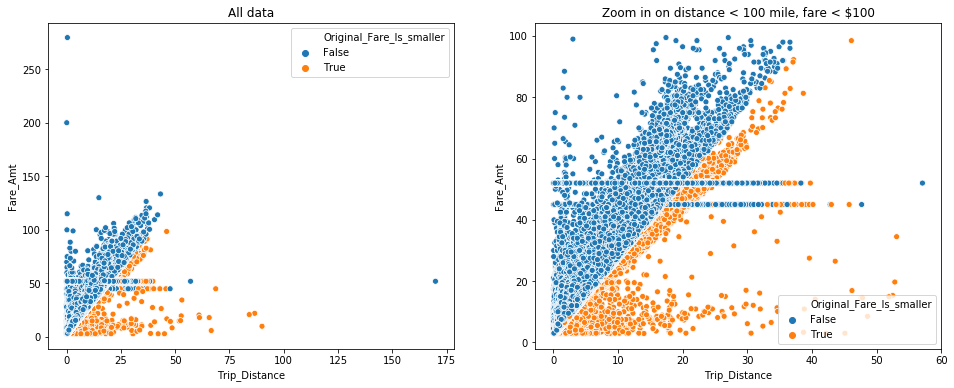

In [105]:
# scatter plot distance - fare
fig, axs = plt.subplots(1, 2, figsize=(16,6))
sns.scatterplot(data=gdf_sorted,x="Trip_Distance", y="Fare_Amt",ax=axs[0],hue="Original_Fare_Is_smaller")
axs[0].set_xlabel('Trip_Distance')
axs[0].set_ylabel('Fare_Amt')
axs[0].set_title('All data')

# zoom in on part of data
idx = (gdf_sorted.Trip_Distance < 60) & (gdf_sorted.Fare_Amt < 100)
sns.scatterplot(data=gdf_sorted,x=gdf_sorted[idx].Trip_Distance, y=gdf_sorted[idx].Fare_Amt,ax=axs[1],hue="Original_Fare_Is_smaller")
axs[1].set_xlabel('Trip_Distance')
axs[1].set_ylabel('Fare_Amt')
axs[1].set_title('Zoom in on distance < 100 mile, fare < $100');

#### Ideas: Keep those Outliers first, because we can replace them later with the minimum Fare to make the Prediction Model better

### How many Datapoints contains the RateCodeID 0? -> because after the Data Cleaning they must be RateCodeID 1

In [106]:
RateCodeID_equals_zero=gdf_sorted.loc[gdf_sorted["RateCodeID"]==0]
RateCodeID_equals_zero

Pickup_DateTime    Dropoff_DateTime  Passenger_Count  \
index                                                              
174760  2009-01-01 00:03:00 2009-01-01 00:48:52                1   
19777   2009-01-01 00:07:28 2009-01-01 00:14:39                1   
226174  2009-01-01 00:08:47 2009-01-01 00:13:09                4   
248219  2009-01-01 00:15:27 2009-01-01 00:30:49                2   
103803  2009-01-01 00:21:09 2009-01-01 00:30:51                4   
207250  2009-01-01 00:23:05 2009-01-01 00:28:22                1   
162670  2009-01-01 00:28:42 2009-01-01 00:35:20                1   
237228  2009-01-01 00:28:45 2009-01-01 00:39:25                1   
161338  2009-01-01 00:35:23 2009-01-01 01:05:33                1   
207658  2009-01-01 00:35:57 2009-01-01 00:44:02                1   
74556   2009-01-01 00:38:24 2009-01-01 00:50:25                1   
118615  2009-01-01 00:39:29 2009-01-01 00:49:21                3   
153895  2009-01-01 00:43:18 2009-01-01 00:45:33                2   
211752  2009-01-01 00:44:49 2009-01-01 00:59:29                2   
190377  2009-01-01 00:45:16 2009-01-01 00:53:25                1   
121966  2009-01-01 00:52:59 2009-01-01 01:01:48                2   
190100  2009-01-01 00:54:12 2009-01-01 00:59:56                4   
187482  2009-01-01 00:56:44 2009-01-01 00:59:21                1   
60298   2009-01-01 00:57:50 2009-01-01 01:02:28                2   
165128  2009-01-01 01:00:43 2009-01-01 01:09:48                1   
129977  2009-01-01 01:01:55 2009-01-01 01:07:38                1   
234614  2009-01-01 01:07:55 2009-01-01 01:30:14                1   
208668  2009-01-01 01:09:17 2009-01-01 01:38:52                1   
245448  2009-01-01 01:10:53 2009-01-01 01:16:07                2   
199470  2009-01-01 01:12:18 2009-01-01 01:33:03                1   
31735   2009-01-01 01:12:40 2009-01-01 01:16:00                1   
75084   2009-01-01 01:14:12 2009-01-01 01:28:29                1   
56957   2009-01-01 01:17:09 2009-01-01 01:32:12                3   
155098  2009-01-01 01:21:08 2009-01-01 01:28:37                1   
229870  2009-01-01 01:21:57 2009-01-01 01:46:50                1   
...                     ...                 ...              ...   
1051254 2013-06-07 03:46:18 2013-06-07 04:07:23                2   
1188868 2013-06-13 03:53:23 2013-06-13 04:01:28                1   
1174546 2013-06-21 18:26:11 2013-06-21 18:48:46                1   
1085816 2013-06-21 18:55:37 2013-06-21 19:05:01                1   
1024070 2013-06-21 19:26:20 2013-06-21 19:38:37                2   
1095023 2013-06-24 10:10:41 2013-06-24 10:17:39                1   
1117204 2013-06-26 13:37:09 2013-06-26 13:51:53                1   
1181620 2013-06-28 14:24:09 2013-06-28 14:36:44                1   
1196425 2013-06-28 14:50:59 2013-06-28 15:13:37                1   
1027720 2013-06-30 10:39:06 2013-06-30 10:43:00                1   
1214734 2013-07-06 10:06:33 2013-07-06 10:10:34                2   
1224381 2013-07-16 15:10:00 2013-07-16 15:13:34                1   
1235360 2013-12-03 13:16:18 2013-12-03 13:38:50                2   
1172347 2013-12-08 02:08:31 2013-12-08 02:35:41                1   
1097706 2013-12-08 14:53:49 2013-12-08 15:17:03                2   
1197984 2013-12-08 14:54:57 2013-12-08 15:26:04                3   
1164696 2013-12-08 15:11:18 2013-12-08 15:22:53                1   
1020166 2013-12-23 13:05:24 2013-12-23 13:22:49                1   
1237246 2013-12-23 13:12:30 2013-12-23 13:35:55                1   
1380053 2014-01-03 13:31:08 2014-01-03 13:38:08                1   
1260439 2014-02-02 00:11:37 2014-02-02 00:33:58                1   
1271162 2014-03-12 12:17:46 2014-03-12 12:30:21                1   
1293494 2014-06-02 15:46:35 2014-06-02 15:52:52                1   
1352140 2014-06-03 21:24:12 2014-06-03 21:44:07                3   
1409702 2014-06-14 01:16:03 2014-06-14 01:24:04                1   
1352239 2014-06-23 12:14:03 2014-06-23 12:53:53                1   


In [107]:
print(str(len(gdf_sorted.loc[(gdf_sorted["RateCodeID"]==0)])/len(gdf_sorted)*100)+ " " +"% have RateCodeID 0")

12.00702678045648 % have RateCodeID 0


#### Replace all RateCodeID=0 with RateCodeID=1

In [108]:
gdf_sorted.loc[(gdf_sorted["RateCodeID"]==0),["RateCodeID"]]=1

#### Proof that there is no RateCodeID equals Zero anymore

In [109]:
gdf_sorted.loc[gdf_sorted["RateCodeID"]==0]

Empty GeoDataFrame
Columns: [Pickup_DateTime, Dropoff_DateTime, Passenger_Count, Trip_Distance, Pickup_Lon, Pickup_Lat, RateCodeID, Fare_Amt, geometry_pickup, zone_pickup, borough_pickup, Dropoff_Lon, Dropoff_Lat, geometry_dropoff, zone_dropoff, borough_dropoff, Airport_Trip, Manhattan_JFK_Airport_Trip, Ride_Duration, Ride_Duration_Minutes, Calculated_Fare_Amt, Original_Fare_Is_smaller]
Index: []

### 2. Does the Number of Passengers affect the Fare?

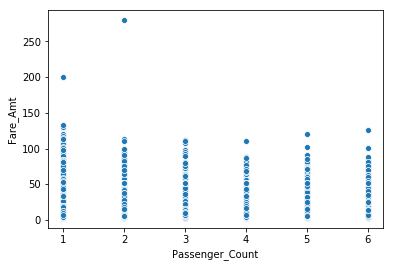

In [110]:
sns.scatterplot(data=gdf_sorted, x="Passenger_Count", y="Fare_Amt")

#### Observation:
#### 1. The most highest Fares are on 2 Passengers
#### 2. But have not real Correlation with Fares

### How many Fare Entries with Passenger Count?

In [111]:
print(str(len(gdf_sorted.loc[gdf_sorted["Passenger_Count"]==1])/len(gdf_sorted)*100) + " " + "% have 1 Passengers")
print(str(len(gdf_sorted.loc[gdf_sorted["Passenger_Count"]==2])/len(gdf_sorted)*100) + " " + "% have 2 Passengers")
print(str(len(gdf_sorted.loc[gdf_sorted["Passenger_Count"]==3])/len(gdf_sorted)*100) + " " + "% have 3 Passengers")
print(str(len(gdf_sorted.loc[gdf_sorted["Passenger_Count"]==4])/len(gdf_sorted)*100) + " " + "% have 4 Passengers")
print(str(len(gdf_sorted.loc[gdf_sorted["Passenger_Count"]==5])/len(gdf_sorted)*100) + " " + "% have 5 Passengers")
print(str(len(gdf_sorted.loc[gdf_sorted["Passenger_Count"]==6])/len(gdf_sorted)*100) + " " + "% have 6 Passengers")

69.63676331276541 % have 1 Passengers
14.789052894706453 % have 2 Passengers
4.364253501241757 % have 3 Passengers
2.1127890225888417 % have 4 Passengers
6.7213704938967656 % have 5 Passengers
2.375770774800778 % have 6 Passengers


### Which Passenger Count has the highest and lowest Fare Amount?

In [112]:
gdf_sorted.groupby('Passenger_Count')['Fare_Amt'].agg(['min', 'max'])

min    max
Passenger_Count                 
1                2.710938  200.0
2                2.900391  279.5
3                2.900391  112.5
4                2.900391  110.0
5                2.900391  120.5
6                2.900391  126.5

#### Observation
#### 1. Passenger 2 contains the highest Fare Amount of all Passenger Count
#### 2. Passenger 1 contains also the lowest Fare Amount of all Passenger Count

### What is the Average Fare Amount for Passenger Count?

In [113]:
gdf_sorted.groupby('Passenger_Count')['Fare_Amt'].agg(['mean', 'count'])

mean    count
Passenger_Count                    
1                11.233959  1332723
2                11.845308   283036
3                11.583996    83524
4                11.707339    40435
5                11.356701   128635
6                12.158272    45468

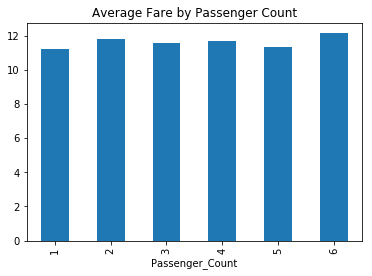

In [114]:
plt.title('Average Fare by Passenger Count')
df_avg_fare_pass=gdf_sorted.groupby('Passenger_Count')['Fare_Amt'].mean().plot.bar()

#### Observation
#### 1. 6 Passengers have the highest Average Fare Amount
#### 2. 1 Passenger has the lowest Average Fare Amount

### What about the Distribution of Fare Amount by Number of Passengers?

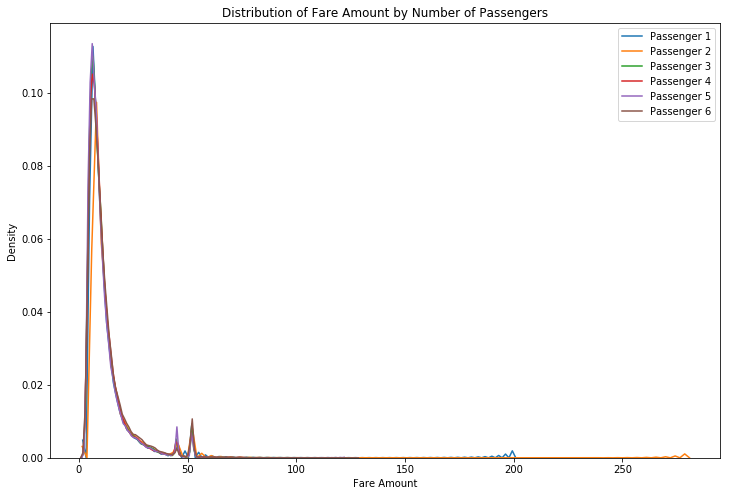

In [115]:
# Dataframe with sorted Passenger Count and Fare Amount
df_pass_fare=gdf_sorted[["Passenger_Count","Fare_Amt"]]
# Plotting Distribution of Fare Amount by Number of Passengers
plt.figure(figsize = (12, 8))
plt.xlabel('Fare Amount') 
plt.ylabel('Density')
plt.title("Distribution of Fare Amount by Number of Passengers")
sns.kdeplot(data=df_pass_fare.loc[df_pass_fare["Passenger_Count"]==1,"Fare_Amt"], label="Passenger 1")
sns.kdeplot(data=df_pass_fare.loc[df_pass_fare["Passenger_Count"]==2,"Fare_Amt"], label="Passenger 2")
sns.kdeplot(data=df_pass_fare.loc[df_pass_fare["Passenger_Count"]==3,"Fare_Amt"], label="Passenger 3")
sns.kdeplot(data=df_pass_fare.loc[df_pass_fare["Passenger_Count"]==4,"Fare_Amt"], label="Passenger 4")
sns.kdeplot(data=df_pass_fare.loc[df_pass_fare["Passenger_Count"]==5,"Fare_Amt"], label="Passenger 5")
sns.kdeplot(data=df_pass_fare.loc[df_pass_fare["Passenger_Count"]==6,"Fare_Amt"], label="Passenger 6")

#### Observation:
#### 1. The Difference between the Passenger Numbers are not too much or you can say pretty much the same

### 3. How is the Relation between Trip_Duration and Trip_Distance?

#### For Reference a Trip from Tottenville Staten Island to Bay Terrace -> approximately has 49.2 Miles and cost around 131.20 Dollars with 74 minutes Trip Duration
#### For more Information go to [Taxi Fare](https://www.taxifarefinder.com/main.php?city=NY&from=Tottenville%2C+Staten+Island%2C+New+York%2C+New+York+10307%2C+United+States&to=Bay+Terrace%2C+Queens%2C+Bay+Terrace%2C+New+York+11360%2C+United+States&fromCoord=40.5112,-74.2493&toCoord=40.79,-73.79)

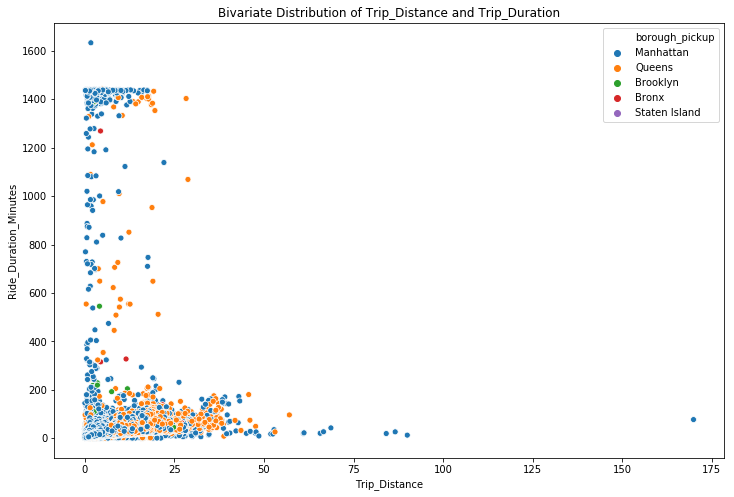

In [116]:
plt.figure(figsize = (12, 8))
plt.xlabel('Trip_Distance') 
plt.ylabel('Trip_Duration')
plt.title('Bivariate Distribution of Trip_Distance and Trip_Duration')
sns.scatterplot(data=gdf_sorted,x="Trip_Distance", y="Ride_Duration_Minutes",hue="borough_pickup")

#### Observation:
#### 1. There are small Trip Distances but High Trip Duration -> High Traffic
#### 2. There are high Trip Distances but low Trip Duration
#### 3. The most high Trip Duration are in Manhattan and Queens

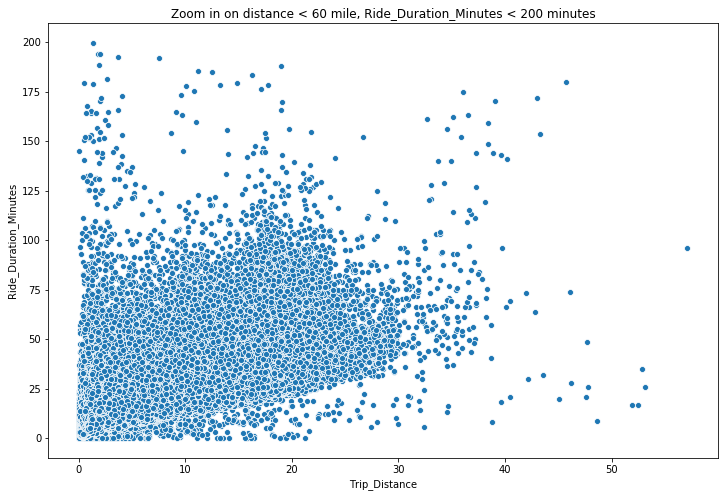

In [117]:
# zoom in on part of data
plt.figure(figsize = (12, 8))
plt.xlabel('Trip_Distance') 
plt.ylabel('Trip_Duration')
plt.title('Zoom in on distance < 60 mile, Ride_Duration_Minutes < 200 minutes')
idx = (gdf_sorted.Trip_Distance < 60) & (gdf_sorted.Ride_Duration_Minutes < 200)
sns.scatterplot(data=gdf_sorted,x=gdf_sorted[idx].Trip_Distance, y=gdf_sorted[idx].Ride_Duration_Minutes)

#### Observation:
#### 1. There is a Cluster with a approximately linear Correlation

### How many Trips are over 200 minutes long?

In [118]:
print(str(len(gdf_sorted.loc[gdf_sorted["Ride_Duration_Minutes"]>200])/len(gdf_sorted)*100) + " "+ "% of the Trips are over 200 minutes long")

0.03453823528950722 % of the Trips are over 200 minutes long


### How many Trips are over 60 Miles?

In [119]:
print(str(len(gdf_sorted.loc[gdf_sorted["Trip_Distance"]>60])/len(gdf_sorted)*100) + " "+ "% of the Trips are over 60 Miles")

0.00047026341543958395 % of the Trips are over 60 Miles


#### Drop Rows with those Outliers

In [120]:
indexNames = gdf_sorted.loc[gdf_sorted["Ride_Duration_Minutes"]>200].index
gdf_sorted.drop(indexNames , inplace=True)

In [121]:
indexNames = gdf_sorted.loc[gdf_sorted["Trip_Distance"]>60].index
gdf_sorted.drop(indexNames , inplace=True)

### 4. How is the Relation between Trip_Duration and Fare_Amt?

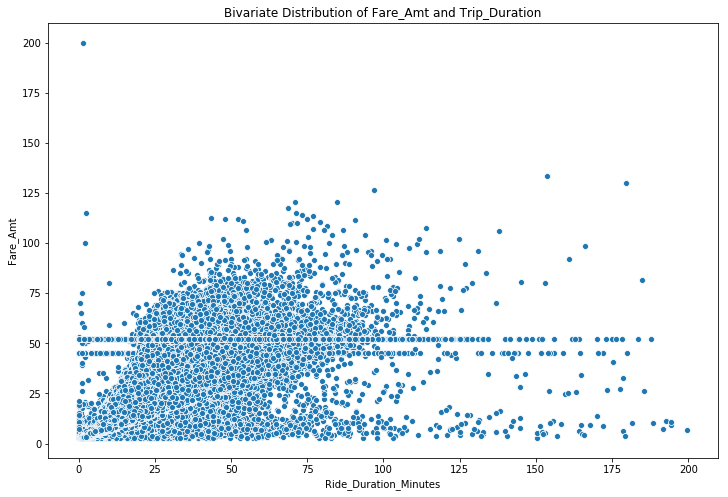

In [122]:
# scatter plot distance - fare
#fig, axs = plt.subplots(1, 2, figsize=(16,6))
plt.figure(figsize = (12, 8))
plt.xlabel('Trip_Duration') 
plt.ylabel('Fare_Amt')
plt.title('Bivariate Distribution of Fare_Amt and Trip_Duration')
sns.scatterplot(data=gdf_sorted,x="Ride_Duration_Minutes", y="Fare_Amt")

#### Observation:
#### 1. The most Fare Amounts are between 20 and 90 Minutes

### 6. Does the Pick-up and Dropoff Location or Neighborhood affect the Fares?

### How is the Distribution of Pickups in Boroughs?

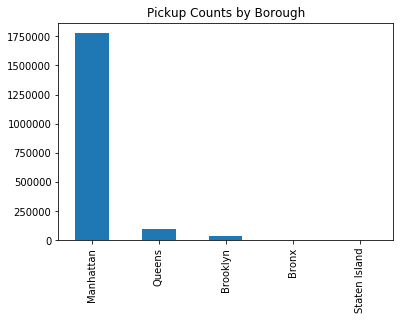

In [123]:
plt.title('Pickup Counts by Borough')
df_borough_pickup=gdf_sorted["borough_pickup"]
df_borough_pickup.value_counts().plot.bar()

#### Observation
#### 1. The most Pickups are in Manhattan
#### 2. The second most Pickups are in Queens

### How is the Distribution of Dropoffs in Boroughs?

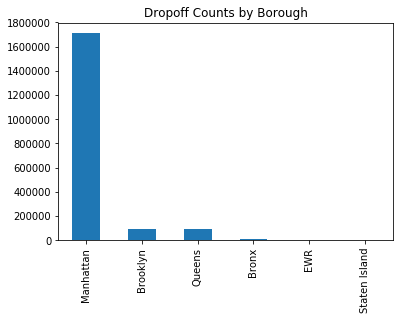

In [124]:
plt.title('Dropoff Counts by Borough')
df_borough_dropoff=gdf_sorted["borough_dropoff"]
df_borough_dropoff.value_counts().plot.bar()

#### Observation:
#### 1. The most dropoffs are in Manhattan
#### 2. The second most dropoffs are in Brooklyn
#### 3. The Third most dropoffs are in Queens

### What is the Average Fare by Borough_pickup?

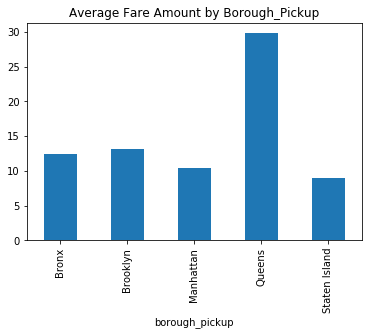

In [125]:
plt.title('Average Fare Amount by Borough_Pickup')
gdf_sorted.groupby("borough_pickup")["Fare_Amt"].agg("mean").plot.bar()

#### Observation:
#### 1. Queens has the highest Average Fare Amount in Pickups
#### 2. Brooklyn has the second highest Average Fare Amount in Pickups

### What is the Average Fare by Borough_dropoff?

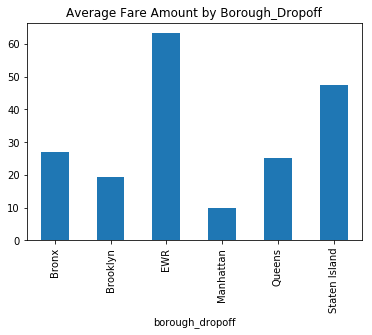

In [126]:
plt.title('Average Fare Amount by Borough_Dropoff')
gdf_sorted.groupby("borough_dropoff")["Fare_Amt"].agg("mean").plot.bar()

#### Observation:
#### 1. The Newark Airport has the highest Fare Amount in Dropoffs
#### 2. Staten Island has the second highest Fare Amount in Dropoffs

### How about the Fare Distribution of Pickups and Dropoffs in Boroughs?

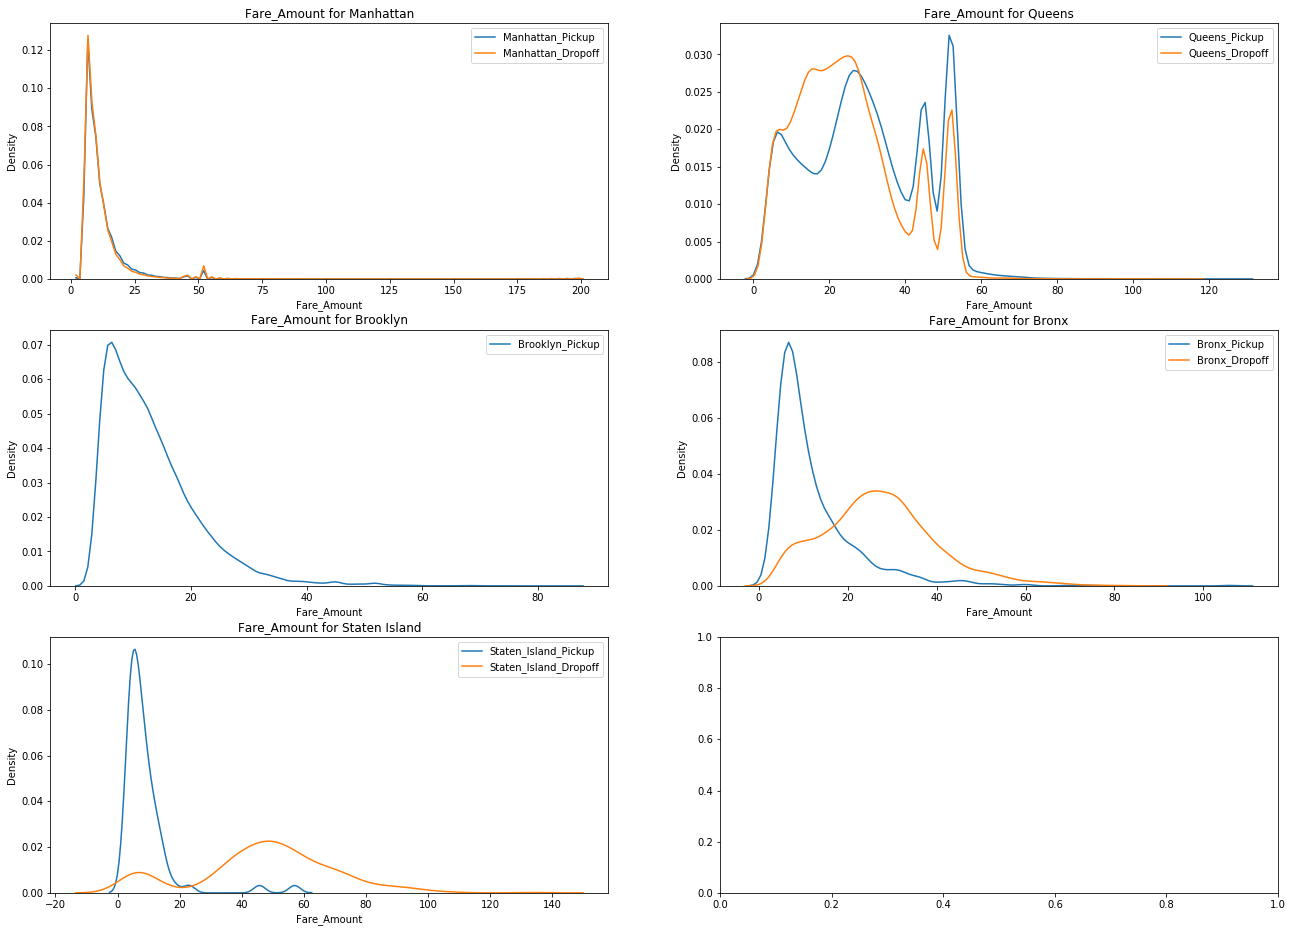

In [127]:
fig, axs = plt.subplots(3, 2, figsize=(22,16))

axs[0][0].set_title('Fare_Amount for Manhattan')
axs[0][0].set_xlabel("Fare_Amount")
axs[0][0].set_ylabel("Density")
sns.kdeplot(data=gdf_sorted.loc[gdf_sorted["borough_pickup"]=="Manhattan","Fare_Amt"],ax=axs[0][0], label="Manhattan_Pickup")
sns.kdeplot(data=gdf_sorted.loc[gdf_sorted["borough_dropoff"]=="Manhattan","Fare_Amt"],ax=axs[0][0], label="Manhattan_Dropoff")

axs[0][1].set_title('Fare_Amount for Queens')
axs[0][1].set_xlabel("Fare_Amount")
axs[0][1].set_ylabel("Density")
sns.kdeplot(data=gdf_sorted.loc[gdf_sorted["borough_pickup"]=="Queens","Fare_Amt"],ax=axs[0][1], label="Queens_Pickup")
sns.kdeplot(data=gdf_sorted.loc[gdf_sorted["borough_dropoff"]=="Queens","Fare_Amt"],ax=axs[0][1], label="Queens_Dropoff")

axs[1][0].set_title('Fare_Amount for Brooklyn')
axs[1][0].set_xlabel("Fare_Amount")
axs[1][0].set_ylabel("Density")
sns.kdeplot(data=gdf_sorted.loc[gdf_sorted["borough_pickup"]=="Brooklyn","Fare_Amt"],ax=axs[1][0], label="Brooklyn_Pickup")
sns.kdeplot(data=gdf_sorted.loc[gdf_sorted["borough_dropoff"]=="Brookyln","Fare_Amt"],ax=axs[1][0], label="Brooklyn_Dropoff")

axs[1][1].set_title('Fare_Amount for Bronx')
axs[1][1].set_xlabel("Fare_Amount")
axs[1][1].set_ylabel("Density")
sns.kdeplot(data=gdf_sorted.loc[gdf_sorted["borough_pickup"]=="Bronx","Fare_Amt"],ax=axs[1][1], label="Bronx_Pickup")
sns.kdeplot(data=gdf_sorted.loc[gdf_sorted["borough_dropoff"]=="Bronx","Fare_Amt"],ax=axs[1][1], label="Bronx_Dropoff")

axs[2][0].set_title('Fare_Amount for Staten Island')
axs[2][0].set_xlabel("Fare_Amount")
axs[2][0].set_ylabel("Density")
sns.kdeplot(data=gdf_sorted.loc[gdf_sorted["borough_pickup"]=="Staten Island","Fare_Amt"],ax=axs[2][0], label="Staten_Island_Pickup")
sns.kdeplot(data=gdf_sorted.loc[gdf_sorted["borough_dropoff"]=="Staten Island","Fare_Amt"],ax=axs[2][0], label="Staten_Island_Dropoff")

#### Observation:
#### 1.There are differences in pickups and dropoffs of Fare Amounts in each Borough except Manhattan.
#### 2.The Pickups from Queens is more expensive compared th pickups in other Boroughs
#### 3. High Differences in Pickup and Dropoff Prices in Staten Island 

### How about the Trip_Distance Distribution of Pickups and Dropoffs in Boroughs?

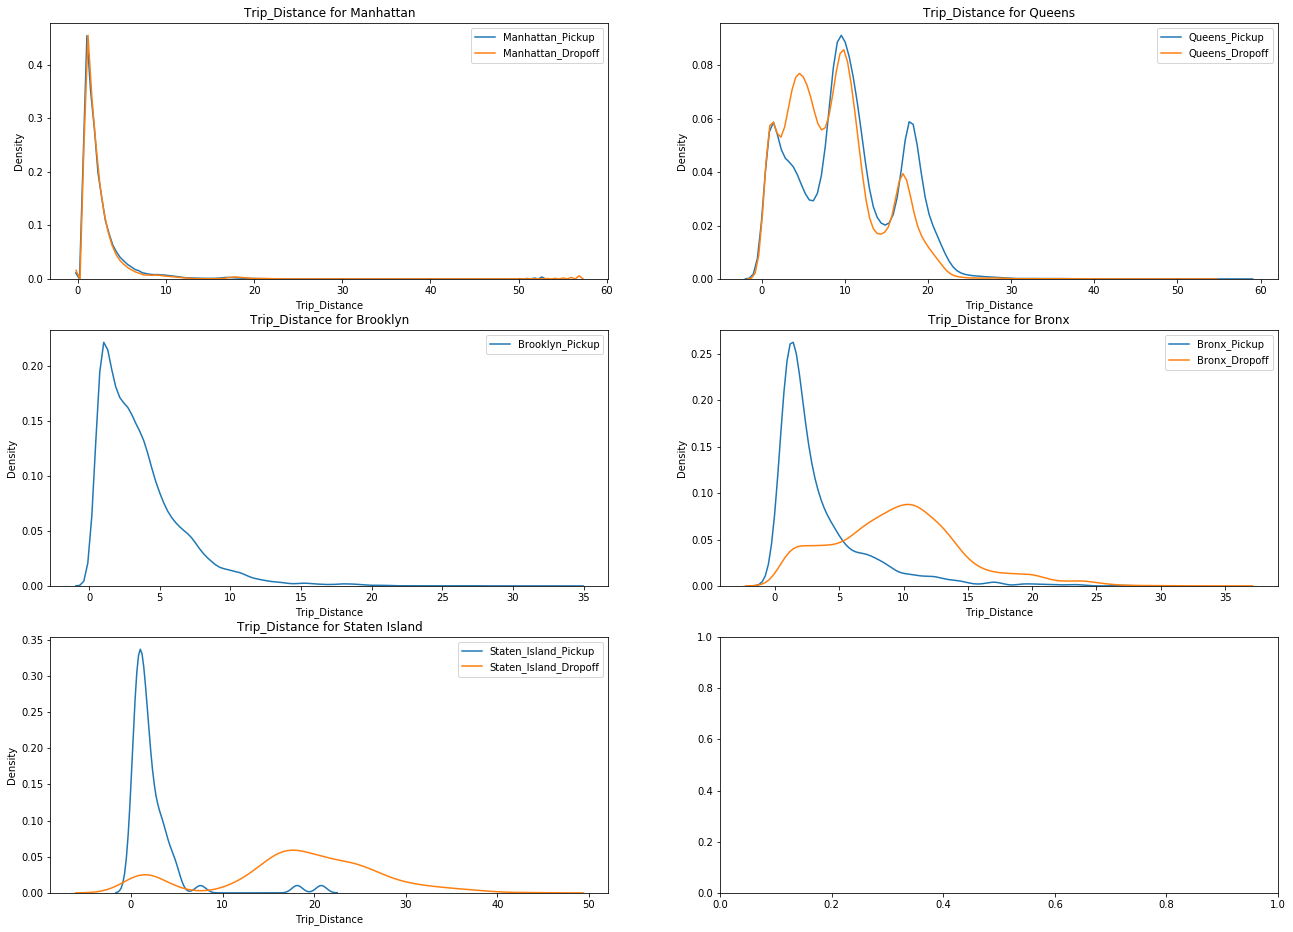

In [128]:
fig, axs = plt.subplots(3, 2, figsize=(22,16))

axs[0][0].set_title('Trip_Distance for Manhattan')
axs[0][0].set_xlabel("Trip_Distance")
axs[0][0].set_ylabel("Density")
sns.kdeplot(data=gdf_sorted.loc[gdf_sorted["borough_pickup"]=="Manhattan","Trip_Distance"],ax=axs[0][0], label="Manhattan_Pickup")
sns.kdeplot(data=gdf_sorted.loc[gdf_sorted["borough_dropoff"]=="Manhattan","Trip_Distance"],ax=axs[0][0], label="Manhattan_Dropoff")

axs[0][1].set_title('Trip_Distance for Queens')
axs[0][1].set_xlabel("Trip_Distance")
axs[0][1].set_ylabel("Density")
sns.kdeplot(data=gdf_sorted.loc[gdf_sorted["borough_pickup"]=="Queens","Trip_Distance"],ax=axs[0][1], label="Queens_Pickup")
sns.kdeplot(data=gdf_sorted.loc[gdf_sorted["borough_dropoff"]=="Queens","Trip_Distance"],ax=axs[0][1], label="Queens_Dropoff")

axs[1][0].set_title('Trip_Distance for Brooklyn')
axs[1][0].set_xlabel("Trip_Distance")
axs[1][0].set_ylabel("Density")
sns.kdeplot(data=gdf_sorted.loc[gdf_sorted["borough_pickup"]=="Brooklyn","Trip_Distance"],ax=axs[1][0], label="Brooklyn_Pickup")
sns.kdeplot(data=gdf_sorted.loc[gdf_sorted["borough_dropoff"]=="Brookyln","Trip_Distance"],ax=axs[1][0], label="Brooklyn_Dropoff")

axs[1][1].set_title('Trip_Distance for Bronx')
axs[1][1].set_xlabel("Trip_Distance")
axs[1][1].set_ylabel("Density")
sns.kdeplot(data=gdf_sorted.loc[gdf_sorted["borough_pickup"]=="Bronx","Trip_Distance"],ax=axs[1][1], label="Bronx_Pickup")
sns.kdeplot(data=gdf_sorted.loc[gdf_sorted["borough_dropoff"]=="Bronx","Trip_Distance"],ax=axs[1][1], label="Bronx_Dropoff")

axs[2][0].set_title('Trip_Distance for Staten Island')
axs[2][0].set_xlabel("Trip_Distance")
axs[2][0].set_ylabel("Density")
sns.kdeplot(data=gdf_sorted.loc[gdf_sorted["borough_pickup"]=="Staten Island","Trip_Distance"],ax=axs[2][0], label="Staten_Island_Pickup")
sns.kdeplot(data=gdf_sorted.loc[gdf_sorted["borough_dropoff"]=="Staten Island","Trip_Distance"],ax=axs[2][0], label="Staten_Island_Dropoff")

#### Observation:
#### 1. Dropoffs to Bronx and Staten Island are long Trips.
#### 2. Even here Manhattan has the same Distribution for Trip Distance

### Where do the long Trip Distance originate and end?
#### Long Distances are over 10 Miles, because a Trip from Hamburg to Harburg is round about 10 Miles
#### We know Trip_Distance and Fare_Amt has a linear Relationship

#### Long Trip Distance Pickup

In [129]:
#1. Plot on Map to see where does these Trips happen
Pickup_High_Distance=gdf_sorted.loc[(gdf_sorted["Trip_Distance"]>=20) & ((gdf_sorted["Manhattan_JFK_Airport_Trip"]!=True))]

Pickup_High_Distance=Pickup_High_Distance[['Pickup_Lat','Pickup_Lon']]

In [130]:
########################Lat,Lon#################################
m_Pickup_High_Distance = folium.Map(location=[40.730610, -73.935242])

for row in Pickup_High_Distance.itertuples(index=False):

    folium.CircleMarker(
        location=[row[0],row[1]],
        radius=1,
        color="green",
        fill=True,
        fill_opacity=0.5
    ).add_to(m_Pickup_High_Distance)

In [131]:
m_Pickup_High_Distance

#### Observation:
#### 1.Most of the Long Distances originates in Lower and Midtown Manhattan

#### Long Trip Distance Dropoff

In [132]:
#1. Plot on Map to see where does these Trips happen
Dropoff_High_Distance=gdf_sorted.loc[(gdf_sorted["Trip_Distance"]>=20) & ((gdf_sorted["Manhattan_JFK_Airport_Trip"]!=True))]

Dropoff_High_Distance=Dropoff_High_Distance[['Dropoff_Lat','Dropoff_Lon']]

In [133]:
########################Lat,Lon#################################
m_Dropoff_High_Distance = folium.Map(location=[40.730610, -73.935242])

for row in Dropoff_High_Distance.itertuples(index=False):

    folium.CircleMarker(
        location=[row[0],row[1]],
        radius=1,
        color="red",
        fill=True,
        fill_opacity=0.5
    ).add_to(m_Dropoff_High_Distance)

In [134]:
m_Dropoff_High_Distance

#### Observation:
#### 1. Most Dropoffs are in Manhattan, Brooklyn, Airports

### Create Feature "is_area_lower_midtown_manhattan" to differentiate between Rest of Manhattan

#### For getting a Bounding Box for Lower and Midtown Manhattan go to [Bounding Box:](https://boundingbox.klokantech.com/)

In [135]:
# Coordinates of Bounding Box:-74.037727,40.690513,-73.946953,40.776624
# At the Beginning set it to False and if the Coordinate is in Bounding Box set it to True
gdf_sorted["is_area_lower_midtown_manhattan"]=False
gdf_sorted.loc[(gdf_sorted['Pickup_Lat'].between(40.690513, 40.776624)) & (gdf_sorted['Pickup_Lon'].between(-74.037727, -73.946953)),["is_area_lower_midtown_manhattan"]]=True
gdf_sorted.loc[(gdf_sorted['Dropoff_Lat'].between(40.690513, 40.776624)) & (gdf_sorted['Dropoff_Lon'].between(-74.037727, -73.946953)),["is_area_lower_midtown_manhattan"]]=True 

### How does the Distribution of the Fare Amount look like in Lower and Midtown Manhattan vs. Rest of Manhattan for Pickups?

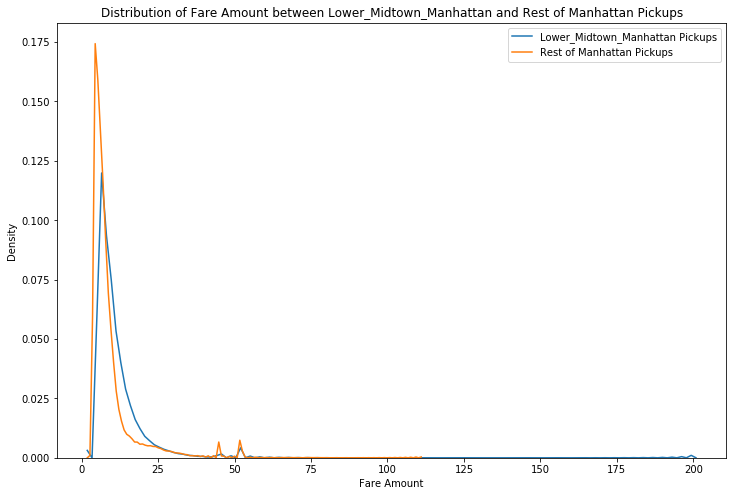

In [136]:
# Dataframe with sorted Passenger Count and Fare Amount
df_is_area_lower_midtown_manhattan_fare=gdf_sorted[["borough_pickup","is_area_lower_midtown_manhattan","Fare_Amt"]]
# Plotting Distribution of Fare Amount by Number of Passengers
plt.figure(figsize = (12, 8))
plt.xlabel('Fare Amount') 
plt.ylabel('Density')
plt.title("Distribution of Fare Amount between Lower_Midtown_Manhattan and Rest of Manhattan Pickups")
sns.kdeplot(data=df_is_area_lower_midtown_manhattan_fare.loc[(df_is_area_lower_midtown_manhattan_fare["is_area_lower_midtown_manhattan"]==True) & (df_is_area_lower_midtown_manhattan_fare["borough_pickup"]=="Manhattan"),"Fare_Amt"], label="Lower_Midtown_Manhattan Pickups")
sns.kdeplot(data=df_is_area_lower_midtown_manhattan_fare.loc[(df_is_area_lower_midtown_manhattan_fare["is_area_lower_midtown_manhattan"]==False) & (df_is_area_lower_midtown_manhattan_fare["borough_pickup"]=="Manhattan"),"Fare_Amt"], label="Rest of Manhattan Pickups")

#### Observation:
#### 1. The Rest of Manhattan Pickups tend to has more higher Fares than Lower_Midtown Manhattan

### How does the Distribution of the Fare Amount look like in Lower and Midtown Manhattan vs. Rest of Manhattan for Dropoffs?

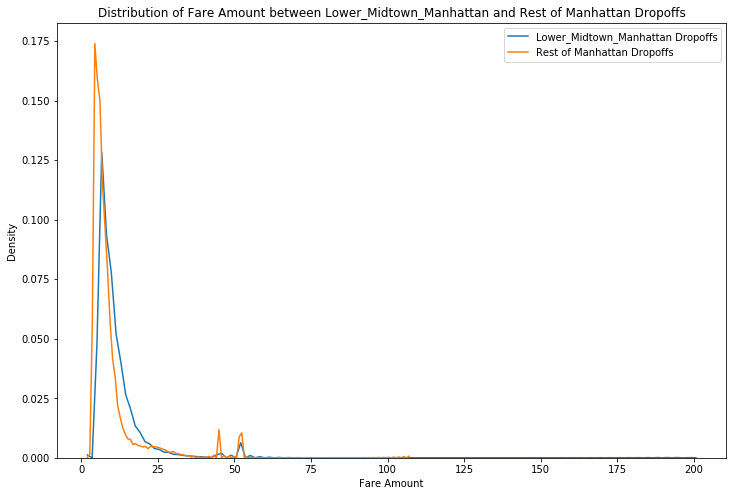

In [137]:
# Dataframe with sorted Passenger Count and Fare Amount
df_is_area_lower_midtown_manhattan_fare=gdf_sorted[["borough_dropoff","is_area_lower_midtown_manhattan","Fare_Amt"]]
# Plotting Distribution of Fare Amount by Number of Passengers
plt.figure(figsize = (12, 8))
plt.xlabel('Fare Amount') 
plt.ylabel('Density')
plt.title("Distribution of Fare Amount between Lower_Midtown_Manhattan and Rest of Manhattan Dropoffs")
sns.kdeplot(data=df_is_area_lower_midtown_manhattan_fare.loc[(df_is_area_lower_midtown_manhattan_fare["is_area_lower_midtown_manhattan"]==True) & (df_is_area_lower_midtown_manhattan_fare["borough_dropoff"]=="Manhattan"),"Fare_Amt"], label="Lower_Midtown_Manhattan Dropoffs")
sns.kdeplot(data=df_is_area_lower_midtown_manhattan_fare.loc[(df_is_area_lower_midtown_manhattan_fare["is_area_lower_midtown_manhattan"]==False) & (df_is_area_lower_midtown_manhattan_fare["borough_dropoff"]=="Manhattan"),"Fare_Amt"], label="Rest of Manhattan Dropoffs")

#### Observation
#### 1. Even the Dropoffs of Rest of Manhattan tend to have more higher Fares than Lower_Midtown Manhattan

### What about the Distribution of Trip_Distance and Fare_Amt of Lower_Midtown Manhattan vs Rest of Manhattan?

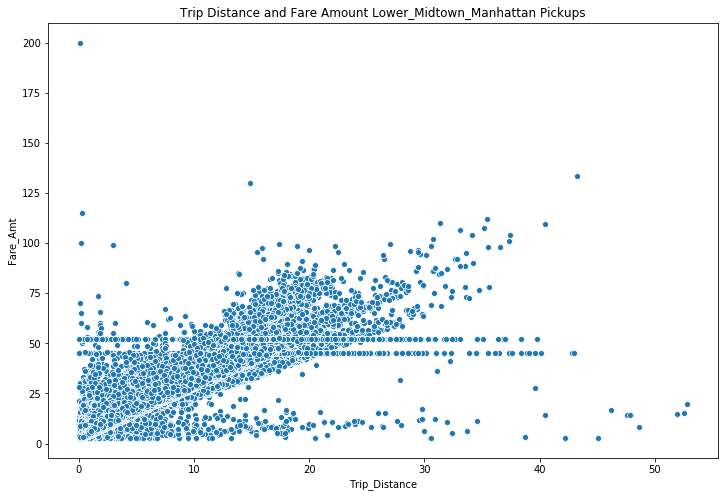

In [138]:
# scatter plot distance - fare
plt.figure(figsize = (12, 8))
plt.xlabel('Trip_Distance') 
plt.ylabel('Fare_Amt')
plt.title('Trip Distance and Fare Amount Lower_Midtown_Manhattan Pickups')
sns.scatterplot(data=gdf_sorted,x=gdf_sorted.loc[(gdf_sorted["is_area_lower_midtown_manhattan"]==True) & (gdf_sorted["borough_pickup"]=="Manhattan"),"Trip_Distance"], y=gdf_sorted.loc[(gdf_sorted["is_area_lower_midtown_manhattan"]==True) & (gdf_sorted["borough_pickup"]=="Manhattan"),"Fare_Amt"])

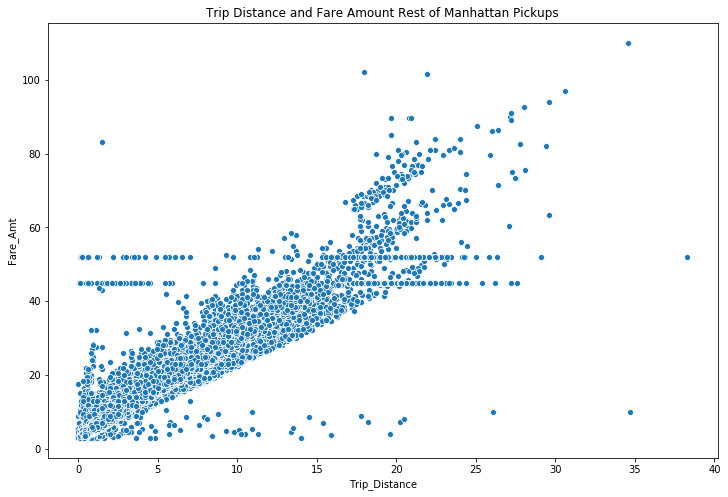

In [139]:
# scatter plot distance - fare
plt.figure(figsize = (12, 8))
plt.xlabel('Trip_Distance') 
plt.ylabel('Fare_Amt')
plt.title('Trip Distance and Fare Amount Rest of Manhattan Pickups')
sns.scatterplot(data=gdf_sorted,x=gdf_sorted.loc[(gdf_sorted["is_area_lower_midtown_manhattan"]==False) & (gdf_sorted["borough_pickup"]=="Manhattan"),"Trip_Distance"], y=gdf_sorted.loc[(gdf_sorted["is_area_lower_midtown_manhattan"]==False) & (gdf_sorted["borough_pickup"]=="Manhattan"),"Fare_Amt"])

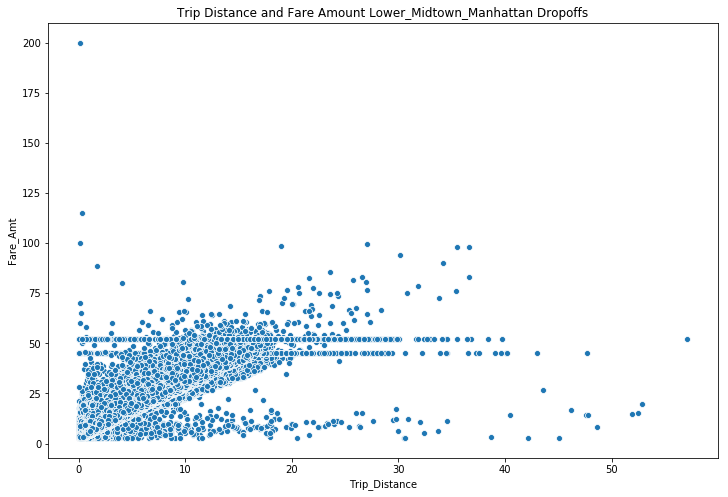

In [140]:
# scatter plot distance - fare
plt.figure(figsize = (12, 8))
plt.xlabel('Trip_Distance') 
plt.ylabel('Fare_Amt')
plt.title('Trip Distance and Fare Amount Lower_Midtown_Manhattan Dropoffs')
sns.scatterplot(data=gdf_sorted,x=gdf_sorted.loc[(gdf_sorted["is_area_lower_midtown_manhattan"]==True) & (gdf_sorted["borough_dropoff"]=="Manhattan"),"Trip_Distance"], y=gdf_sorted.loc[(gdf_sorted["is_area_lower_midtown_manhattan"]==True) & (gdf_sorted["borough_dropoff"]=="Manhattan"),"Fare_Amt"])

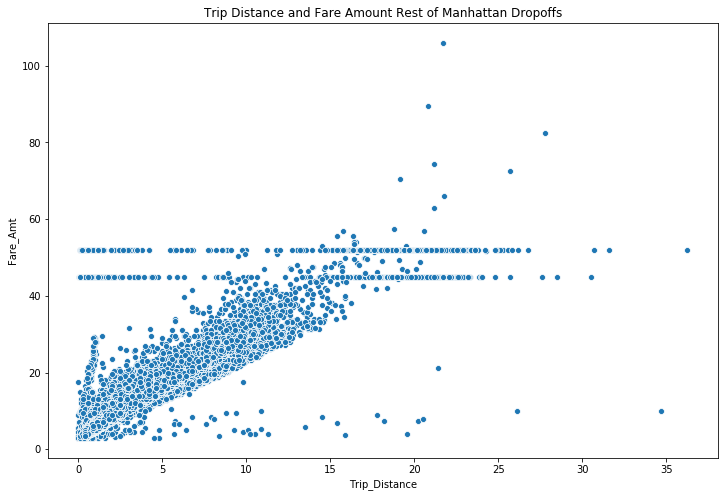

In [141]:
# scatter plot distance - fare
plt.figure(figsize = (12, 8))
plt.xlabel('Trip_Distance') 
plt.ylabel('Fare_Amt')
plt.title('Trip Distance and Fare Amount Rest of Manhattan Dropoffs')
sns.scatterplot(data=gdf_sorted,x=gdf_sorted.loc[(gdf_sorted["is_area_lower_midtown_manhattan"]==False) & (gdf_sorted["borough_dropoff"]=="Manhattan"),"Trip_Distance"], y=gdf_sorted.loc[(gdf_sorted["is_area_lower_midtown_manhattan"]==False) & (gdf_sorted["borough_dropoff"]=="Manhattan"),"Fare_Amt"])

### 7.What is the Relationship between the Time and the Fare?

#### How does the Amount of Trips developed over the Years?

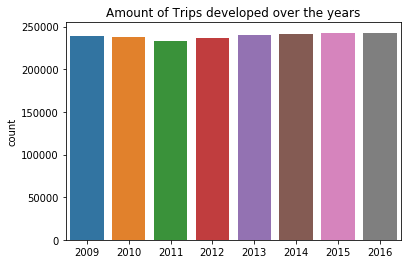

In [142]:
#extract Year from Datetime Object
gdf_sorted["pickup_year"]=gdf_sorted["Pickup_DateTime"].dt.year
#extract pickup_year and value counts of Dataframe
df_year=gdf_sorted["pickup_year"].value_counts()
df_year=df_year.to_frame(name="count")
# Plot the Amount of Trips developed over the years
plt.title("Amount of Trips developed over the years")
sns.barplot(x=df_year.index,y="count",data=df_year)

#### Observation:
#### 1. Amount of Trips has descreased from 2009 till 2011 but it increased from 2012 till 2016

### How does the average Fare Amount developed over the years?

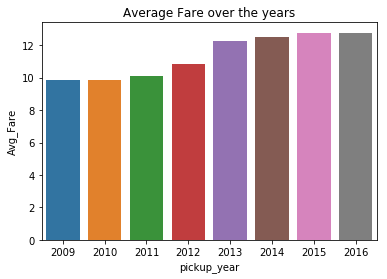

In [143]:
#extract pickup_year and Fare_Amt of Dataframe
df_year_fare=data=gdf_sorted.groupby("pickup_year")["Fare_Amt"].mean()
df_year_fare=df_year_fare.to_frame(name="Avg_Fare")
plt.title("Average Fare over the years")
sns.barplot(x=df_year_fare.index,y="Avg_Fare",data=df_year_fare)

#### Observation:
#### 1. The Average Fare Amount has increased over the Years

### What about the Number of Pickups and Average Fare Amount over the months?

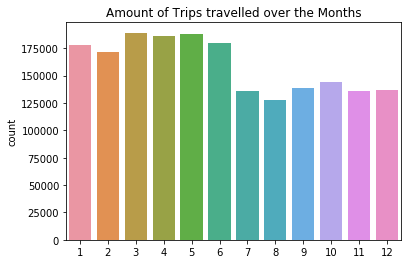

In [144]:
#extract Year from Datetime Object
gdf_sorted["pickup_month"]=gdf_sorted["Pickup_DateTime"].dt.month
#extract pickup_year and value counts of Dataframe
df_month=gdf_sorted["pickup_month"].value_counts()
df_month=df_month.to_frame(name="count")
# Plot the Amount of Trips developed over the years
plt.title("Amount of Trips travelled over the Months")
sns.barplot(x=df_month.index,y="count",data=df_month)

#### Observation:
#### 1. Number of Trips are lower from July to December

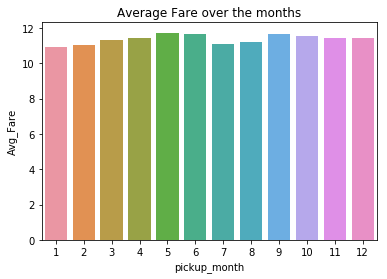

In [145]:
#extract pickup_year and Fare_Amt of Dataframe
df_month_fare=data=gdf_sorted.groupby("pickup_month")["Fare_Amt"].mean()
df_month_fare=df_month_fare.to_frame(name="Avg_Fare")
plt.title("Average Fare over the months")
sns.barplot(x=df_month_fare.index,y="Avg_Fare",data=df_month_fare)

#### The Average Fare Amount across the Month look constant

### What about the Number of Pickups and Average Fare Amount over Day of Weeks?

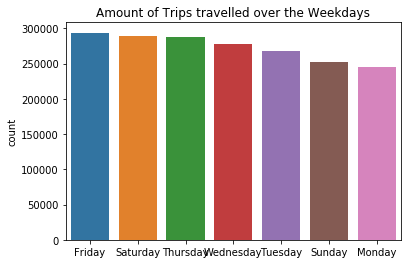

In [146]:
#extract Year from Datetime Object
gdf_sorted["pickup_weekday"]=gdf_sorted["Pickup_DateTime"].dt.day_name()
#extract pickup_weekday and value counts of Dataframe
df_weekday=gdf_sorted["pickup_weekday"].value_counts()
df_weekday=df_weekday.to_frame(name="count")
# Plot the Amount of Trips developed over the weekdays
plt.title("Amount of Trips travelled over the Weekdays")
sns.barplot(x=df_weekday.index,y="count",data=df_weekday)

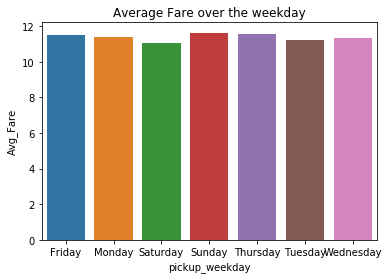

In [147]:
#extract pickup_year and Fare_Amt of Dataframe
df_weekday_fare=data=gdf_sorted.groupby("pickup_weekday")["Fare_Amt"].mean()
df_weekday_fare=df_weekday_fare.to_frame(name="Avg_Fare")
plt.title("Average Fare over the weekday")
sns.barplot(x=df_weekday_fare.index,y="Avg_Fare",data=df_weekday_fare)

#### Observation:
#### 1. Saturday has low avg fare amount, compared to other days though there are a lot of trips of saturday. On sunday and monday though the number of trips are lower, avg fare amount is higher

### What about the Number of Pickups and Average Fare Amount over Hour of Days?

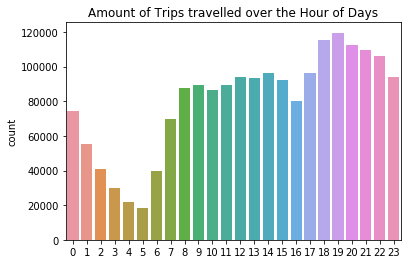

In [148]:
#extract Year from Datetime Object
gdf_sorted["pickup_hour"]=gdf_sorted["Pickup_DateTime"].dt.hour
#extract pickup_hour and value counts of Dataframe
df_hour=gdf_sorted["pickup_hour"].value_counts()
df_hour=df_hour.to_frame(name="count")
# Plot the Amount of Trips developed over the weekdays
plt.title("Amount of Trips travelled over the Hour of Days")
sns.barplot(x=df_hour.index,y="count",data=df_hour)

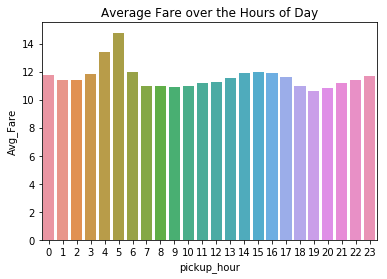

In [149]:
#extract pickup_year and Fare_Amt of Dataframe
df_hour_fare=data=gdf_sorted.groupby("pickup_hour")["Fare_Amt"].mean()
df_hour_fare=df_hour_fare.to_frame(name="Avg_Fare")
plt.title("Average Fare over the Hours of Day")
sns.barplot(x=df_hour_fare.index,y="Avg_Fare",data=df_hour_fare)

#### Observation:
#### 1. The avg fare amount at 5am is the higher while the number of trips at 5 am are the least. The number of trips are highest in 18 and 19 hours

### Which Year had the highest  and lowest Fare Amount Pickup?

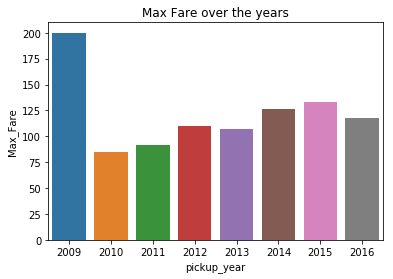

In [150]:
#extract pickup_year and Fare_Amt of Dataframe
df_year_max_fare=data=gdf_sorted.groupby("pickup_year")["Fare_Amt"].max()
df_year_max_fare=df_year_max_fare.to_frame(name="Max_Fare")
plt.title("Max Fare over the years")
sns.barplot(x=df_year_max_fare.index,y="Max_Fare",data=df_year_max_fare)

#### Observation:
#### 1. Year 2009 had the highest Fare Amount

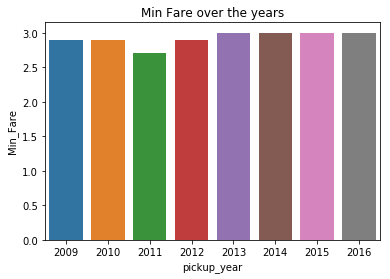

In [151]:
#extract pickup_year and Fare_Amt of Dataframe
df_year_min_fare=data=gdf_sorted.groupby("pickup_year")["Fare_Amt"].min()
df_year_min_fare=df_year_min_fare.to_frame(name="Min_Fare")
plt.title("Min Fare over the years")
sns.barplot(x=df_year_min_fare.index,y="Min_Fare",data=df_year_min_fare)

#### Observation:
#### 1. Year 2011 had the Lowest Fare Amount

### Which Month had the highest and lowest Fare Amount Pickup?

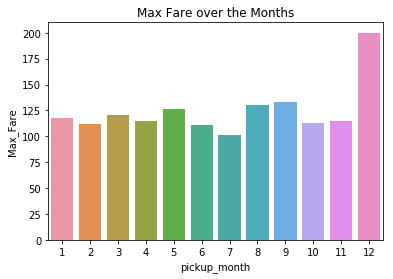

In [152]:
#extract pickup_year and Fare_Amt of Dataframe
df_month_max_fare=data=gdf_sorted.groupby("pickup_month")["Fare_Amt"].max()
df_month_max_fare=df_month_max_fare.to_frame(name="Max_Fare")
plt.title("Max Fare over the Months")
sns.barplot(x=df_month_max_fare.index,y="Max_Fare",data=df_month_max_fare)

#### Observation:
#### 1. December had the highest Fare Amount

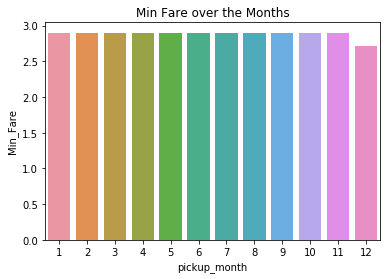

In [153]:
#extract pickup_year and Fare_Amt of Dataframe
df_month_min_fare=data=gdf_sorted.groupby("pickup_month")["Fare_Amt"].min()
df_month_min_fare=df_month_min_fare.to_frame(name="Min_Fare")
plt.title("Min Fare over the Months")
sns.barplot(x=df_month_min_fare.index,y="Min_Fare",data=df_month_min_fare)

#### Observation:
#### 1. December had the Lowest Fare Amount

### Which Day had the highest and lowest Fare Amount?

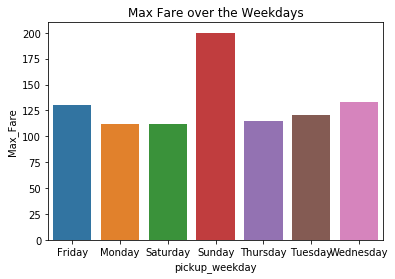

In [154]:
#extract pickup_year and Fare_Amt of Dataframe
df_weekday_max_fare=data=gdf_sorted.groupby("pickup_weekday")["Fare_Amt"].max()
df_weekday_max_fare=df_weekday_max_fare.to_frame(name="Max_Fare")
plt.title("Max Fare over the Weekdays")
sns.barplot(x=df_weekday_max_fare.index,y="Max_Fare",data=df_weekday_max_fare)

#### Observation:
#### 1. Sunday had the highest Fare Amount

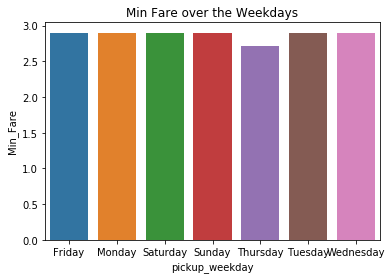

In [155]:
#extract pickup_year and Fare_Amt of Dataframe
df_weekday_min_fare=data=gdf_sorted.groupby("pickup_weekday")["Fare_Amt"].min()
df_weekday_min_fare=df_weekday_min_fare.to_frame(name="Min_Fare")
plt.title("Min Fare over the Weekdays")
sns.barplot(x=df_weekday_min_fare.index,y="Min_Fare",data=df_weekday_min_fare)

#### Observation:
#### 1. Thursday had the lowest Fare Amount

### Which Hour had the highest and lowest Fare Amount?

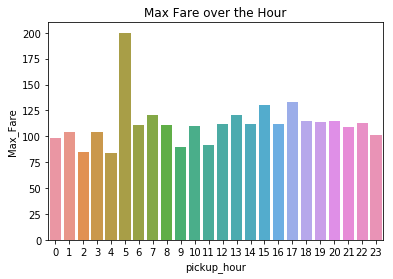

In [156]:
#extract pickup_year and Fare_Amt of Dataframe
df_hour_max_fare=data=gdf_sorted.groupby("pickup_hour")["Fare_Amt"].max()
df_hour_max_fare=df_hour_max_fare.to_frame(name="Max_Fare")
plt.title("Max Fare over the Hour")
sns.barplot(x=df_hour_max_fare.index,y="Max_Fare",data=df_hour_max_fare)

#### Observation:
#### 1. 5 AM had the highest Fare Amount

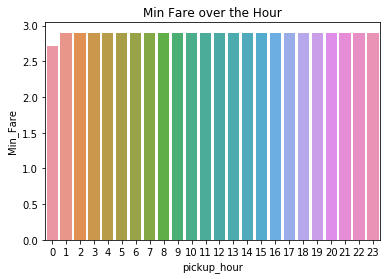

In [157]:
#extract pickup_year and Fare_Amt of Dataframe
df_hour_min_fare=data=gdf_sorted.groupby("pickup_hour")["Fare_Amt"].min()
df_hour_min_fare=df_hour_min_fare.to_frame(name="Min_Fare")
plt.title("Min Fare over the Hour")
sns.barplot(x=df_hour_min_fare.index,y="Min_Fare",data=df_hour_min_fare)

#### Observation:
#### 1. 0 AM had the lowest Fare Amount

### 8.How is the Relation of RateCodeID to Fare Amount?

### How is the Distribution of RateCodeID's?

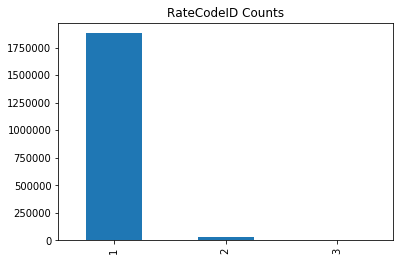

In [158]:
plt.title('RateCodeID Counts')
df_borough_pickup=gdf_sorted["RateCodeID"]
df_borough_pickup.value_counts().plot.bar()

#### Observation
#### 1. The most Trips are RateCodeID 1
#### 2. The second most Trips are RateCodeID 2

### What is the Average Fare for RateCodeID's?

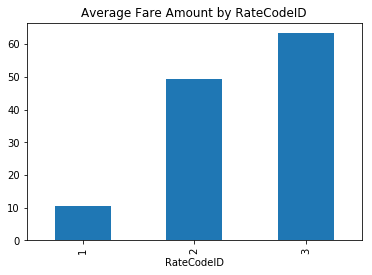

In [159]:
plt.title('Average Fare Amount by RateCodeID')
gdf_sorted.groupby("RateCodeID")["Fare_Amt"].agg("mean").plot.bar()

#### Observation:
#### 1. RateCodeID 3 has the highest average Fare Amount 
#### 2. RateCodeID 2 has the second highest average Fare Amount
#### 3. RateCodeID 1 has the third highest Fare Amount

### How is the Distribution of Fare_Amount by RateCodeID?

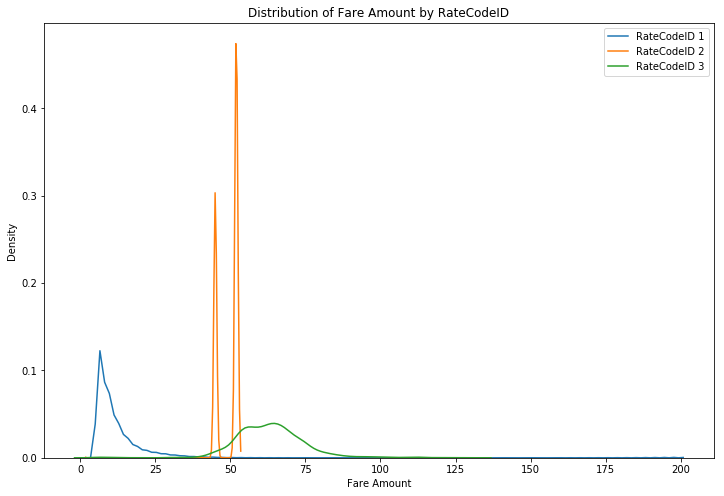

In [160]:
# Dataframe with sorted Passenger Count and Fare Amount
df_rate_fare=gdf_sorted[["RateCodeID","Fare_Amt"]]
# Plotting Distribution of Fare Amount by Number of Passengers
plt.figure(figsize = (12, 8))
plt.xlabel('Fare Amount') 
plt.ylabel('Density')
plt.title("Distribution of Fare Amount by RateCodeID")
sns.kdeplot(data=df_rate_fare.loc[df_rate_fare["RateCodeID"]==1,"Fare_Amt"], label="RateCodeID 1")
sns.kdeplot(data=df_rate_fare.loc[df_rate_fare["RateCodeID"]==2,"Fare_Amt"], label="RateCodeID 2")
sns.kdeplot(data=df_rate_fare.loc[df_rate_fare["RateCodeID"]==3,"Fare_Amt"], label="RateCodeID 3")

#### Observation:
#### 1. Most of the Trips of RateCodeID 2 has high Fare Amounts
#### 2. RateCodeID 1 has more small Fare Amounts
#### 3. RateCodeID 3 has high Fare Amounts, but not so frequently

### 9. How does the Fare Amount developed over the Time?

### How does the Fare Amount developed over the Years?

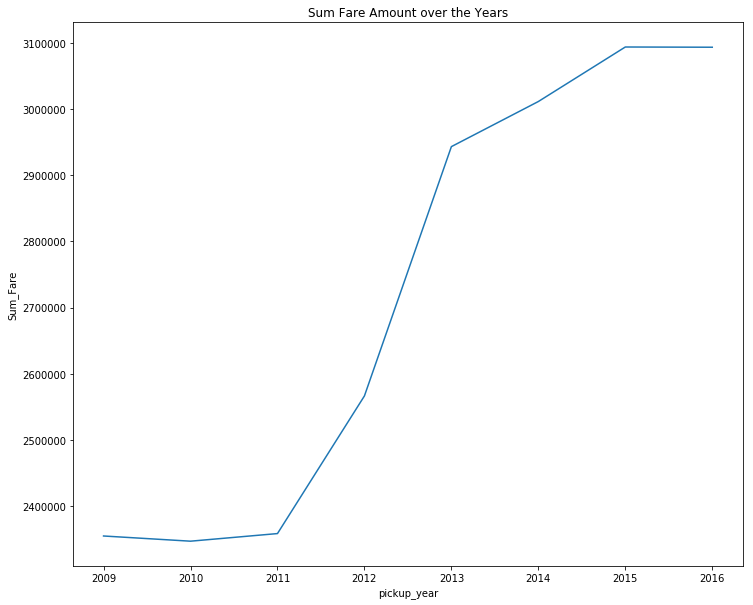

In [161]:
df_year_fare_sum=gdf_sorted.groupby("pickup_year")["Fare_Amt"].sum()
df_year_fare_sum=df_year_fare_sum.to_frame(name="Sum_Fare")
plt.figure(figsize=(12,10))
plt.title("Sum Fare Amount over the Years")
sns.lineplot(x=df_year_fare_sum.index,y="Sum_Fare",markers=True, dashes=False,data=df_year_fare_sum)
#sns.lineplot(x="pickup_year", y="Fare_Amt",markers=True, dashes=False, data=gdf_sorted)

#### Observation:
#### 1.

### How does the Fare Amount developed over the Months?

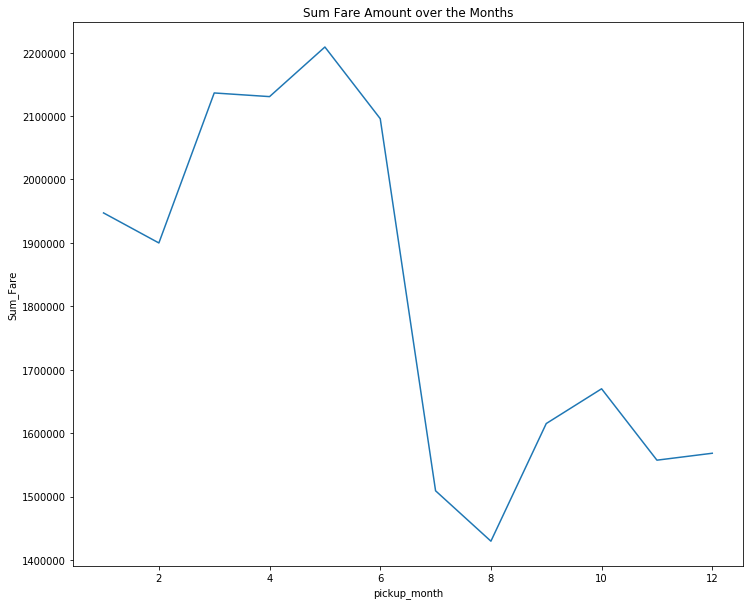

In [162]:
df_month_fare_sum=gdf_sorted.groupby("pickup_month")["Fare_Amt"].sum()
df_month_fare_sum=df_month_fare_sum.to_frame(name="Sum_Fare")
plt.figure(figsize=(12,10))
plt.title("Sum Fare Amount over the Months")
sns.lineplot(x=df_month_fare_sum.index,y="Sum_Fare",markers=True, dashes=False,data=df_month_fare_sum)
#sns.lineplot(x="pickup_year", y="Fare_Amt",markers=True, dashes=False, data=gdf_sorted)

#### Observation:
#### 1.

### How does the Fare Amount developed over the Days?

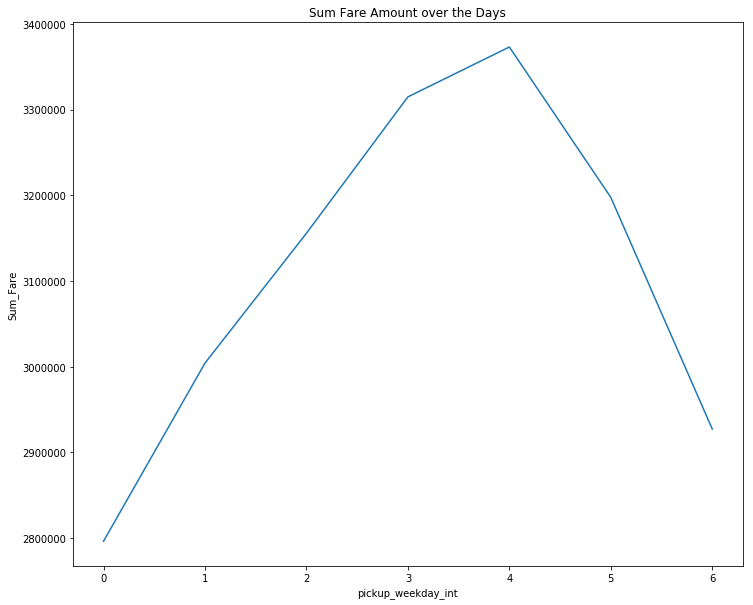

In [163]:
gdf_sorted["pickup_weekday_int"]=gdf_sorted["Pickup_DateTime"].dt.dayofweek
df_weekday_fare_sum=gdf_sorted.groupby("pickup_weekday_int")["Fare_Amt"].sum()
df_weekday_fare_sum=df_weekday_fare_sum.to_frame(name="Sum_Fare")
plt.figure(figsize=(12,10))
plt.title("Sum Fare Amount over the Days")
sns.lineplot(x=df_weekday_fare_sum.index,y="Sum_Fare",markers=True, dashes=False,data=df_weekday_fare_sum)
#sns.lineplot(x="pickup_year", y="Fare_Amt",markers=True, dashes=False, data=gdf_sorted)

### How does the Fare Amount developed over the Hours?

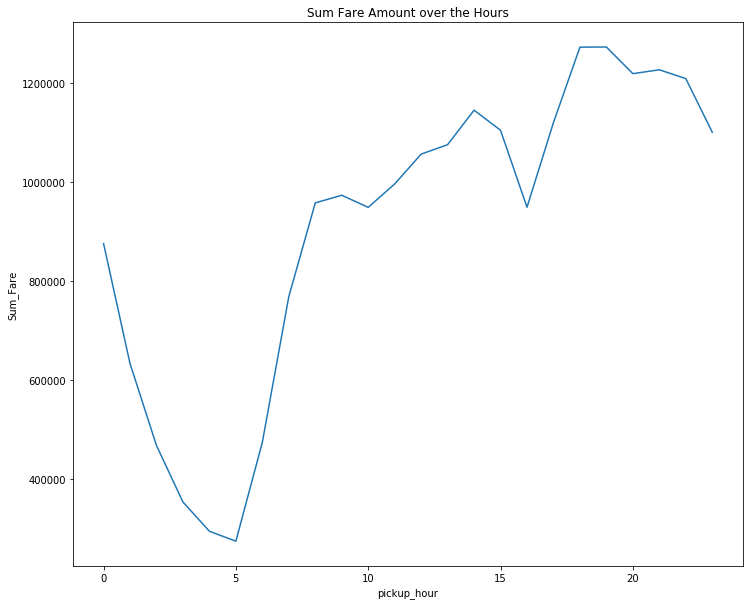

In [164]:
df_hour_fare_sum=gdf_sorted.groupby("pickup_hour")["Fare_Amt"].sum()
df_hour_fare_sum=df_hour_fare_sum.to_frame(name="Sum_Fare")
plt.figure(figsize=(12,10))
plt.title("Sum Fare Amount over the Hours")
sns.lineplot(x=df_hour_fare_sum.index,y="Sum_Fare",markers=True, dashes=False,data=df_hour_fare_sum)
#sns.lineplot(x="pickup_year", y="Fare_Amt",markers=True, dashes=False, data=gdf_sorted)

### How does the Fare Amount changed for each Year?

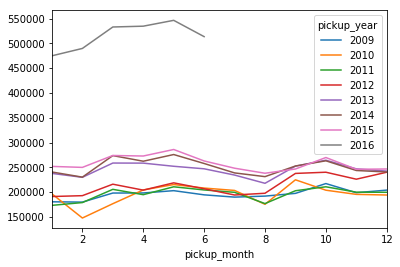

In [165]:
df_year_month_fare_sum=gdf_sorted.groupby(["pickup_month","pickup_year"])["Fare_Amt"].sum()
df_year_month_fare_sum=df_year_month_fare_sum.unstack()
df_year_month_fare_sum.plot()

In [166]:
gdf_sorted

Pickup_DateTime    Dropoff_DateTime  Passenger_Count  \
index                                                              
174760  2009-01-01 00:03:00 2009-01-01 00:48:52                1   
19777   2009-01-01 00:07:28 2009-01-01 00:14:39                1   
226174  2009-01-01 00:08:47 2009-01-01 00:13:09                4   
248219  2009-01-01 00:15:27 2009-01-01 00:30:49                2   
103803  2009-01-01 00:21:09 2009-01-01 00:30:51                4   
207250  2009-01-01 00:23:05 2009-01-01 00:28:22                1   
201595  2009-01-01 00:26:13 2009-01-01 00:48:11                1   
162670  2009-01-01 00:28:42 2009-01-01 00:35:20                1   
237228  2009-01-01 00:28:45 2009-01-01 00:39:25                1   
161338  2009-01-01 00:35:23 2009-01-01 01:05:33                1   
207658  2009-01-01 00:35:57 2009-01-01 00:44:02                1   
74556   2009-01-01 00:38:24 2009-01-01 00:50:25                1   
118615  2009-01-01 00:39:29 2009-01-01 00:49:21                3   
153895  2009-01-01 00:43:18 2009-01-01 00:45:33                2   
211752  2009-01-01 00:44:49 2009-01-01 00:59:29                2   
190377  2009-01-01 00:45:16 2009-01-01 00:53:25                1   
121966  2009-01-01 00:52:59 2009-01-01 01:01:48                2   
190100  2009-01-01 00:54:12 2009-01-01 00:59:56                4   
187482  2009-01-01 00:56:44 2009-01-01 00:59:21                1   
60298   2009-01-01 00:57:50 2009-01-01 01:02:28                2   
165128  2009-01-01 01:00:43 2009-01-01 01:09:48                1   
129977  2009-01-01 01:01:55 2009-01-01 01:07:38                1   
234614  2009-01-01 01:07:55 2009-01-01 01:30:14                1   
208668  2009-01-01 01:09:17 2009-01-01 01:38:52                1   
245448  2009-01-01 01:10:53 2009-01-01 01:16:07                2   
199470  2009-01-01 01:12:18 2009-01-01 01:33:03                1   
31735   2009-01-01 01:12:40 2009-01-01 01:16:00                1   
75084   2009-01-01 01:14:12 2009-01-01 01:28:29                1   
56957   2009-01-01 01:17:09 2009-01-01 01:32:12                3   
155098  2009-01-01 01:21:08 2009-01-01 01:28:37                1   
...                     ...                 ...              ...   
1970630 2016-06-30 23:37:49 2016-06-30 23:44:56                1   
1757077 2016-06-30 23:38:00 2016-06-30 23:46:10                2   
1908205 2016-06-30 23:38:39 2016-07-01 00:02:10                2   
1778648 2016-06-30 23:38:55 2016-06-30 23:45:47                6   
1855416 2016-06-30 23:39:36 2016-07-01 00:18:33                1   
1786609 2016-06-30 23:39:40 2016-06-30 23:41:58                1   
1830086 2016-06-30 23:41:49 2016-06-30 23:51:39                1   
1798617 2016-06-30 23:42:01 2016-06-30 23:56:01                1   
1921452 2016-06-30 23:42:57 2016-06-30 23:48:28                2   
1973574 2016-06-30 23:43:27 2016-07-01 00:01:41                2   
1815079 2016-06-30 23:43:33 2016-06-30 23:50:31                1   
1917347 2016-06-30 23:46:23 2016-07-01 00:10:12                1   
1997634 2016-06-30 23:47:33 2016-06-30 23:56:40                2   
1814530 2016-06-30 23:48:06 2016-07-01 00:03:35                1   
1802301 2016-06-30 23:50:38 2016-06-30 23:58:47                3   
1794504 2016-06-30 23:50:46 2016-07-01 00:09:01                2   
1758296 2016-06-30 23:50:56 2016-06-30 23:58:15                1   
1958772 2016-06-30 23:51:31 2016-06-30 23:56:54                2   
1793724 2016-06-30 23:52:34 2016-07-01 00:02:26                1   
1942424 2016-06-30 23:54:06 2016-06-30 23:59:12                1   
1893209 2016-06-30 23:54:49 2016-07-01 00:10:06                1   
1816878 2016-06-30 23:55:51 2016-06-30 23:59:35                1   
1952846 2016-06-30 23:56:11 2016-06-30 23:58:32                1   
1903015 2016-06-30 23:56:50 2016-07-01 00:46:47                2   
1995061 2016-06-30 23:56:56 2016-07-01 00:01:46                5   
1847674 2016-06-30 23:57:38 2016-07-01 00:09:18                1   


### Convert Dataframe to Parquet, because the notebook would be too big later on

In [167]:
# Convert to parquet for quick reloading
# Set Path for Parquet Files
path="F:/1_Bachelorarbeit/1_Daten/1_Yellow_Cab_Trips_2009-June_2016/Dataset_after_Explortory_and_Cleaning"
df.to_parquet(os.path.join(path, "After_Exploration_and_Cleaning" + "." + "parquet"),engine="fastparquet")